<a href="https://colab.research.google.com/github/TuringCollegeSubmissions/rshari-DA.4/blob/master/Matches_Football_European.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Matches_Football_European

## Description 

The overarching goal of this project is to delve deep into the world of soccer by analyzing an extensive dataset that includes leagues, teams, players, and match outcomes. The project aims to answer a set of key questions that explore the intricacies of soccer matches, player performance, and even the betting landscape. Based on these analyses, predictive models will be developed to forecast match outcomes and player performances.

## Purpose of the Project

This project aims to leverage a rich dataset containing detailed information about soccer matches, players, teams, and leagues to answer critical questions and build predictive models. Data includes match outcomes, player attributes, team attributes, and even betting odds from various bookmakers.

## Tools & Technologies

* Python for data manipulation and analysis
* Libraries such as pandas, scikit-learn, and statsmodels for data manipulation and modeling
* Data visualization tools like matplotlib and seaborn

# Data Loading

## Importing Essential Python Libraries
The beginning of a data analysis or data visualization project often involves importing various Python libraries. Here, we're importing some of the most commonly used libraries in data science

In [5]:
pip install -U klib

In [6]:
pip install pyspark

In [7]:
pip install sklearn

  Using cached sklearn-0.0.post10.tar.gz (3.6 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post10-py3-none-any.whl size=2959 sha256=b99e18871c226e6e8c91451a4d95492a8d5bd37856b3ee69fcd5ca6b4b835c74
  Stored in directory: /root/.cache/pip/wheels/5b/f6/92/0173054cc528db7ffe7b0c7652a96c3102aab156a6da960387
Successfully built sklearn


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import sqlite3
import klib
import missingno as msno
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

print("OK")

OK


In [9]:
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_colwidth", 50)
pd.set_option("display.float_format", lambda x: f"{x:.2f}")
pd.set_option("styler.format.thousands", ",")

## Mounting Google Drive in Google Colab
Google Colab allows you to write and execute Python in your browser, with zero configuration, free access to GPUs, and easy sharing options. It's an excellent tool for data analysis and machine learning tasks.

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading CSV Datasets in Google Colab Notebooks

In [11]:
conn = sqlite3.connect('/content/drive/MyDrive/Colab Notebooks/Turing_Projects/Capstone_Project_2/database.sqlite')
cursor = conn.cursor()

# Data Overview

In [14]:
tables = pd.read_sql("SELECT name, sql FROM sqlite_master WHERE type='table'",conn)
tables

name                                                sql
0    sqlite_sequence             CREATE TABLE sqlite_sequence(name,seq)
1  Player_Attributes  CREATE TABLE "Player_Attributes" (\n\t`id`\tIN...
2             Player  CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3              Match  CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4             League  CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5            Country  CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6               Team  CREATE TABLE "Team" (\n\t`id`\tINTEGER PRIMARY...
7    Team_Attributes  CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...

The sqlite_sequence table is a special table that is created and maintained automatically by SQLite.

In [15]:
player_attributes = pd.read_sql("SELECT * FROM Player_Attributes", conn)
player = pd.read_sql("SELECT * FROM Player", conn)
team = pd.read_sql("SELECT * FROM Team", conn)
maatch = pd.read_sql("SELECT * FROM Match", conn)
league = pd.read_sql("SELECT * FROM League", conn)
country = pd.read_sql("SELECT * FROM Country", conn)
team_attributes= pd.read_sql("SELECT * FROM Team_Attributes", conn)

# Data Cleaning

## player_attributes

In [16]:
player_attributes.head()

id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00           67.00   
1   2              218353         505942  2015-11-19 00:00:00           67.00   
2   3              218353         505942  2015-09-21 00:00:00           62.00   
3   4              218353         505942  2015-03-20 00:00:00           61.00   
4   5              218353         505942  2007-02-22 00:00:00           61.00   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0      71.00          right              medium              medium     49.00   
1      71.00          right              medium              medium     49.00   
2      66.00          right              medium              medium     49.00   
3      65.00          right              medium              medium     48.00   
4      65.00          right              medium              medium     48.00   

   finishing  heading_accuracy  short_passing  volleys  dribbling  curve  \
0      44.00             71.00          61.00    44.00      51.00  45.00   
1      44.00             71.00          61.00    44.00      51.00  45.00   
2      44.00             71.00          61.00    44.00      51.00  45.00   
3      43.00             70.00          60.00    43.00      50.00  44.00   
4      43.00             70.00          60.00    43.00      50.00  44.00   

   free_kick_accuracy  long_passing  ball_control  acceleration  sprint_speed  \
0               39.00         64.00         49.00         60.00         64.00   
1               39.00         64.00         49.00         60.00         64.00   
2               39.00         64.00         49.00         60.00         64.00   
3               38.00         63.00         48.00         60.00         64.00   
4               38.00         63.00         48.00         60.00         64.00   

   agility  reactions  balance  shot_power  jumping  stamina  strength  \
0    59.00      47.00    65.00       55.00    58.00    54.00     76.00   
1    59.00      47.00    65.00       55.00    58.00    54.00     76.00   
2    59.00      47.00    65.00       55.00    58.00    54.00     76.00   
3    59.00      46.00    65.00       54.00    58.00    54.00     76.00   
4    59.00      46.00    65.00       54.00    58.00    54.00     76.00   

   long_shots  aggression  interceptions  positioning  vision  penalties  \
0       35.00       71.00          70.00        45.00   54.00      48.00   
1       35.00       71.00          70.00        45.00   54.00      48.00   
2       35.00       63.00          41.00        45.00   54.00      48.00   
3       34.00       62.00          40.00        44.00   53.00      47.00   
4       34.00       62.00          40.00        44.00   53.00      47.00   

   marking  standing_tackle  sliding_tackle  gk_diving  gk_handling  \
0    65.00            69.00           69.00       6.00        11.00   
1    65.00            69.00           69.00       6.00        11.00   
2    65.00            66.00           69.00       6.00        11.00   
3    62.00            63.00           66.00       5.00        10.00   
4    62.00            63.00           66.00       5.00        10.00   

   gk_kicking  gk_positioning  gk_reflexes  
0       10.00            8.00         8.00  
1       10.00            8.00         8.00  
2       10.00            8.00         8.00  
3        9.00            7.00         7.00  
4        9.00            7.00         7.00

In [17]:
player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

I want to check player_attributes['date'] to see if each row has different hours, minutes, or seconds. '00:00:00:' is not important in this column.

In [18]:
player_attributes['date'].str.slice(start=-8).unique()

array(['00:00:00'], dtype=object)

In [19]:
player_attributes['date'] = pd.to_datetime(player_attributes['date'].str.slice(stop=-8))

I found that in the date column, there are unnecessary items. I have decided to remove only the "Hours" part, which is represented as 00:00:00, from all rows.

In [20]:
player_attributes.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [21]:
null_count_date = player_attributes[player_attributes['date'].isnull()]
null_count_date

Empty DataFrame
Columns: [id, player_fifa_api_id, player_api_id, date, overall_rating, potential, preferred_foot, attacking_work_rate, defensive_work_rate, crossing, finishing, heading_accuracy, short_passing, volleys, dribbling, curve, free_kick_accuracy, long_passing, ball_control, acceleration, sprint_speed, agility, reactions, balance, shot_power, jumping, stamina, strength, long_shots, aggression, interceptions, positioning, vision, penalties, marking, standing_tackle, sliding_tackle, gk_diving, gk_handling, gk_kicking, gk_positioning, gk_reflexes]
Index: []

there are no null values in the date column in this dataset.

I want to know which columns have relationships with null values.

In [22]:
null_counts = {}
for column in player_attributes.columns:
    null_counts[column] = player_attributes[column].isnull().sum()

columns_with_836_nulls = [col for col, null_count in null_counts.items() if null_count == 836]

rows_with_836_nulls_df = player_attributes[player_attributes[columns_with_836_nulls].isnull().any(axis=1)]

is_same_rows = len(rows_with_836_nulls_df) == 836
num_rows_with_836_nulls = len(rows_with_836_nulls_df)

is_same_rows, num_rows_with_836_nulls, columns_with_836_nulls

(True,
 836,
 ['overall_rating',
  'potential',
  'preferred_foot',
  'defensive_work_rate',
  'crossing',
  'finishing',
  'heading_accuracy',
  'short_passing',
  'dribbling',
  'free_kick_accuracy',
  'long_passing',
  'ball_control',
  'acceleration',
  'sprint_speed',
  'reactions',
  'shot_power',
  'stamina',
  'strength',
  'long_shots',
  'aggression',
  'interceptions',
  'positioning',
  'penalties',
  'marking',
  'standing_tackle',
  'gk_diving',
  'gk_handling',
  'gk_kicking',
  'gk_positioning',
  'gk_reflexes'])

In [23]:
null_counts_2 = {}

for column in player_attributes.columns:
  null_counts_2[column] = player_attributes[column].isnull().sum()

columns_with_2713_nulls = [col for col, null_count in null_counts.items() if null_count == 2713]

rows_with_2713_nulls_df = player_attributes[player_attributes[columns_with_2713_nulls].isnull().any(axis=1)]


is_same_rows2 = len(rows_with_2713_nulls_df) == 2713
num_rows_with_2713_nulls = len(rows_with_2713_nulls_df)

is_same_rows2, num_rows_with_2713_nulls, columns_with_2713_nulls

(True,
 2713,
 ['volleys',
  'curve',
  'agility',
  'balance',
  'jumping',
  'vision',
  'sliding_tackle'])

Indeed, it appears that the 836 and 2713 null values across multiple columns are all located in the same set of 836 and 2713 rows. This implies that there is a relation between these null values, suggesting that they are not randomly distributed but are rather concentrated in specific rows.

GridSpec(6, 6)

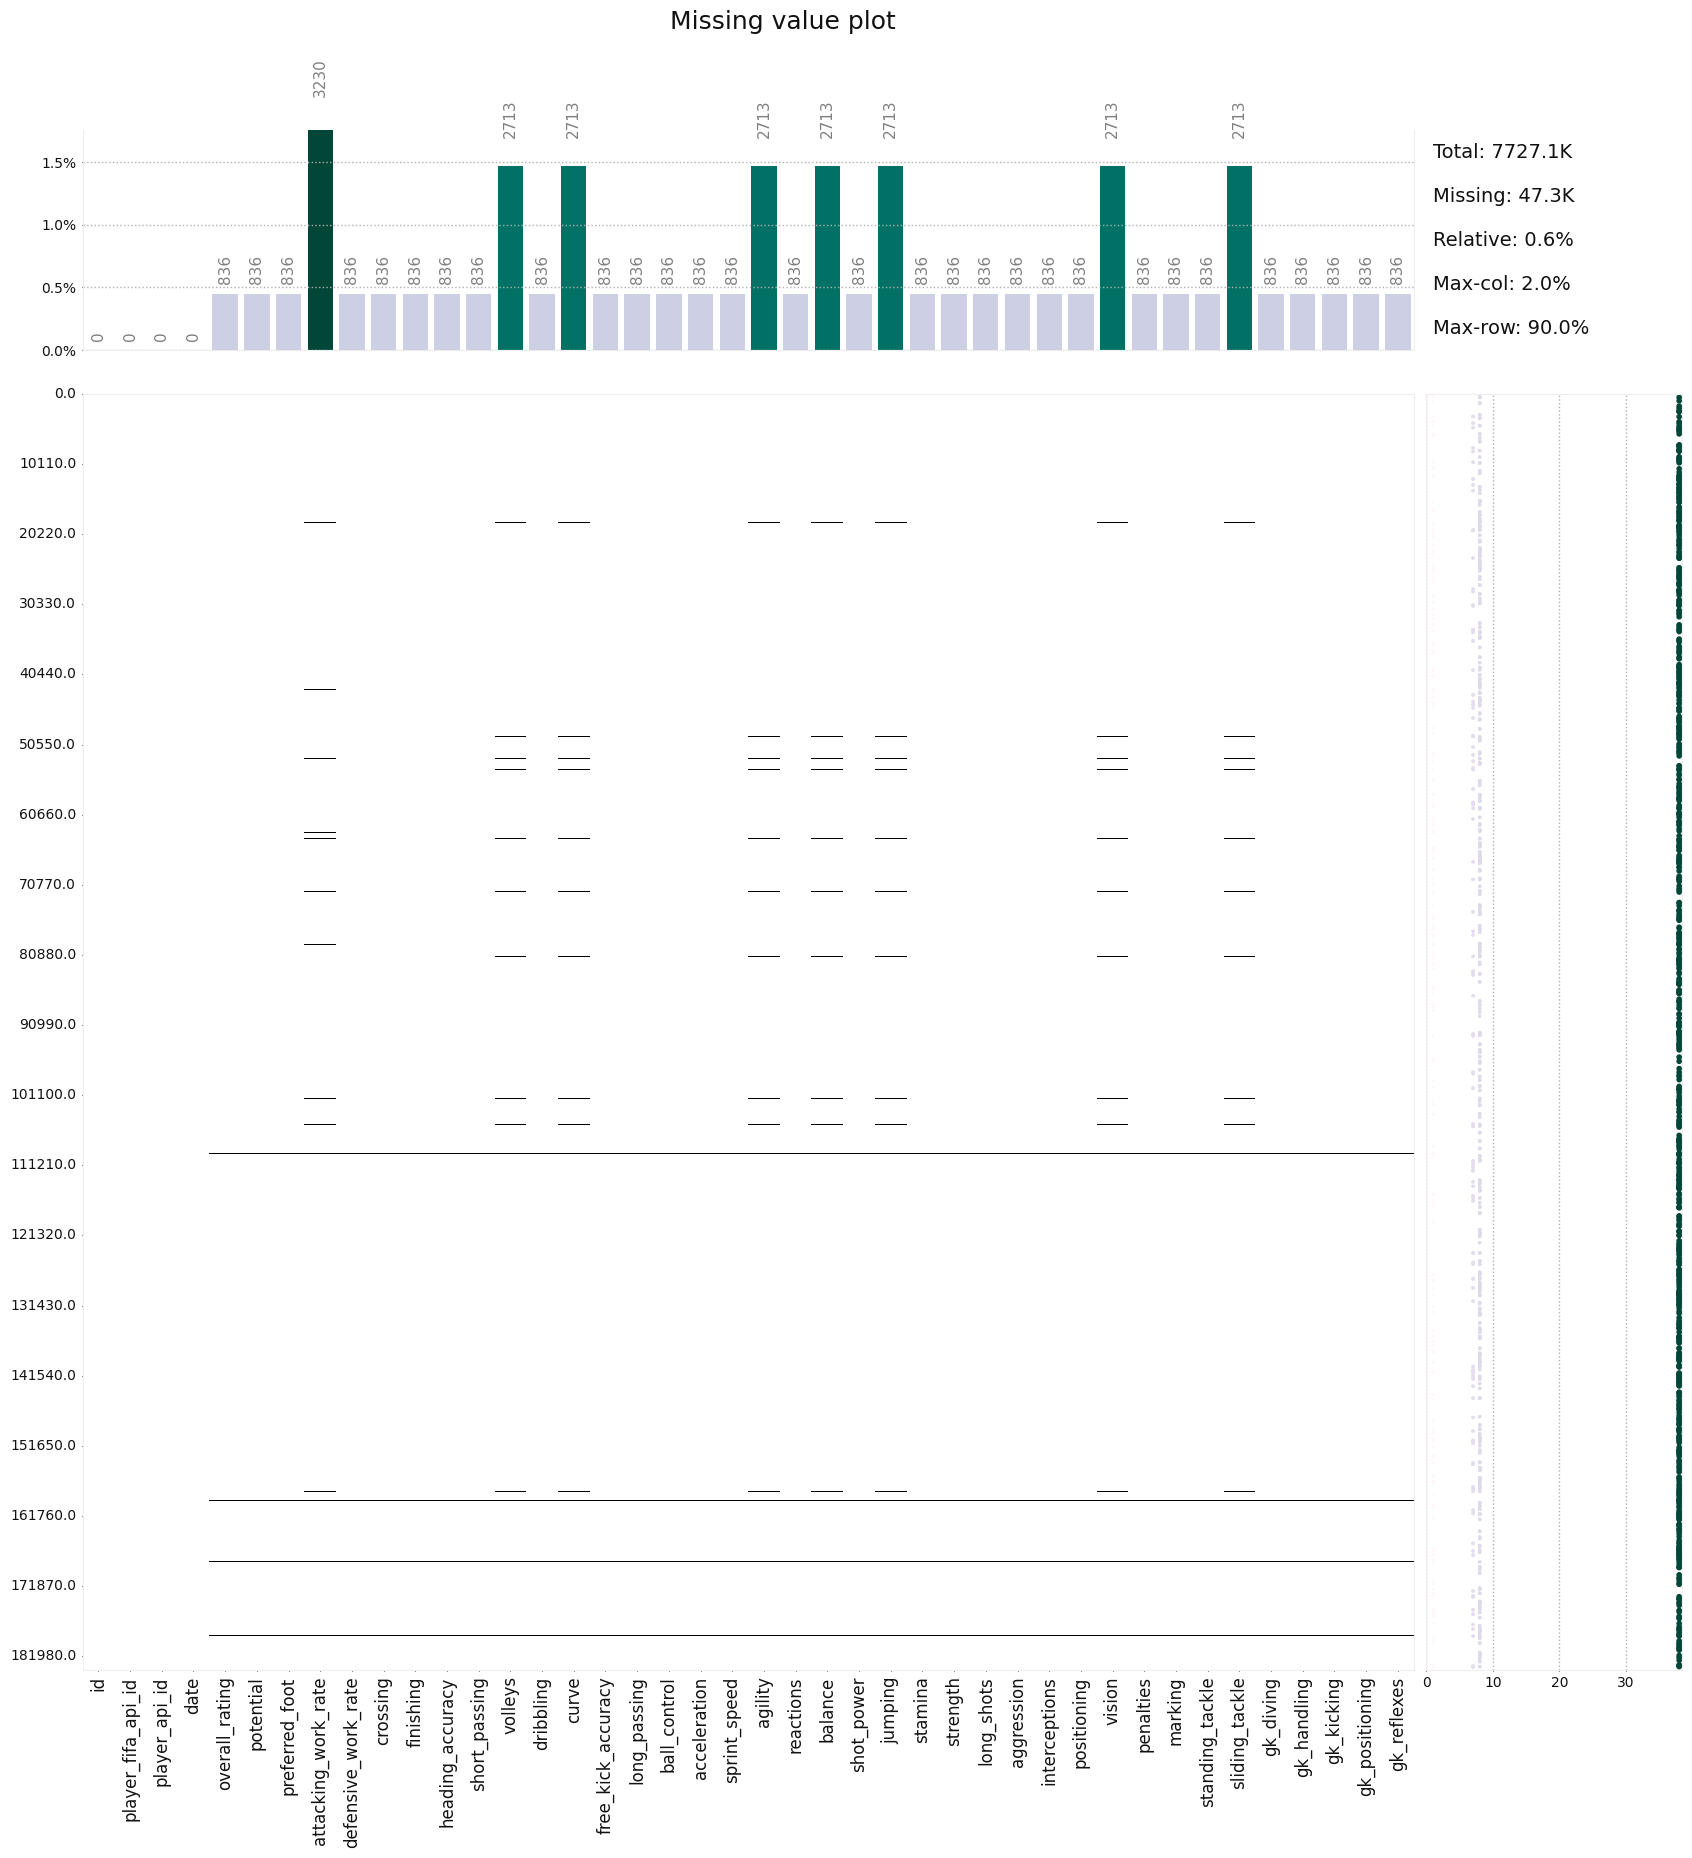

In [24]:
klib.missingval_plot(player_attributes)

In [25]:
player_attributes['preferred_foot'].unique()

array(['right', 'left', None], dtype=object)

In [26]:
player_attributes['preferred_foot'].value_counts()

right    138409
left      44733
Name: preferred_foot, dtype: int64

In [27]:
player_attributes['attacking_work_rate'].unique()

array(['medium', 'high', None, 'low', 'None', 'le', 'norm', 'stoc', 'y'],
      dtype=object)

In [28]:
player_attributes['defensive_work_rate'].unique()

array(['medium', 'high', 'low', '_0', None, '5', 'ean', 'o', '1', 'ormal',
       '7', '2', '8', '4', 'tocky', '0', '3', '6', '9', 'es'],
      dtype=object)

There is Question about these Columns

Note : there are 3 columns ['preferred_foot' , 'attacking_work_rate' , 'defensive_work_rate'] with Object type , and with rows which has unknown values

In [29]:
unique_values_attacking_work_rate = player_attributes['attacking_work_rate'].value_counts(dropna=False)
unique_values_attacking_work_rate

medium    125070
high       42823
low         8569
None        3639
None        3230
norm         348
y            106
le           104
stoc          89
Name: attacking_work_rate, dtype: int64

This column indeed has some irregularities, including a variety of unique values and a significant number of null values.

In [30]:
total_rows = len(player_attributes)

group_1_df = player_attributes.loc[player_attributes['attacking_work_rate'].isin(['medium', 'high', 'low'])]
sum_group_1 = len(group_1_df)
percent_group_1 = (sum_group_1 / total_rows) * 100

group_2_df = player_attributes.loc[player_attributes['attacking_work_rate'].isin(['None']) | player_attributes['attacking_work_rate'].isnull()]
sum_group_2 = len(group_2_df)
percent_group_2 = (sum_group_2 / total_rows) * 100

group_3_df = player_attributes.loc[player_attributes['attacking_work_rate'].isin(['norm', 'y', 'le', 'stoc'])]
sum_group_3 = len(group_3_df)
percent_group_3 = (sum_group_2 / total_rows) * 100

print(f"Sum of Group 1: {sum_group_1} AND Percent of Group 1 : {percent_group_1}" )
print(f"Sum of Group 2: {sum_group_2} AND Percent of Group 2 : {percent_group_2}" )
print(f"Sum of Group 3: {sum_group_3} AND Percent of Group 3 : {percent_group_3}" )

Sum of Group 1: 176462 AND Percent of Group 1 : 95.91472893498135
Sum of Group 2: 6869 AND Percent of Group 2 : 3.733598582439205
Sum of Group 3: 647 AND Percent of Group 3 : 3.733598582439205


In [31]:
unique_values_defensive_work_rate = player_attributes['defensive_work_rate'].value_counts(dropna=False)
unique_values_defensive_work_rate

medium    130846
high       27041
low        18432
_0          2394
o           1550
None         836
1            441
ormal        348
2            342
3            258
5            234
7            217
0            197
6            197
9            152
4            116
es           106
ean          104
tocky         89
8             78
Name: defensive_work_rate, dtype: int64

In [32]:
total_rows_1 = len(player_attributes)

group_1_df = player_attributes.loc[player_attributes['defensive_work_rate'].isin(
    ['medium', 'high', 'low'])]
sum_group_1 = len(group_1_df)
percent_group_1 = (sum_group_1 / total_rows) * 100

group_2_df = player_attributes.loc[player_attributes['defensive_work_rate'].isin(
    ['None']) | player_attributes['defensive_work_rate'].isnull()]
sum_group_2 = len(group_2_df)
percent_group_2 = (sum_group_2 / total_rows) * 100

group_3_df = player_attributes.loc[player_attributes['defensive_work_rate'].isin(
    ['8', 'tocky', 'ean', 'es', '4','9','6','0','7','5','3','2','ormal','1','o','_0'])]
sum_group_3 = len(group_3_df)
percent_group_3 = (sum_group_2 / total_rows) * 100

print(f"Sum of Group 1: {sum_group_1} AND Percent of Group 1 : {percent_group_1}" )
print(f"Sum of Group 2: {sum_group_2} AND Percent of Group 2 : {percent_group_2}" )
print(f"Sum of Group 3: {sum_group_3} AND Percent of Group 3 : {percent_group_3}" )

Sum of Group 1: 176319 AND Percent of Group 1 : 95.83700225026905
Sum of Group 2: 836 AND Percent of Group 2 : 0.45440215677961493
Sum of Group 3: 6823 AND Percent of Group 3 : 0.45440215677961493


In [33]:
# Identify potentially noisy data
noisy_awr = player_attributes['attacking_work_rate'].isin(['y', 'le', 'stoc', 'None', 'norm'])
noisy_dwr = player_attributes['defensive_work_rate'].isin(['_0', 'o', 'ormal', 'es', 'ean', 'tocky', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0'])

# Subset the data into noisy and not-noisy
noisy_data = player_attributes[noisy_awr | noisy_dwr]
not_noisy_data = player_attributes[~(noisy_awr | noisy_dwr)]

# Compare the null value counts in the noisy and not-noisy data
null_comparison = pd.DataFrame({
    "null_count_noisy": noisy_data.isnull().sum(),
    "null_count_not_noisy": not_noisy_data.isnull().sum(),
})

null_comparison["difference"] = null_comparison["null_count_noisy"] - null_comparison["null_count_not_noisy"]
null_comparison.sort_values(by="difference", ascending=False).head()


null_count_noisy  null_count_not_noisy  difference
attacking_work_rate              2394                   836        1558
agility                          1877                   836        1041
volleys                          1877                   836        1041
sliding_tackle                   1877                   836        1041
vision                           1877                   836        1041

null_count_noisy: Number of null values in rows identified as containing noisy data.

null_count_not_noisy: Number of null values in rows not identified as noisy.

difference: The difference in null counts between noisy and non-noisy data.

In [34]:
# Step 1: Remove Noisy Data
# Define noisy values
noisy_awr_values = ['y', 'le', 'stoc', 'None', 'norm']
noisy_dwr_values = ['_0', 'o', 'ormal', 'es', 'ean', 'tocky', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0']

# Filter data
clean_data = player_attributes[
    ~player_attributes['attacking_work_rate'].isin(noisy_awr_values) &
    ~player_attributes['defensive_work_rate'].isin(noisy_dwr_values)
]

# Step 2: Remove Null Data
# Columns where null values will be removed
columns_to_check = ['preferred_foot', 'attacking_work_rate', 'defensive_work_rate']

# Drop rows with null values in specified columns
player_attributes_cleaned = clean_data.dropna(subset=columns_to_check)

In [35]:
player_attributes_cleaned.isnull().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


In [36]:
player_attributes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176161 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   176161 non-null  int64         
 1   player_fifa_api_id   176161 non-null  int64         
 2   player_api_id        176161 non-null  int64         
 3   date                 176161 non-null  datetime64[ns]
 4   overall_rating       176161 non-null  float64       
 5   potential            176161 non-null  float64       
 6   preferred_foot       176161 non-null  object        
 7   attacking_work_rate  176161 non-null  object        
 8   defensive_work_rate  176161 non-null  object        
 9   crossing             176161 non-null  float64       
 10  finishing            176161 non-null  float64       
 11  heading_accuracy     176161 non-null  float64       
 12  short_passing        176161 non-null  float64       
 13  volleys       

In [37]:
print(f'The shape before cleaning {player_attributes.shape}')
print(f'The shape after cleaning {player_attributes_cleaned.shape}')
different_shap = player_attributes.shape[0] - player_attributes_cleaned.shape[0]
print(f'difference {different_shap}')
print(f'percentage  {(different_shap * 100) / player_attributes.shape[0] }')

The shape before cleaning (183978, 42)
The shape after cleaning (176161, 42)
difference 7817
percentage  4.248877583189294


<Axes: >

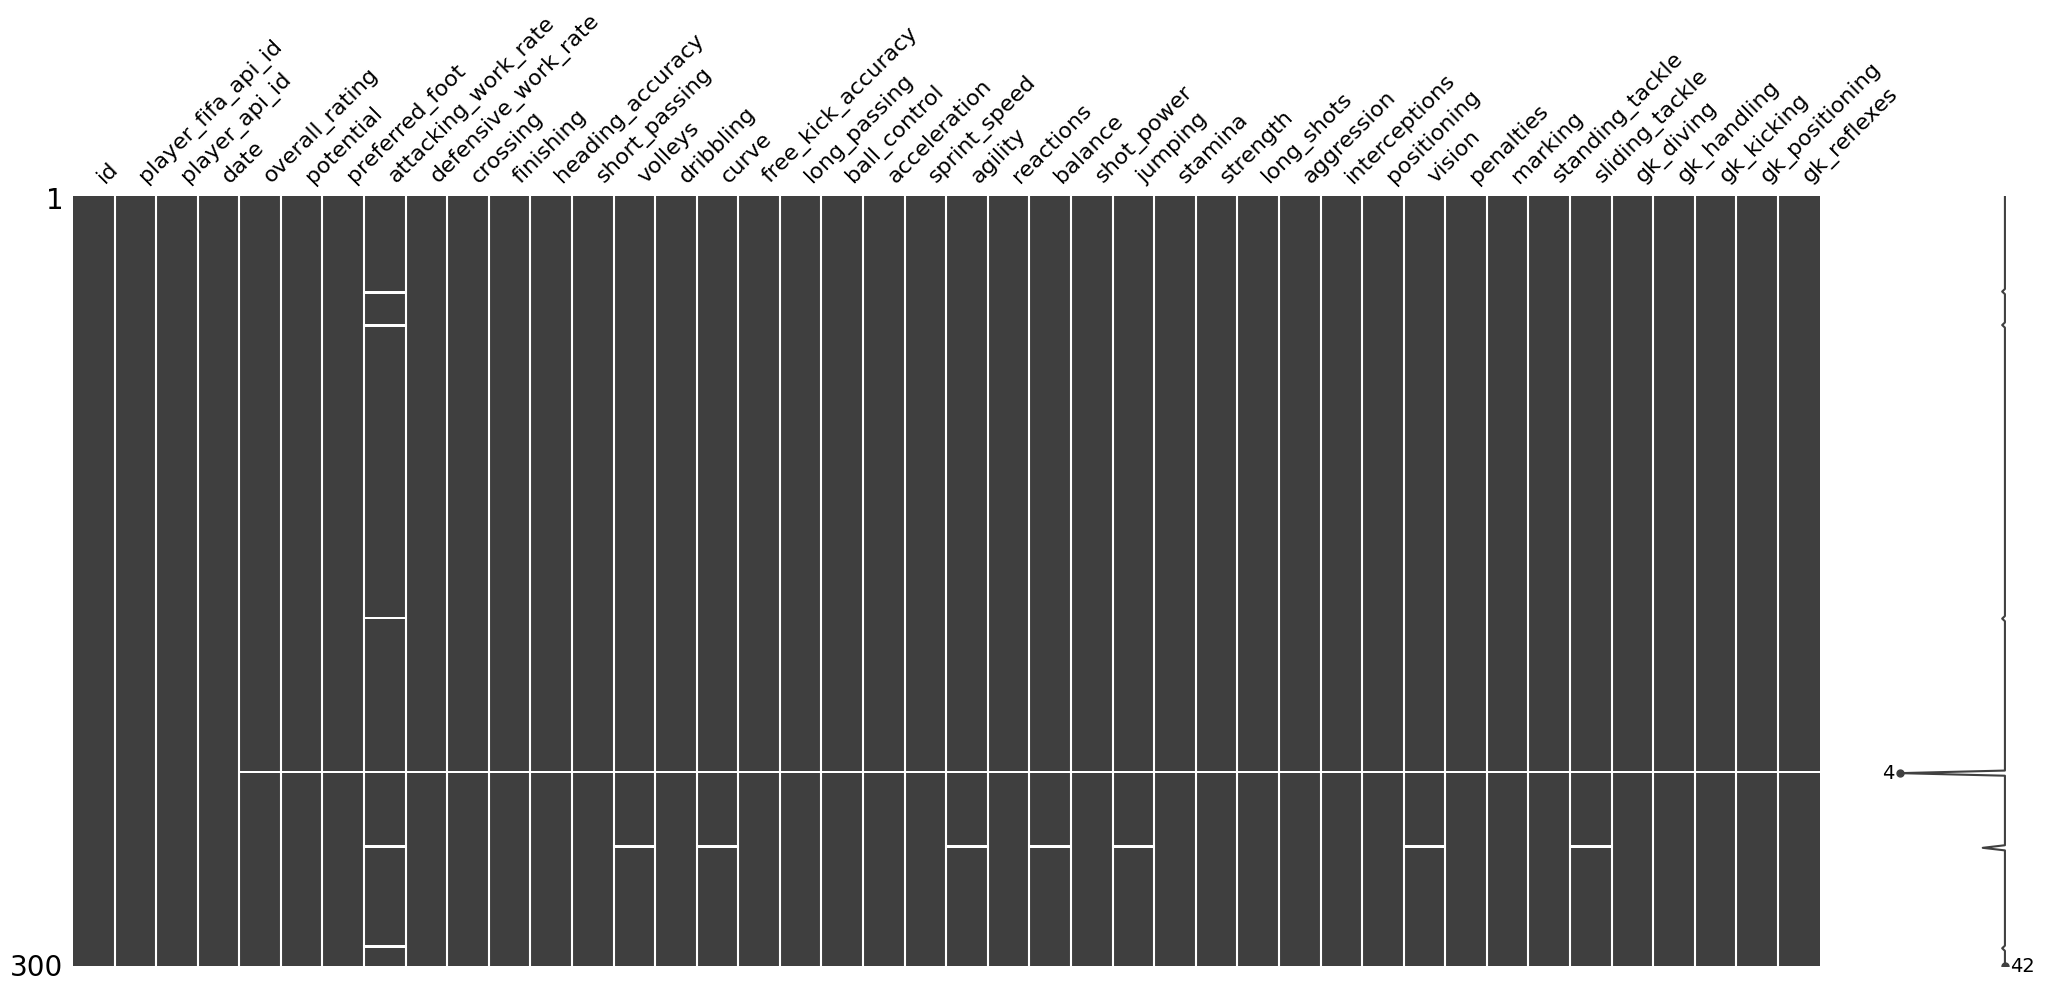

In [38]:
msno.matrix(player_attributes.sample(300))

<Axes: >

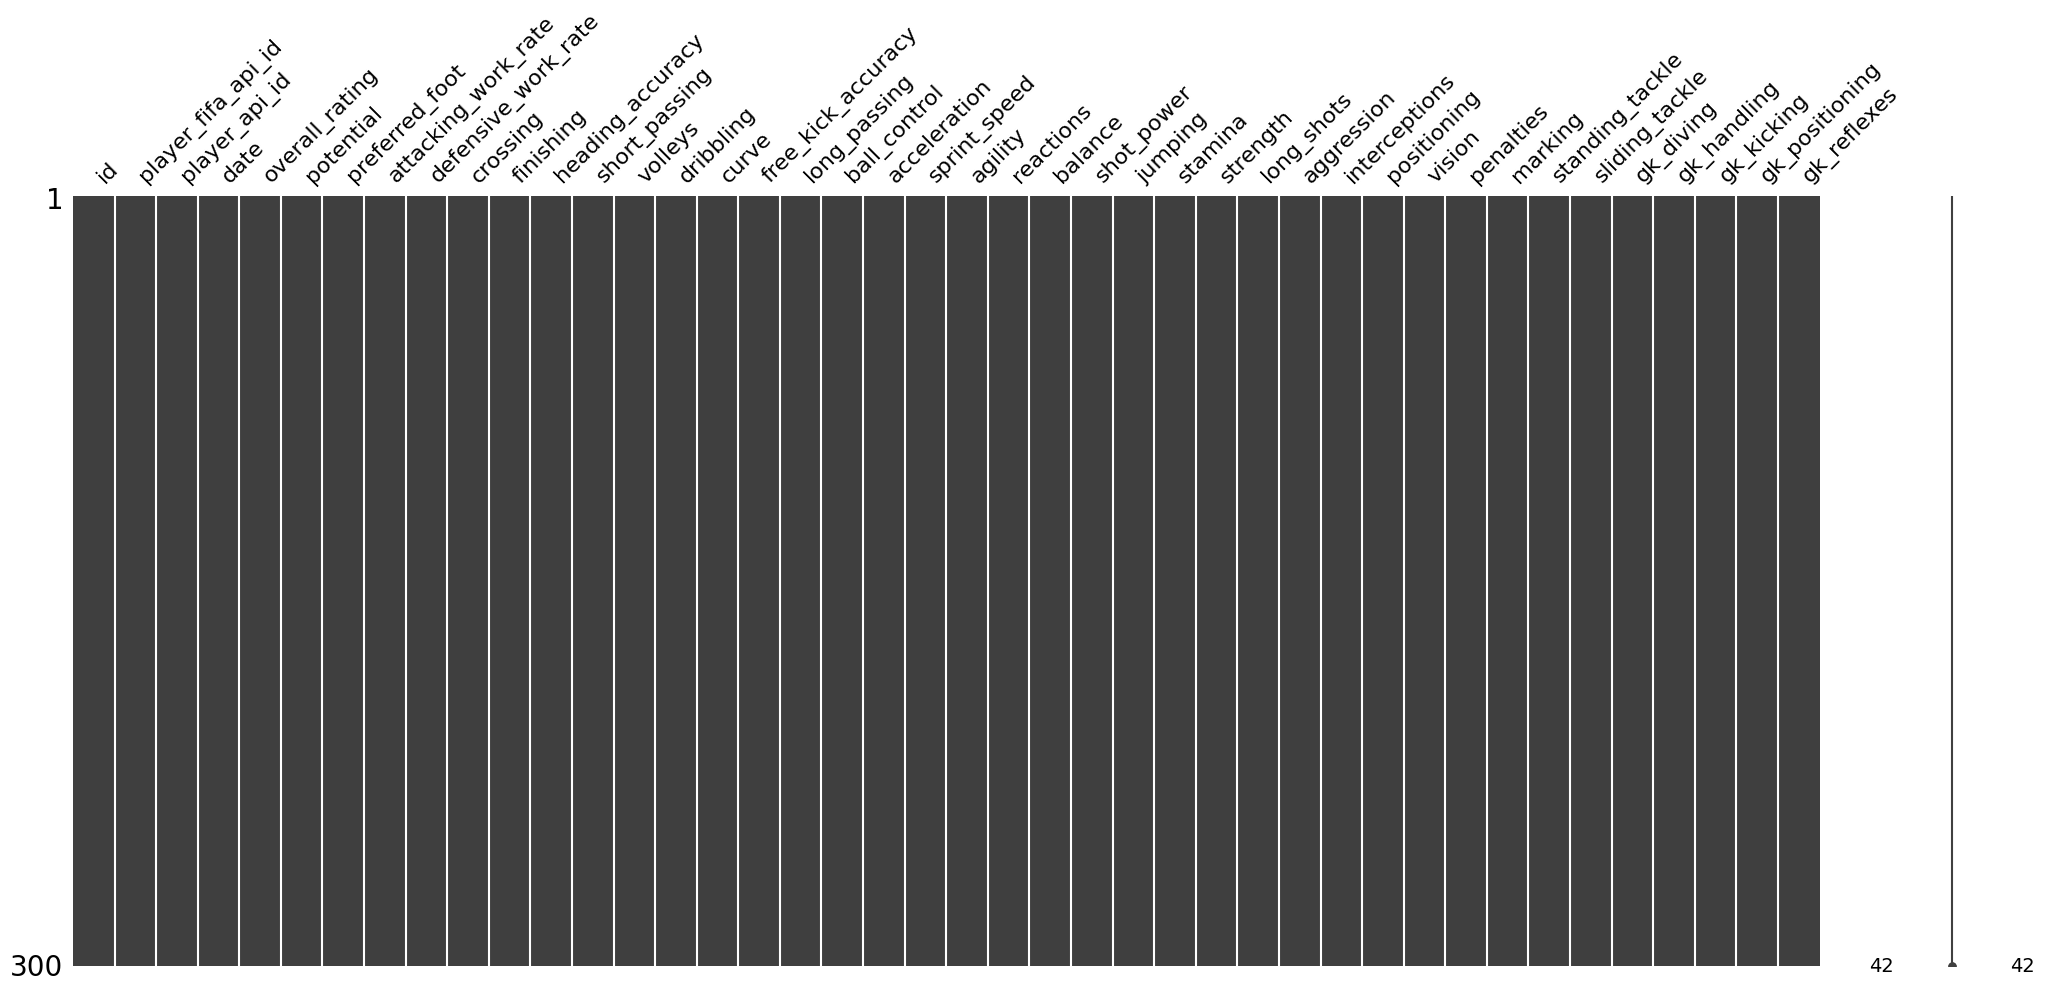

In [39]:
msno.matrix(player_attributes_cleaned.sample(300))

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<Axes: xlabel='overall_rating', ylabel='Density'>

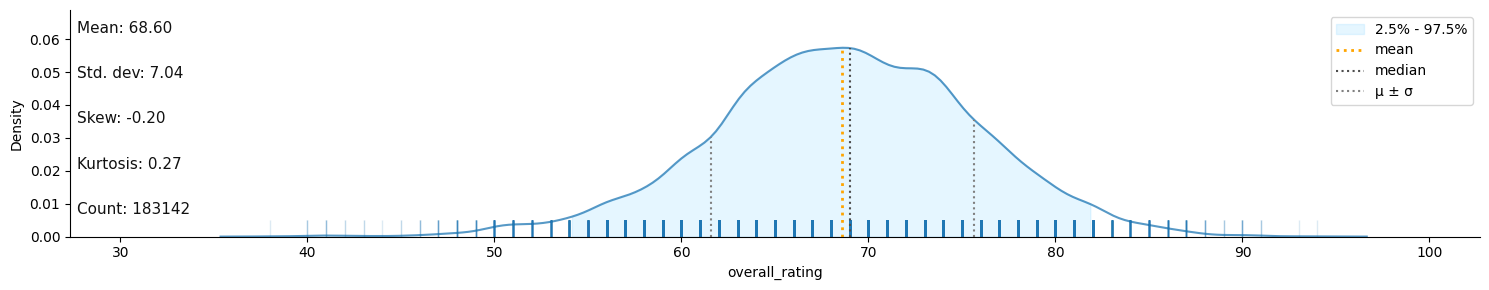

In [40]:
klib.dist_plot(player_attributes['overall_rating'])

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<Axes: xlabel='overall_rating', ylabel='Density'>

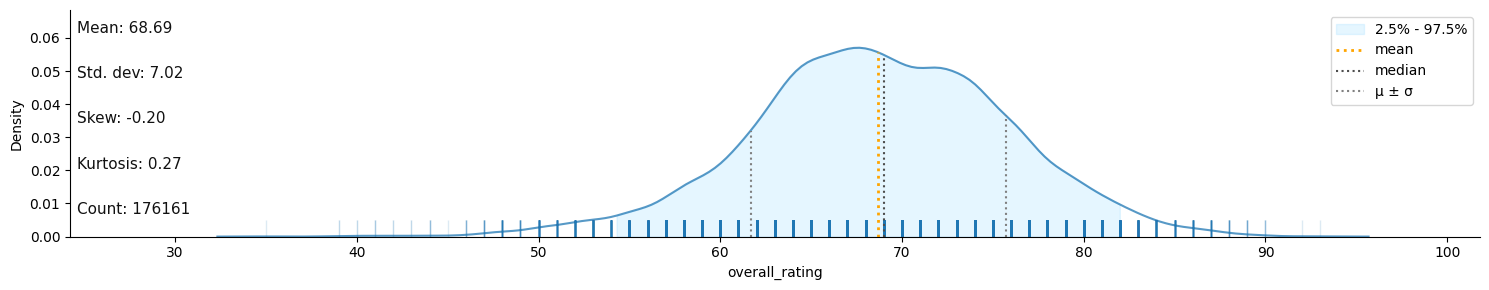

In [41]:
klib.dist_plot(player_attributes_cleaned['overall_rating'])

In [42]:
player_attributes_cleaned['overall_rating'].describe()

count   176161.00
mean        68.69
std          7.02
min         33.00
25%         64.00
50%         69.00
75%         73.00
max         94.00
Name: overall_rating, dtype: float64

<Axes: >

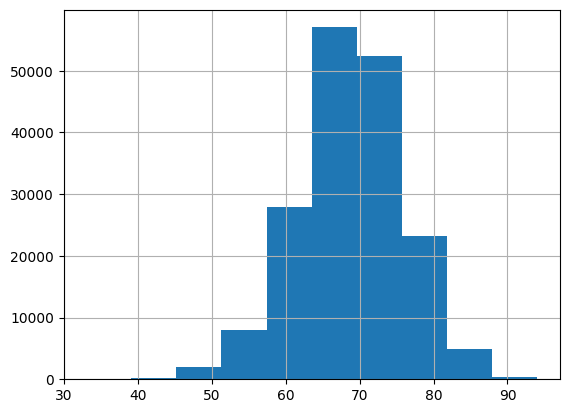

In [43]:
player_attributes_cleaned['overall_rating'].hist()

In [44]:
player_attributes.duplicated().sum()

0

In [45]:
player_attributes_cleaned.duplicated().sum()

0

## player

In [46]:
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [47]:
player.head()

id  player_api_id         player_name  player_fifa_api_id  \
0   1         505942  Aaron Appindangoye              218353   
1   2         155782     Aaron Cresswell              189615   
2   3         162549         Aaron Doran              186170   
3   4          30572       Aaron Galindo              140161   
4   5          23780        Aaron Hughes               17725   

              birthday  height  weight  
0  1992-02-29 00:00:00  182.88     187  
1  1989-12-15 00:00:00  170.18     146  
2  1991-05-13 00:00:00  170.18     163  
3  1982-05-08 00:00:00  182.88     198  
4  1979-11-08 00:00:00  182.88     154

In [48]:
player.isnull().sum()

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

In [49]:
player.duplicated().sum()

0

In [50]:
player['birthday'].str.slice(start=-8).unique()

array(['00:00:00'], dtype=object)

In [51]:
player['birthday'] = pd.to_datetime(player['birthday'], format='%Y-%m-%d')

In [52]:
player.head()

id  player_api_id         player_name  player_fifa_api_id   birthday  \
0   1         505942  Aaron Appindangoye              218353 1992-02-29   
1   2         155782     Aaron Cresswell              189615 1989-12-15   
2   3         162549         Aaron Doran              186170 1991-05-13   
3   4          30572       Aaron Galindo              140161 1982-05-08   
4   5          23780        Aaron Hughes               17725 1979-11-08   

   height  weight  
0  182.88     187  
1  170.18     146  
2  170.18     163  
3  182.88     198  
4  182.88     154

In [53]:
player['birthday'].dt.year.unique()

array([1992, 1989, 1991, 1982, 1979, 1986, 1996, 1987, 1993, 1980, 1990,
       1976, 1984, 1978, 1981, 1994, 1983, 1985, 1988, 1995, 1977, 1997,
       1974, 1999, 1967, 1973, 1975, 1970, 1972, 1971, 1998, 1969, 1968])

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<Axes: xlabel='birthday', ylabel='Density'>

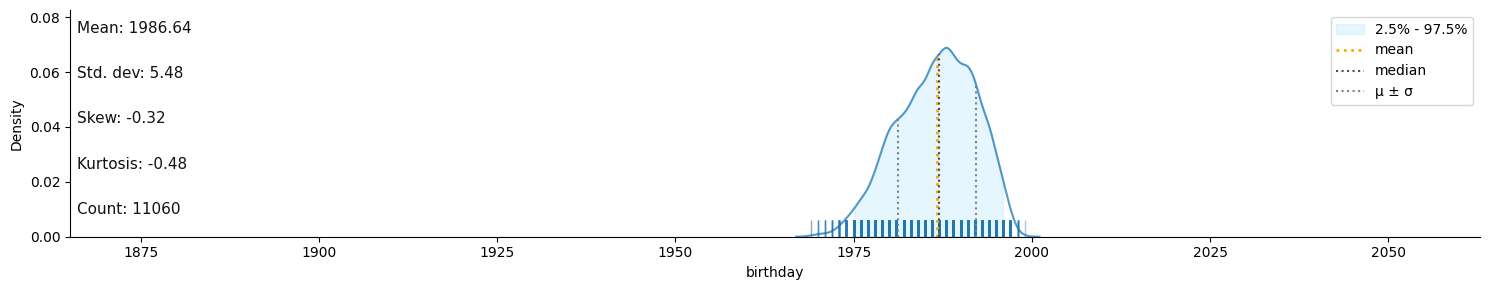

In [54]:
klib.dist_plot(player['birthday'].dt.year)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<Axes: xlabel='height', ylabel='Density'>

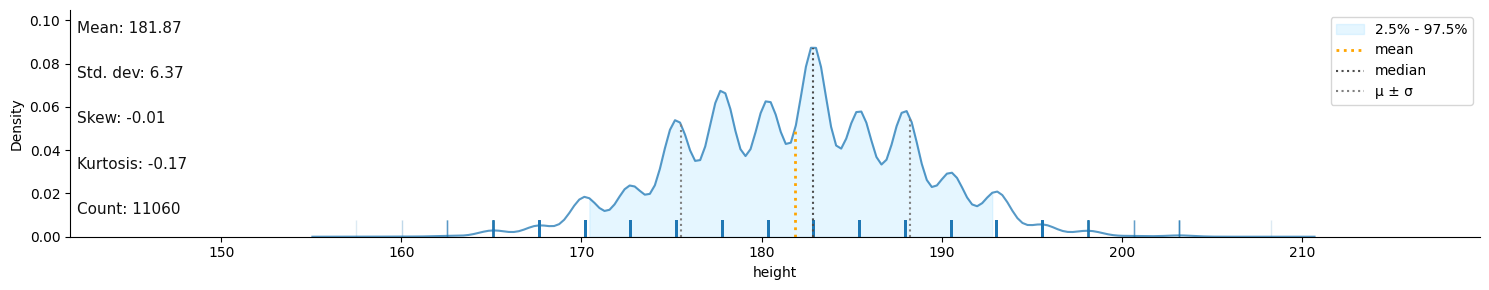

In [55]:
klib.dist_plot(player['height'])

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<Axes: xlabel='weight', ylabel='Density'>

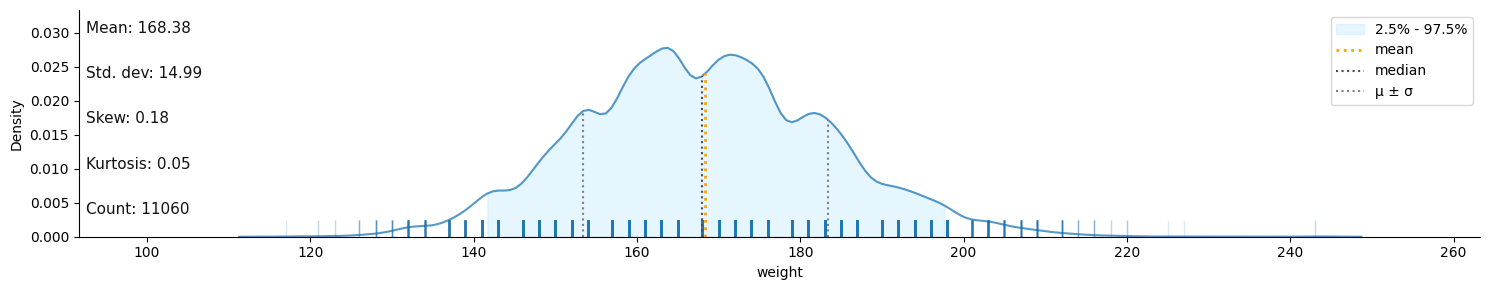

In [56]:
klib.dist_plot(player['weight'])

<Axes: >

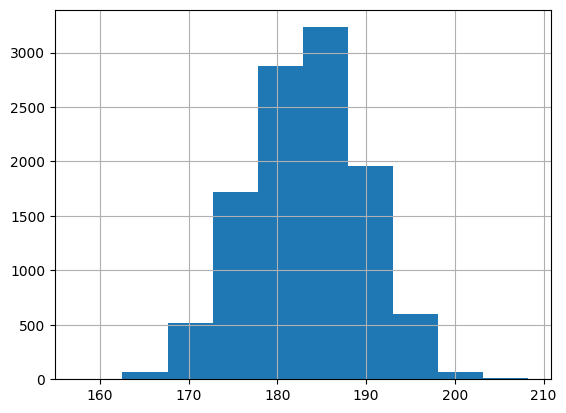

In [57]:
player['height'].hist()

<Axes: >

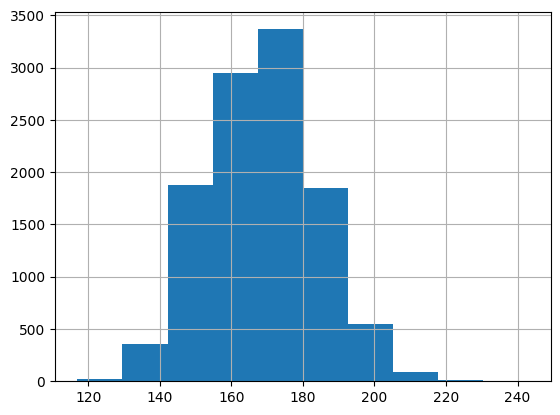

In [58]:
player['weight'].hist()

## team

In [59]:
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [60]:
team.head()

id  team_api_id  team_fifa_api_id     team_long_name team_short_name
0   1         9987            673.00           KRC Genk             GEN
1   2         9993            675.00       Beerschot AC             BAC
2   3        10000          15005.00   SV Zulte-Waregem             ZUL
3   4         9994           2007.00   Sporting Lokeren             LOK
4   5         9984           1750.00  KSV Cercle Brugge             CEB

In [61]:
team.isnull().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

In [62]:
null_rows_team = team[team.isnull().any(axis=1)]
null_rows_team

id  team_api_id  team_fifa_api_id                team_long_name  \
8        9         7947               NaN                 FCV Dender EH   
14      15         4049               NaN                        Tubize   
170  26561         6601               NaN                   FC Volendam   
204  34816       177361               NaN  Termalica Bruk-Bet Nieciecza   
208  35286         7992               NaN                      Trofense   
213  35291        10213               NaN                       Amadora   
223  36248         9765               NaN                  Portimonense   
225  36723         4064               NaN                      Feirense   
232  38789         6367               NaN              Uniao da Madeira   
233  38791       188163               NaN                       Tondela   
298  51606         7896               NaN                        Lugano   

    team_short_name  
8               DEN  
14              TUB  
170             VOL  
204             TBN  
208             TRO  
213             AMA  
223             POR  
225             FEI  
232             MAD  
233             TON  
298             LUG

Here I want to know why 11 rows has NaN value ?

I have 11 null values only in the 'team_fifa_api_id' column. I don't think it's necessary to join two tables for analysis between the team and match tables. Instead, I can use the primary key to join them.

In [63]:
team.duplicated().sum()

0

In [64]:
duplicated_short_names_df = team[team['team_short_name'].duplicated
 (keep=False)].sort_values(by='team_short_name')
duplicated_short_names_df

id  team_api_id  team_fifa_api_id             team_long_name  \
161  26552         8593            245.00                       Ajax   
84   11817         8576            614.00                 AC Ajaccio   
269  43053         9906            240.00            Atlético Madrid   
213  35291        10213               NaN                    Amadora   
258  43042         8634            241.00               FC Barcelona   
144  21280         9976           1848.00                       Bari   
88   12594         7794             58.00                  SC Bastia   
287  49118         9931            896.00                   FC Basel   
192  31454         8569         110744.00              GKS Bełchatów   
206  35284         9807           1889.00           CF Os Belenenses   
285  49116         6493           1714.00              AC Bellinzona   
135  20524         9857            189.00                    Bologna   
39    3471         8559              4.00           Bolton Wanderers   
57    8779         8678           1943.00                Bournemouth   
81   10312         4170         111376.00   US Boulogne Cote D'Opale   
212  35290        10264           1896.00                   SC Braga   
120  18691         9776         110500.00     Eintracht Braunschweig   
83   11076         8521            378.00          Stade Brestois 29   
148  22044         9858            190.00                    Brescia   
279  46087         9910            450.00           RC Celta de Vigo   
242  39395         9925             78.00                     Celtic   
282  47612         7869           1867.00                 Córdoba CF   
255  43039         9783            242.00  RC Deportivo de La Coruña   
180  30222         6631         100626.00               FC Dordrecht   
97   15620         9789             22.00          Borussia Dortmund   
129  20518        10233         110556.00                      Genoa   
6        7         9991            674.00                   KAA Gent   
0        1         9987            673.00                   KRC Genk   
284  49115         9956            322.00    Grasshopper Club Zürich   
277  45330         7878         110832.00                 Granada CF   
163  26554         8526            635.00              De Graafschap   
90   13343         9747             62.00       En Avant de Guingamp   
209  35287         7844           1887.00          Vitória Guimarães   
95   15618         9790             28.00               Hamburger SV   
244  39397         8429            184.00     Hamilton Academical FC   
166  26557         9791         100634.00            Heracles Almelo   
274  44557        10278         100879.00    Hércules Club de Fútbol   
141  20530         9888            347.00                      Lecce   
203  34337         8019         110565.00              Górnik Łęczna   
217  35295         6421          10018.00                 Leixões SC   
56    8021         8197             95.00             Leicester City   
96   15619         8178             32.00        Bayer 04 Leverkusen   
275  44565         8581           1853.00                 Levante UD   
145  21285         8537           1844.00                    Livorno   
30    3462         8650              9.00                  Liverpool   
270  43054         9864            573.00                  Málaga CF   
252  43036         8661            453.00               RCD Mallorca   
74    9552         8592            219.00     Olympique de Marseille   
220  35298        10212           1893.00                CS Marítimo   
69    9547         9829             69.00                  AS Monaco   
7        8         9998           1747.00                  RAEC Mons   
80   10309        10249             70.00     Montpellier Hérault SC   
218  35296        10214           1891.00                CD Nacional   
173  26564         9761           1904.00                  NAC Breda   
71    9549         8481           1823.00       

In [65]:
duplicated_long_names_df = team[team['team_long_name'].duplicated
 (keep=False)].sort_values(by='team_long_name')
duplicated_long_names_df

id  team_api_id  team_fifa_api_id        team_long_name  \
182  31444         8031         111429.00         Polonia Bytom   
183  31445         8020         111429.00         Polonia Bytom   
15      16         9996         111560.00  Royal Excel Mouscron   
24    2510       274581         111560.00  Royal Excel Mouscron   
189  31451         8244            301.00           Widzew Łódź   
199  32409         8024            301.00           Widzew Łódź   

    team_short_name  
182             POB  
183             GOR  
15              MOU  
24              MOP  
189             LOD  
199             WID

I dont have any null values and any duplicated values in team long\short name , But rows = 299 and unique == 296 why ?

I discovered that there are 34 differences between the two columns.

In [66]:
team_name = team['team_long_name'].groupby(team['team_short_name']).size().sort_values(ascending=False)
team_name_grader_than_one = team_name[team_name > 1]
team_name_grader_than_one.count()

34

In [67]:
team_1 = team.groupby(['team_long_name'])['team_short_name'].count()
team_1_greater_than_one = team_1[team_1 > 1]
team_1_greater_than_one

team_long_name
Polonia Bytom           2
Royal Excel Mouscron    2
Widzew Łódź             2
Name: team_short_name, dtype: int64

In [68]:
team_2 = team.groupby(['team_short_name'])['team_long_name'].count()
team_2_greater_than_one = team_2[team_2 > 1]
team_2_greater_than_one.sort_values(ascending=False)

team_short_name
VAL    3
BEL    3
MON    3
GRA    3
POR    3
GEN    3
AJA    2
NAC    2
MAL    2
MAR    2
PAR    2
NAN    2
LEV    2
REA    2
ROS    2
SOC    2
TRO    2
LIV    2
LEC    2
LEI    2
AMA    2
HER    2
HAM    2
GUI    2
DOR    2
COR    2
CEL    2
BRE    2
BRA    2
BOU    2
BOL    2
BAS    2
BAR    2
WOL    2
Name: team_long_name, dtype: int64

Here I have 3 team_long_name with same short name AND 34 team_short_name with same long name why ?

In [69]:
duplicated_teams = team[team['team_short_name'].duplicated(keep=False)].sort_values(by='team_short_name')

In [70]:
duplicated_teams[['team_short_name', 'team_api_id', 'team_fifa_api_id']]

team_short_name  team_api_id  team_fifa_api_id
161             AJA         8593            245.00
84              AJA         8576            614.00
269             AMA         9906            240.00
213             AMA        10213               NaN
258             BAR         8634            241.00
144             BAR         9976           1848.00
88              BAS         7794             58.00
287             BAS         9931            896.00
192             BEL         8569         110744.00
206             BEL         9807           1889.00
285             BEL         6493           1714.00
135             BOL         9857            189.00
39              BOL         8559              4.00
57              BOU         8678           1943.00
81              BOU         4170         111376.00
212             BRA        10264           1896.00
120             BRA         9776         110500.00
83              BRE         8521            378.00
148             BRE         9858            190.00
279             CEL         9910            450.00
242             CEL         9925             78.00
282             COR         7869           1867.00
255             COR         9783            242.00
180             DOR         6631         100626.00
97              DOR         9789             22.00
129             GEN        10233         110556.00
6               GEN         9991            674.00
0               GEN         9987            673.00
284             GRA         9956            322.00
277             GRA         7878         110832.00
163             GRA         8526            635.00
90              GUI         9747             62.00
209             GUI         7844           1887.00
95              HAM         9790             28.00
244             HAM         8429            184.00
166             HER         9791         100634.00
274             HER        10278         100879.00
141             LEC         9888            347.00
203             LEC         8019         110565.00
217             LEI         6421          10018.00
56              LEI         8197             95.00
96              LEV         8178             32.00
275             LEV         8581           1853.00
145             LIV         8537           1844.00
30              LIV         8650              9.00
270             MAL         9864            573.00
252             MAL         8661            453.00
74              MAR         8592            219.00
220             MAR        10212           1893.00
69              MON         9829             69.00
7               MON         9998           1747.00
80              MON        10249             70.00
218             NAC        10214           1891.00
173             NAC         9761           1904.00
71              NAN         8481           1823.00
60              NAN         9830             71.00
250             PAR         8426           1754.00
146             PAR        10167             50.00
223             POR         9765               NaN
205             POR         9773            236.00
44              POR         8462           1790.00
53              REA         9798           1793.00
256             REA         8633            243.00
12              ROS         9999            546.00
249             ROS         8649            631.00
75              SOC         9874            226.00
276             SOC         8560            457.00
208             TRO         7992               NaN
89              TRO        10242            294.00
77              VAL         9873         110456.00
266             VAL        10281            462.00
251             VAL        10267            461.00
46              WOL         8602            110.00
100             WOL         8721            175.00

In [71]:
team_short_names_to_check = []
for name_type in ['team_short_name', 'team_long_name']:

    unique_names = team[name_type].unique()

    for name in unique_names:

        # Filter the dataframe for entries with the same name
        same_name_df = team[team[name_type] == name]

        # Check if 'team_api_id' and 'team_fifa_api_id' have more than 1 unique value
        if len(same_name_df['team_api_id'].unique()) > 1 or len(same_name_df['team_fifa_api_id'].unique()) > 1:
            print(f"Non-unique IDs found for {name_type}: {name}")
            team_short_names_to_check.append(name)

Non-unique IDs found for team_short_name: GEN
Non-unique IDs found for team_short_name: MON
Non-unique IDs found for team_short_name: ROS
Non-unique IDs found for team_short_name: LIV
Non-unique IDs found for team_short_name: BOL
Non-unique IDs found for team_short_name: POR
Non-unique IDs found for team_short_name: WOL
Non-unique IDs found for team_short_name: REA
Non-unique IDs found for team_short_name: LEI
Non-unique IDs found for team_short_name: BOU
Non-unique IDs found for team_short_name: NAN
Non-unique IDs found for team_short_name: MAR
Non-unique IDs found for team_short_name: SOC
Non-unique IDs found for team_short_name: VAL
Non-unique IDs found for team_short_name: BRE
Non-unique IDs found for team_short_name: AJA
Non-unique IDs found for team_short_name: BAS
Non-unique IDs found for team_short_name: TRO
Non-unique IDs found for team_short_name: GUI
Non-unique IDs found for team_short_name: HAM
Non-unique IDs found for team_short_name: LEV
Non-unique IDs found for team_shor

In [72]:
team[team['team_short_name'] == 'GEN'][['team_api_id', 'team_fifa_api_id', 'team_long_name']]

team_api_id  team_fifa_api_id team_long_name
0           9987            673.00       KRC Genk
6           9991            674.00       KAA Gent
129        10233         110556.00          Genoa

In [73]:
for short_name in team_short_names_to_check:

    # Filter the DataFrame and select relevant columns
    team_data = team[team['team_short_name'] == short_name][['team_api_id', 'team_fifa_api_id', 'team_long_name']]

    # Display the data
    print(f"Data for {short_name}:")
    print(team_data)
    print("\n" + "-"*50 + "\n")

Data for GEN:
     team_api_id  team_fifa_api_id team_long_name
0           9987            673.00       KRC Genk
6           9991            674.00       KAA Gent
129        10233         110556.00          Genoa

--------------------------------------------------

Data for MON:
    team_api_id  team_fifa_api_id          team_long_name
7          9998           1747.00               RAEC Mons
69         9829             69.00               AS Monaco
80        10249             70.00  Montpellier Hérault SC

--------------------------------------------------

Data for ROS:
     team_api_id  team_fifa_api_id  team_long_name
12          9999            546.00   KSV Roeselare
249         8649            631.00  Ross County FC

--------------------------------------------------

Data for LIV:
     team_api_id  team_fifa_api_id team_long_name
30          8650              9.00      Liverpool
145         8537           1844.00        Livorno

-------------------------------------------------

I'm aware of all the team short names in the dataset, and even though some of them have the same name, I decided to keep them because their team API IDs and team FIFA API IDs are different. Thus, they have distinct names.

In [74]:
# Creating a new identifier combining short name and team_api_id
team['team_identifier'] = team['team_short_name'] + '_' + team['team_api_id'].astype(str)

# Check the new identifier
team.head()

id  team_api_id  team_fifa_api_id     team_long_name team_short_name  \
0   1         9987            673.00           KRC Genk             GEN   
1   2         9993            675.00       Beerschot AC             BAC   
2   3        10000          15005.00   SV Zulte-Waregem             ZUL   
3   4         9994           2007.00   Sporting Lokeren             LOK   
4   5         9984           1750.00  KSV Cercle Brugge             CEB   

  team_identifier  
0        GEN_9987  
1        BAC_9993  
2       ZUL_10000  
3        LOK_9994  
4        CEB_9984

In [75]:
team['team_identifier'].duplicated().sum()

0

This way, you preserve the readability of short names while ensuring uniqueness and clarity in analyses and visualizations

In [76]:
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
 5   team_identifier   299 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 14.1+ KB


## maatch

In [77]:
maatch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [78]:
maatch.head()

id  country_id  league_id     season  stage                 date  \
0   1           1          1  2008/2009      1  2008-08-17 00:00:00   
1   2           1          1  2008/2009      1  2008-08-16 00:00:00   
2   3           1          1  2008/2009      1  2008-08-16 00:00:00   
3   4           1          1  2008/2009      1  2008-08-17 00:00:00   
4   5           1          1  2008/2009      1  2008-08-16 00:00:00   

   match_api_id  home_team_api_id  away_team_api_id  home_team_goal  \
0        492473              9987              9993               1   
1        492474             10000              9994               0   
2        492475              9984              8635               0   
3        492476              9991              9998               5   
4        492477              7947              9985               1   

   away_team_goal  home_player_X1  home_player_X2  home_player_X3  \
0               1             NaN             NaN             NaN   
1               0             NaN             NaN             NaN   
2               3             NaN             NaN             NaN   
3               0             NaN             NaN             NaN   
4               3             NaN             NaN             NaN   

   home_player_X4  home_player_X5  home_player_X6  home_player_X7  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2             NaN             NaN             NaN             NaN   
3             NaN             NaN             NaN             NaN   
4             NaN             NaN             NaN             NaN   

   home_player_X8  home_player_X9  home_player_X10  home_player_X11  \
0             NaN             NaN              NaN              NaN   
1             NaN             NaN              NaN              NaN   
2             NaN             NaN              NaN              NaN   
3             NaN             NaN              NaN              NaN   
4             NaN             NaN              NaN              NaN   

   away_player_X1  away_player_X2  away_player_X3  away_player_X4  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2             NaN             NaN             NaN             NaN   
3             NaN             NaN             NaN             NaN   
4             NaN             NaN             NaN             NaN   

   away_player_X5  away_player_X6  away_player_X7  away_player_X8  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2             NaN             NaN             NaN             NaN   
3             NaN             NaN             NaN             NaN   
4             NaN             NaN             NaN             NaN   

   away_player_X9  away_player_X10  away_player_X11  home_player_Y1  \
0             NaN              NaN              NaN             NaN   
1             NaN              NaN              NaN             NaN   
2             NaN              NaN              NaN             NaN   
3             NaN              NaN              NaN             NaN   
4             NaN              NaN              NaN             NaN   

   home_player_Y2  home_player_Y3  home_player_Y4  home_player_Y5  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2             NaN             NaN             NaN             NaN   
3             NaN             NaN             NaN             NaN   
4             NaN             NaN             NaN             NaN   

   home_player_Y6  home_player_Y7  home_player_Y8  home_player_Y9  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2            

In [79]:
maatch.shape

(25979, 115)

In [80]:
maatch.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=115)

In [81]:
maatch['date'].info

<bound method Series.info of 0        2008-08-17 00:00:00
1        2008-08-16 00:00:00
2        2008-08-16 00:00:00
3        2008-08-17 00:00:00
4        2008-08-16 00:00:00
                ...         
25974    2015-09-22 00:00:00
25975    2015-09-23 00:00:00
25976    2015-09-23 00:00:00
25977    2015-09-22 00:00:00
25978    2015-09-23 00:00:00
Name: date, Length: 25979, dtype: object>

In [82]:
maatch['date'] = pd.to_datetime(maatch['date'].str.slice(stop=-8))

In [83]:
maatch.dtypes

id                           int64
country_id                   int64
league_id                    int64
season                      object
stage                        int64
date                datetime64[ns]
match_api_id                 int64
home_team_api_id             int64
away_team_api_id             int64
home_team_goal               int64
away_team_goal               int64
home_player_X1             float64
home_player_X2             float64
home_player_X3             float64
home_player_X4             float64
home_player_X5             float64
home_player_X6             float64
home_player_X7             float64
home_player_X8             float64
home_player_X9             float64
home_player_X10            float64
home_player_X11            float64
away_player_X1             float64
away_player_X2             float64
away_player_X3             float64
away_player_X4             float64
away_player_X5             float64
away_player_X6             float64
away_player_X7      

Each acronym represents a bookmaker's initials, and the trailing letter represents the type of bet:

H: Home Win - Odds for the home team winning

D: Draw - Odds for the match ending in a draw

A: Away Win - Odds for the away team winning

Here's a breakdown of the column names:

Bookmakers

B365: Bet365

BW: Bet&Win

IW: Interwetten

LB: Ladbrokes

PS: Pinnacle Sports

WH: William Hill

SJ: Stan James

VC: VC Bet

GB, BS: These could be other bookmakers, but the initials are not as universally recognized as the others.

For example, B365H would be the odds given by Bet365 for a home win, while B365A would be the odds for an away win according to the same bookmaker.

These odds are used to calculate potential returns on a bet and can also be used as features for predictive models to understand the likely outcomes of a match.

In [84]:
maatch.describe()

id  country_id  league_id    stage  match_api_id  \
count 25979.00    25979.00   25979.00 25979.00      25979.00   
mean  12990.00    11738.63   11738.63    18.24    1195429.16   
std    7499.64     7553.94    7553.94    10.41     494627.86   
min       1.00        1.00       1.00     1.00     483129.00   
25%    6495.50     4769.00    4769.00     9.00     768436.50   
50%   12990.00    10257.00   10257.00    18.00    1147511.00   
75%   19484.50    17642.00   17642.00    27.00    1709852.50   
max   25979.00    24558.00   24558.00    38.00    2216672.00   

       home_team_api_id  away_team_api_id  home_team_goal  away_team_goal  \
count          25979.00          25979.00        25979.00        25979.00   
mean            9984.37           9984.48            1.54            1.16   
std            14087.45          14087.45            1.30            1.14   
min             1601.00           1601.00            0.00            0.00   
25%             8475.00           8475.00            1.00            0.00   
50%             8697.00           8697.00            1.00            1.00   
75%             9925.00           9925.00            2.00            2.00   
max           274581.00         274581.00           10.00            9.00   

       home_player_X1  home_player_X2  home_player_X3  home_player_X4  \
count        24158.00        24158.00        24147.00        24147.00   
mean             1.00            2.07            4.06            6.05   
std              0.02            0.39            0.39            0.45   
min              0.00            0.00            1.00            2.00   
25%              1.00            2.00            4.00            6.00   
50%              1.00            2.00            4.00            6.00   
75%              1.00            2.00            4.00            6.00   
max              2.00            8.00            8.00            8.00   

       home_player_X5  home_player_X6  home_player_X7  home_player_X8  \
count        24147.00        24147.00        24147.00        24147.00   
mean             7.54            3.19            4.77            5.31   
std              1.61            1.23            1.09            1.69   
min              1.00            1.00            1.00            1.00   
25%              8.00            2.00            4.00            3.00   
50%              8.00            3.00            5.00            6.00   
75%              8.00            4.00            6.00            7.00   
max              9.00            9.00            9.00            9.00   

       home_player_X9  home_player_X10  home_player_X11  away_player_X1  \
count        24147.00         24147.00         24147.00        24147.00   
mean             5.82             5.39             5.78            1.00   
std              1.97             1.49             0.76            0.03   
min              1.00             1.00             1.00            1.00   
25%              5.00             4.00             5.00            1.00   
50%              5.00             5.00             6.00            1.00   
75%              8.00             7.00             6.00            1.00   
max              9.00             9.00             7.00            6.00   

       away_player_X2  away_player_X3  away_player_X4  away_player_X5  \
count        24147.00        24147.00        24147.00        24147.00   
mean             2.07            4.06            6.05            7.53   
std              0.40            0.39            0.45            1.64   
min              1.00            2.00            1.00            1.00   
25%              2.00            4.00            6.00            8.00   
50%              2.00            4.00            6.00            8.00   
75%              2.00            4.00            6.00            8.00   
max              8.00            9.00            8.00            9.00   

       away_player_X6  away_player_X7  away_player_X8  away_player_X9  \
count        24147

In [85]:
maatch.isnull().sum()

id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_player_X1       1821
home_player_X2       1821
home_player_X3       1832
home_player_X4       1832
home_player_X5       1832
home_player_X6       1832
home_player_X7       1832
home_player_X8       1832
home_player_X9       1832
home_player_X10      1832
home_player_X11      1832
away_player_X1       1832
away_player_X2       1832
away_player_X3       1832
away_player_X4       1832
away_player_X5       1832
away_player_X6       1832
away_player_X7       1832
away_player_X8       1832
away_player_X9       1833
away_player_X10      1833
away_player_X11      1839
home_player_Y1       1821
home_player_Y2       1821
home_player_Y3       1832
home_player_Y4       1832
home_player_Y5       1832
home_player_

In [86]:
maatch.duplicated().sum()

0

In [87]:
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install -q findspark

In [88]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"

import findspark
findspark.init()


In [89]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("YourApp") \
    .config("spark.driver.extraJavaOptions", "-Xss10m") \
    .config("spark.executor.extraJavaOptions", "-Xss10m") \
    .getOrCreate()

In [90]:
match_df = pd.read_sql_query("SELECT * FROM Match", conn)

match_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Turing_Projects/Capstone_Project_2/match.csv', index=False)

In [91]:
match_sdf = spark.read.csv('/content/drive/MyDrive/Colab Notebooks/Turing_Projects/Capstone_Project_2/match.csv', header=True, inferSchema=True)
match_sdf

DataFrame[id: string, country_id: string, league_id: int, season: string, stage: int, date: string, match_api_id: int, home_team_api_id: int, away_team_api_id: int, home_team_goal: int, away_team_goal: int, home_player_X1: double, home_player_X2: double, home_player_X3: double, home_player_X4: double, home_player_X5: double, home_player_X6: double, home_player_X7: double, home_player_X8: double, home_player_X9: double, home_player_X10: double, home_player_X11: double, away_player_X1: double, away_player_X2: double, away_player_X3: double, away_player_X4: double, away_player_X5: double, away_player_X6: double, away_player_X7: double, away_player_X8: double, away_player_X9: double, away_player_X10: double, away_player_X11: double, home_player_Y1: double, home_player_Y2: double, home_player_Y3: double, home_player_Y4: double, home_player_Y5: double, home_player_Y6: double, home_player_Y7: double, home_player_Y8: double, home_player_Y9: double, home_player_Y10: double, home_player_Y11: dou

In [92]:
match_sdf.show()

+---+----------+---------+---------+-----+-------------------+------------+----------------+----------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+---------------+---------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+---------------+---------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+---------------+---------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+---------------+---------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+--------------+--------------+-------------+-------------+---------

In [93]:
match_sdf.columns

['id',
 'country_id',
 'league_id',
 'season',
 'stage',
 'date',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_player

In [94]:
match_sdf.select('date').show()

+-------------------+
|               date|
+-------------------+
|2008-08-17 00:00:00|
|2008-08-16 00:00:00|
|2008-08-16 00:00:00|
|2008-08-17 00:00:00|
|2008-08-16 00:00:00|
|2008-09-24 00:00:00|
|2008-08-16 00:00:00|
|2008-08-16 00:00:00|
|2008-08-16 00:00:00|
|2008-11-01 00:00:00|
|2008-10-31 00:00:00|
|2008-11-02 00:00:00|
|2008-11-01 00:00:00|
|2008-11-01 00:00:00|
|2008-11-01 00:00:00|
|2008-11-01 00:00:00|
|2008-11-01 00:00:00|
|2008-11-02 00:00:00|
|2008-11-08 00:00:00|
|2008-11-08 00:00:00|
+-------------------+
only showing top 20 rows



In [95]:
match_sdf.select('season').distinct().show()

+---------+
|   season|
+---------+
|     null|
|2015/2016|
|2012/2013|
|2010/2011|
|2014/2015|
|2008/2009|
|2013/2014|
|2011/2012|
|2009/2010|
+---------+



In [96]:
from pyspark.sql.functions import to_date

match_sdf = match_sdf.withColumn("date", to_date(match_sdf["date"], 'yyyy-MM-dd'))

In [97]:
match_sdf.printSchema()

root
 |-- id: string (nullable = true)
 |-- country_id: string (nullable = true)
 |-- league_id: integer (nullable = true)
 |-- season: string (nullable = true)
 |-- stage: integer (nullable = true)
 |-- date: date (nullable = true)
 |-- match_api_id: integer (nullable = true)
 |-- home_team_api_id: integer (nullable = true)
 |-- away_team_api_id: integer (nullable = true)
 |-- home_team_goal: integer (nullable = true)
 |-- away_team_goal: integer (nullable = true)
 |-- home_player_X1: double (nullable = true)
 |-- home_player_X2: double (nullable = true)
 |-- home_player_X3: double (nullable = true)
 |-- home_player_X4: double (nullable = true)
 |-- home_player_X5: double (nullable = true)
 |-- home_player_X6: double (nullable = true)
 |-- home_player_X7: double (nullable = true)
 |-- home_player_X8: double (nullable = true)
 |-- home_player_X9: double (nullable = true)
 |-- home_player_X10: double (nullable = true)
 |-- home_player_X11: double (nullable = true)
 |-- away_player_X1: d

In [98]:
from pyspark.sql.types import IntegerType
match_sdf = match_sdf.withColumn("country_id", match_sdf["country_id"].cast(IntegerType()))

In [99]:
match_sdf = match_sdf.withColumn("id", match_sdf["id"].cast(IntegerType()))

In [100]:
from pyspark.sql import functions as F

columns_to_check = ['goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession']

condition = F.expr(' and '.join([f'({col} IS NOT NULL)' for col in columns_to_check]))

match_sdf.filter(condition).select(columns_to_check).show(1)

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                goal|              shoton|             shotoff|          foulcommit|                card|               cross|              corner|          possession|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|<goal><value><com...|<shoton><value><s...|<shotoff><value><...|<foulcommit><valu...|<card><value><com...|<cross><value><st...|<corner><value><s...|<possession><valu...|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
only showing top 1 row



In [101]:
from pyspark.sql import functions as F
null_counts = match_sdf.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in match_sdf.columns])
null_counts

DataFrame[id: bigint, country_id: bigint, league_id: bigint, season: bigint, stage: bigint, date: bigint, match_api_id: bigint, home_team_api_id: bigint, away_team_api_id: bigint, home_team_goal: bigint, away_team_goal: bigint, home_player_X1: bigint, home_player_X2: bigint, home_player_X3: bigint, home_player_X4: bigint, home_player_X5: bigint, home_player_X6: bigint, home_player_X7: bigint, home_player_X8: bigint, home_player_X9: bigint, home_player_X10: bigint, home_player_X11: bigint, away_player_X1: bigint, away_player_X2: bigint, away_player_X3: bigint, away_player_X4: bigint, away_player_X5: bigint, away_player_X6: bigint, away_player_X7: bigint, away_player_X8: bigint, away_player_X9: bigint, away_player_X10: bigint, away_player_X11: bigint, home_player_Y1: bigint, home_player_Y2: bigint, home_player_Y3: bigint, home_player_Y4: bigint, home_player_Y5: bigint, home_player_Y6: bigint, home_player_Y7: bigint, home_player_Y8: bigint, home_player_Y9: bigint, home_player_Y10: bigint,

In [102]:
from typing import List

def extract_xml_details(xml_series: pd.Series) -> pd.DataFrame:
    """Extract details from an XML column and return as a DataFrame."""

    all_details = []

    for xml_str in xml_series.dropna():
        try:
            root = ET.fromstring(xml_str)
            for value in root.findall('value'):
                detail = {}
                for child in value:
                    if child.tag == "stats":  # stats is another nested element, so we treat it separately
                        for stat_child in child:
                            detail[stat_child.tag] = stat_child.text
                    else:
                        detail[child.tag] = child.text
                all_details.append(detail)
        except ET.ParseError:
            # In case there's a malformed XML string, we'll skip and continue
            continue

    return pd.DataFrame(all_details)


In [103]:
from xml.etree import ElementTree as ET

# List of XML columns
xml_columns = ['goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession']

# Extract details for each XML column and store in a dictionary
xml_dataframes = {}
for column in xml_columns:
  xml_dataframes[column] = extract_xml_details(match_df[column])

# Display the first few rows of each dataframe to check
xml_dataframes['goal'].head()  # Displaying 'goal' dataframe as an example

comment goals shoton event_incident_typefk elapsed player2   subtype  \
0       n     1      1                   406      22   38807    header   
1       n     1      1                   393      24   24154      shot   
2       n     1      1                   393       4   39297      shot   
3       n     1      1                   407      83   30889  distance   
4       n     1      1                   393       4   36394      shot   

  player1 sortorder   team      id    n  type goal_type penalties  \
0   37799         5  10261  378998  295  goal         n       NaN   
1   24148         4  10260  379019  298  goal         n       NaN   
2   26181         2   9825  375546  231  goal         n       NaN   
3   30853         0   8650  378041  344  goal         n       NaN   
4   23139         2   8654  376060  244  goal         n       NaN   

  elapsed_plus owngoals  del  coordinates shotoff  
0          NaN      NaN  NaN          NaN     NaN  
1          NaN      NaN  NaN          NaN     NaN  
2          NaN      NaN  NaN          NaN     NaN  
3          NaN      NaN  NaN          NaN     NaN  
4          NaN      NaN  NaN          NaN     NaN

In [104]:
xml_dataframes['shoton'].head()

blocked event_incident_typefk elapsed       subtype player1 sortorder  \
0       1                    61       3  blocked_shot   24154         0   
1     NaN                   154       7        header   24157         2   
2     NaN                   153      14          shot   30829         1   
3     NaN                   153      14          shot   30373         2   
4     NaN                   137      17      distance   30373         3   

    team    n    type      id shoton elapsed_plus goal_type  del  coordinates  \
0  10260  253  shoton  378828    NaN          NaN       NaN  NaN          NaN   
1  10260  258  shoton  378866      1          NaN       NaN  NaN          NaN   
2  10260  274  shoton  378922      1          NaN       NaN  NaN          NaN   
3  10260  279  shoton  378923      1          NaN       NaN  NaN          NaN   
4  10260  272  shoton  378951      1          NaN       NaN  NaN          NaN   

  card_type  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [105]:
xml_dataframes['shotoff'].head()

shotoff event_incident_typefk elapsed    subtype player1 sortorder   team  \
0       1                     9       4   distance   30373         1  10260   
1       1                     9       5   distance   37799         2  10261   
2       1                   317      22  deflected   24228         3  10261   
3       1                     9      31   distance   38807         0  10261   
4       1                    47      34     header   24154         2  10260   

     n     type      id elapsed_plus  del card_type  coordinates  
0  264  shotoff  378835          NaN  NaN       NaN          NaN  
1  257  shotoff  378845          NaN  NaN       NaN          NaN  
2  269  shotoff  378995          NaN  NaN       NaN          NaN  
3  278  shotoff  379075          NaN  NaN       NaN          NaN  
4  281  shotoff  379111          NaN  NaN       NaN          NaN

In [106]:
xml_dataframes['foulcommit'].head()

foulscommitted event_incident_typefk elapsed player2 player1 sortorder  \
0              1                    37       1   32569   25518         1   
1              1                    37       2   24157   30929         0   
2              1                    37       3   24148   29581         1   
3              1                    37       5   40565   30373         0   
4              1                   320      10   30829   29581         0   

    team    n        type      id  subtype elapsed_plus card_type  del  \
0  10261  267  foulcommit  378824      NaN          NaN       NaN  NaN   
1  10261  277  foulcommit  378826      NaN          NaN       NaN  NaN   
2  10261  254  foulcommit  378830      NaN          NaN       NaN  NaN   
3  10260  256  foulcommit  378841      NaN          NaN       NaN  NaN   
4  10261  275  foulcommit  378894  pushing          NaN       NaN  NaN   

   coordinates venue injury_time  
0          NaN   NaN         NaN  
1          NaN   NaN         NaN  
2          NaN   NaN         NaN  
3          NaN   NaN         NaN  
4          NaN   NaN         NaN

In [107]:
xml_dataframes['card'].head()

comment ycards event_incident_typefk elapsed card_type        subtype  \
0       y      1                    73      78         y  serious_fouls   
1       y      1                    73      82         y  serious_fouls   
2       y      1                    70      90         y            NaN   
3       y      1                    73      56         y  serious_fouls   
4       y      1                    25      90         y     stall_time   

  player1 sortorder   team    n  type      id elapsed_plus rcards  del  \
0   24157         1  10260  342  card  379481          NaN    NaN  NaN   
1   30362         1  10260  346  card  379503          NaN    NaN  NaN   
2   30829         1  10260  353  card  379547          NaN    NaN  NaN   
3   37442         5   8650  327  card  377978          NaN    NaN  NaN   
4   46621         3   8650  353  card  378060          NaN    NaN  NaN   

  goal_type  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [108]:
xml_dataframes['cross'].head()

crosses event_incident_typefk elapsed subtype player1 sortorder   team    n  \
0       1                     7       7   cross   30829         1  10260  265   
1       1                     7      14   cross   24148         0  10260  255   
2     NaN                   329      19   cross   38807         0  10261  280   
3       1                     7      19   cross   30929         5  10261  292   
4       1                     7      20   cross   24148         0  10260  259   

     type      id corners elapsed_plus  del spectators  coordinates throwin  \
0   cross  378863     NaN          NaN  NaN        NaN          NaN     NaN   
1   cross  378921     NaN          NaN  NaN        NaN          NaN     NaN   
2  corner  378960       1          NaN  NaN        NaN          NaN     NaN   
3   cross  378970     NaN          NaN  NaN        NaN          NaN     NaN   
4   cross  378978     NaN          NaN  NaN        NaN          NaN     NaN   

  goal_type  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [109]:
xml_dataframes['corner'].head()

corners event_incident_typefk elapsed subtype player1 sortorder   team    n  \
0       1                   329      19   cross   38807         0  10261  280   
1       1                   330      22   short   40565         0  10261  263   
2       1                   329      22   cross   38807         4  10261  293   
3       1                   329      48   cross   24154         2  10260  300   
4       1                   329      51   cross   38807         0  10261  301   

     type      id elapsed_plus  del spectators  coordinates  
0  corner  378960          NaN  NaN        NaN          NaN  
1  corner  378992          NaN  NaN        NaN          NaN  
2  corner  378996          NaN  NaN        NaN          NaN  
3  corner  379352          NaN  NaN        NaN          NaN  
4  corner  379366          NaN  NaN        NaN          NaN

In [110]:
xml_dataframes['possession'].head()

comment event_incident_typefk elapsed     subtype sortorder awaypos homepos  \
0      56                   352      25  possession         1      44      56   
1      54                   352      45  possession         4      46      54   
2      54                   352      70  possession         0      46      54   
3      55                   352      90  possession         1      45      55   
4      65                   352      27  possession         0      35      65   

     n     type      id elapsed_plus goal_type card_type injury_time  del  
0   68  special  379029          NaN       NaN       NaN         NaN  NaN  
1  117  special  379251            1       NaN       NaN         NaN  NaN  
2  190  special  379443          NaN       NaN       NaN         NaN  NaN  
3  252  special  379575            5       NaN       NaN         NaN  NaN  
4   67  special  375608          NaN       NaN       NaN         NaN  NaN

## league

In [111]:
league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [112]:
league.head()

id  country_id                    name
0      1           1  Belgium Jupiler League
1   1729        1729  England Premier League
2   4769        4769          France Ligue 1
3   7809        7809   Germany 1. Bundesliga
4  10257       10257           Italy Serie A

In [113]:
league.isnull().sum()

id            0
country_id    0
name          0
dtype: int64

In [114]:
league.isna().sum()

id            0
country_id    0
name          0
dtype: int64

In [115]:
league.duplicated().sum()

0

In [116]:
league['name'].unique()

array(['Belgium Jupiler League', 'England Premier League',
       'France Ligue 1', 'Germany 1. Bundesliga', 'Italy Serie A',
       'Netherlands Eredivisie', 'Poland Ekstraklasa',
       'Portugal Liga ZON Sagres', 'Scotland Premier League',
       'Spain LIGA BBVA', 'Switzerland Super League'], dtype=object)

## country

In [117]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [118]:
country.head()

id     name
0      1  Belgium
1   1729  England
2   4769   France
3   7809  Germany
4  10257    Italy

In [119]:
country.isnull().sum()

id      0
name    0
dtype: int64

In [120]:
country.duplicated().sum()

0

In [121]:
country['name'].unique()

array(['Belgium', 'England', 'France', 'Germany', 'Italy', 'Netherlands',
       'Poland', 'Portugal', 'Scotland', 'Spain', 'Switzerland'],
      dtype=object)

## team_attributes

In [122]:
team_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [123]:
team_attributes.head()

id  team_fifa_api_id  team_api_id                 date  buildUpPlaySpeed  \
0   1               434         9930  2010-02-22 00:00:00                60   
1   2               434         9930  2014-09-19 00:00:00                52   
2   3               434         9930  2015-09-10 00:00:00                47   
3   4                77         8485  2010-02-22 00:00:00                70   
4   5                77         8485  2011-02-22 00:00:00                47   

  buildUpPlaySpeedClass  buildUpPlayDribbling buildUpPlayDribblingClass  \
0              Balanced                   NaN                    Little   
1              Balanced                 48.00                    Normal   
2              Balanced                 41.00                    Normal   
3                  Fast                   NaN                    Little   
4              Balanced                   NaN                    Little   

   buildUpPlayPassing buildUpPlayPassingClass buildUpPlayPositioningClass  \
0                  50                   Mixed                   Organised   
1                  56                   Mixed                   Organised   
2                  54                   Mixed                   Organised   
3                  70                    Long                   Organised   
4                  52                   Mixed                   Organised   

   chanceCreationPassing chanceCreationPassingClass  chanceCreationCrossing  \
0                     60                     Normal                      65   
1                     54                     Normal                      63   
2                     54                     Normal                      63   
3                     70                      Risky                      70   
4                     53                     Normal                      48   

  chanceCreationCrossingClass  chanceCreationShooting  \
0                      Normal                      55   
1                      Normal                      64   
2                      Normal                      64   
3                        Lots                      70   
4                      Normal                      52   

  chanceCreationShootingClass chanceCreationPositioningClass  defencePressure  \
0                      Normal                      Organised               50   
1                      Normal                      Organised               47   
2                      Normal                      Organised               47   
3                        Lots                      Organised               60   
4                      Normal                      Organised               47   

  defencePressureClass  defenceAggression defenceAggressionClass  \
0               Medium                 55                  Press   
1               Medium                 44                  Press   
2               Medium                 44                  Press   
3               Medium                 70                 Double   
4               Medium                 47                  Press   

   defenceTeamWidth defenceTeamWidthClass defenceDefenderLineClass  
0                45                Normal                    Cover  
1                54                Normal                    Cover  
2                54                Normal                    Cover  
3                70                  Wide                    Cover  
4                52                Normal                    Cover

In [124]:
team_attributes.isnull().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

In [125]:
null_dribbling_df = team_attributes[team_attributes['buildUpPlayDribbling'].isnull()]
null_dribbling_df

id  team_fifa_api_id  team_api_id                 date  \
0        1               434         9930  2010-02-22 00:00:00   
3        4                77         8485  2010-02-22 00:00:00   
4        5                77         8485  2011-02-22 00:00:00   
5        6                77         8485  2012-02-22 00:00:00   
6        7                77         8485  2013-09-20 00:00:00   
9       10               614         8576  2010-02-22 00:00:00   
10      11               614         8576  2011-02-22 00:00:00   
11      12               614         8576  2012-02-22 00:00:00   
12      13               614         8576  2013-09-20 00:00:00   
15      16                47         8564  2010-02-22 00:00:00   
16      17                47         8564  2011-02-22 00:00:00   
17      18                47         8564  2012-02-22 00:00:00   
18      19                47         8564  2013-09-20 00:00:00   
21      22              1901        10215  2010-02-22 00:00:00   
22      23              1901        10215  2011-02-22 00:00:00   
23      24              1901        10215  2012-02-22 00:00:00   
24      25              1901        10215  2013-09-20 00:00:00   
27      28               650        10217  2010-02-22 00:00:00   
28      29               650        10217  2011-02-22 00:00:00   
29      30               650        10217  2012-02-22 00:00:00   
30      31               650        10217  2013-09-20 00:00:00   
33      34               245         8593  2010-02-22 00:00:00   
34      35               245         8593  2011-02-22 00:00:00   
35      36               245         8593  2012-02-22 00:00:00   
36      37               245         8593  2013-09-20 00:00:00   
39      40              1861         9865  2010-02-22 00:00:00   
40      41              1861         9865  2011-02-22 00:00:00   
41      42              1861         9865  2012-02-22 00:00:00   
42      43              1861         9865  2013-09-20 00:00:00   
45      46               229         8635  2010-02-22 00:00:00   
46      47               229         8635  2011-02-22 00:00:00   
47      48               229         8635  2012-02-22 00:00:00   
48      49               229         8635  2013-09-20 00:00:00   
51      52              1530         8121  2010-02-22 00:00:00   
52      53              1530         8121  2011-02-22 00:00:00   
53      54              1530         8121  2012-02-22 00:00:00   
54      55              1530         8121  2013-09-20 00:00:00   
57      58            111082         8322  2010-02-22 00:00:00   
58      59            111082         8322  2011-02-22 00:00:00   
59      60            111989       108893  2010-02-22 00:00:00   
60      61            111989       108893  2011-02-22 00:00:00   
61      62            111989       108893  2012-02-22 00:00:00   
62      63            111989       108893  2013-09-20 00:00:00   
65      66               159         9912  2010-02-22 00:00:00   
66      67               159         9912  2011-02-22 00:00:00   
70      71                 1         9825  2010-02-22 00:00:00   
71      72                 1         9825  2011-02-22 00:00:00   
72      73                 1         9825  2012-02-22 00:00:00   
73      74                 1         9825  2013-09-20 00:00:00   
76      77                 2        10252  2010-02-22 00:00:00   
77      78                 2        10252  2011-02-22 00:00:00   
78      79                 2        10252  2012-02-22 00:00:00   
79      80                 2        10252  2013-09-20 00:00:00   
82      83                39         8524  2010-02-22 00:00:00   
83      84                39         8524  2011-02-22 00:00:00   
84      85                39         8524  2012-02-22 00:00:00   
85      86                39         8524  2013-09-20 00:00:00   
88      89               448         8315  2010-02-22 00:00:00   
89      90               448         8315  2011-02-22 00:00:00   
90      91               448         8315  2012-

In [126]:
team_attributes['date'].str.slice(start=-8).unique()

array(['00:00:00'], dtype=object)

In [127]:
team_attributes['date'] = pd.to_datetime(player_attributes['date'], format='%Y-%m-%d')

In [128]:
find_null = team_attributes.groupby(['date'])['buildUpPlayDribbling'].sum()
find_null

date
2007-02-22   1750.00
2007-08-30    569.00
2008-02-22      0.00
2008-08-30    605.00
2009-02-22    222.00
2009-08-30    723.00
2010-02-22    744.00
2010-08-30    866.00
2011-02-22    692.00
2011-08-30    740.00
2012-02-22    685.00
2012-08-31    862.00
2013-02-15    775.00
2013-02-22    158.00
2013-03-01     58.00
2013-03-08    148.00
2013-03-15    102.00
2013-03-22    241.00
2013-03-28      0.00
2013-04-05     36.00
2013-04-12    186.00
2013-04-19    196.00
2013-04-26     46.00
2013-05-03     42.00
2013-05-10    142.00
2013-05-17     60.00
2013-05-24     38.00
2013-05-31     94.00
2013-06-07    111.00
2013-07-05      0.00
2013-07-12     58.00
2013-08-16     44.00
2013-09-20    960.00
2013-09-27    155.00
2013-10-04     52.00
2013-10-11    160.00
2013-10-18     91.00
2013-10-25     54.00
2013-11-01    120.00
2013-11-08    110.00
2013-11-15      0.00
2013-11-22    148.00
2013-11-29     62.00
2013-12-06     99.00
2013-12-13    187.00
2013-12-20      0.00
2013-12-27      0.00
2014-01-

In [129]:
yearly_sum = team_attributes.groupby(pd.Grouper(key='date', freq='Y'))['buildUpPlayDribbling'].sum()
print(yearly_sum)

date
2007-12-31   2319.00
2008-12-31    605.00
2009-12-31    945.00
2010-12-31   1610.00
2011-12-31   1432.00
2012-12-31   1547.00
2013-12-31   4733.00
2014-12-31   3904.00
2015-12-31   5078.00
2016-12-31   1596.00
Freq: A-DEC, Name: buildUpPlayDribbling, dtype: float64


In [130]:
yearly_count = team_attributes.groupby(pd.Grouper(key='date', freq='Y'))['buildUpPlayDribbling'].count()
print(yearly_count)

date
2007-12-31     49
2008-12-31     12
2009-12-31     20
2010-12-31     33
2011-12-31     30
2012-12-31     34
2013-12-31     94
2014-12-31     77
2015-12-31    106
2016-12-31     34
Freq: A-DEC, Name: buildUpPlayDribbling, dtype: int64


For the dates 2010-02-22, 2011-02-22, 2012-02-22, and 2013-09-20, the sum of buildUpPlayDribbling is 0.0. This suggests that for all the entries with these dates, the buildUpPlayDribbling value is either 0 or NULL.

For the dates 2014-09-19 and 2015-09-10, you have non-zero sums, 12070.0 and 11699.0 respectively, indicating that there are entries with these dates where buildUpPlayDribbling has a valid, non-zero value.

In [131]:
team_attributes['buildUpPlayDribbling'].unique()

array([nan, 48., 41., 64., 57., 70., 53., 47., 40., 43., 46., 61., 49.,
       66., 51., 32., 37., 45., 52., 50., 38., 55., 35., 63., 30., 29.,
       34., 24., 39., 31., 60., 44., 36., 56., 54., 33., 59., 58., 42.,
       69., 62., 67., 65., 77., 28., 68., 71., 26., 27., 74.])

<Axes: >

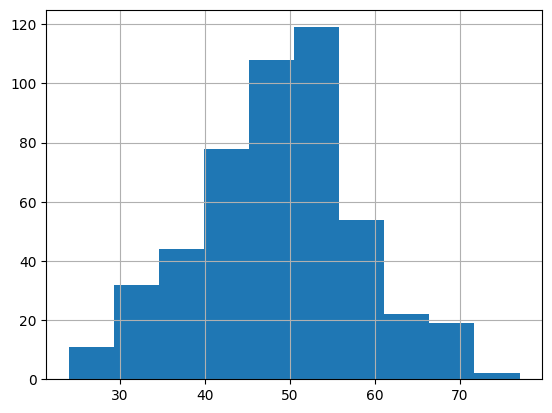

In [132]:
team_attributes['buildUpPlayDribbling'].hist()

Why I have 969 Null values in buildUpPlayDribbling column ?

what is the buildUpPlayDribbling in this dataset ?

In [133]:
team_attributes.duplicated().sum()

0

<Axes: >

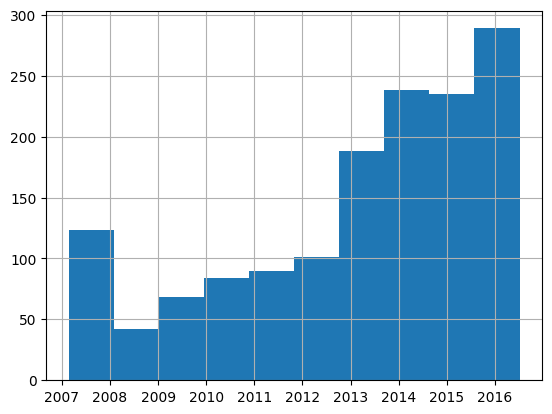

In [134]:
team_attributes['date'].hist()

<Axes: xlabel='buildUpPlayDribbling', ylabel='Density'>

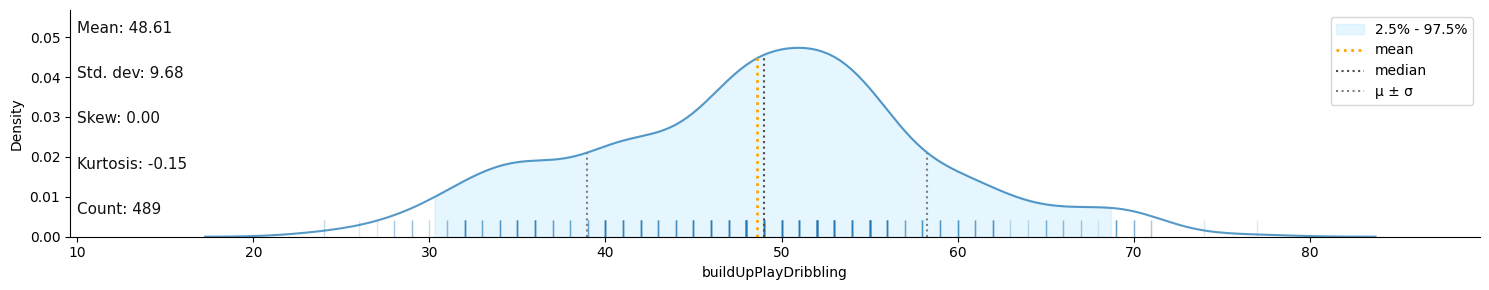

In [135]:
klib.dist_plot(team_attributes['buildUpPlayDribbling'])

<Axes: title={'center': 'Feature-correlation (pearson)'}>

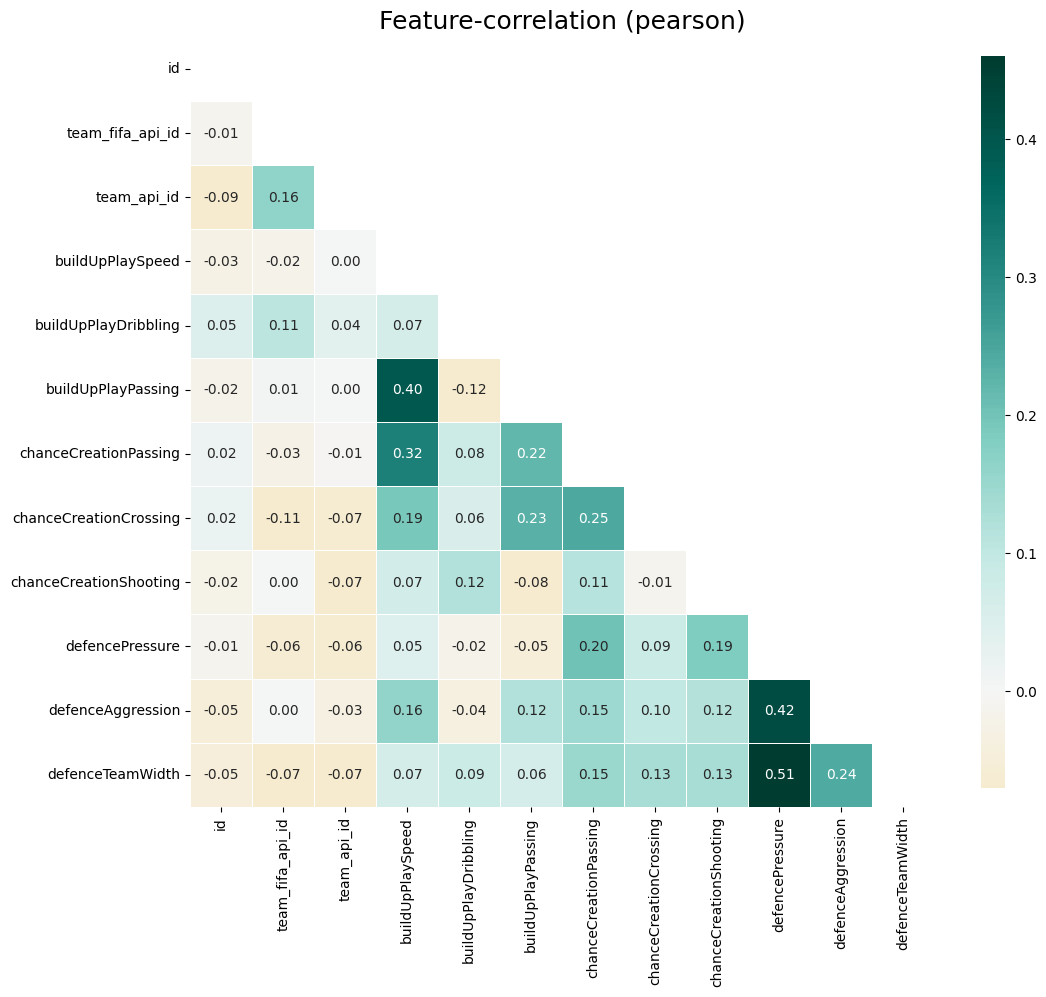

In [136]:
klib.corr_plot(team_attributes)

<Axes: >

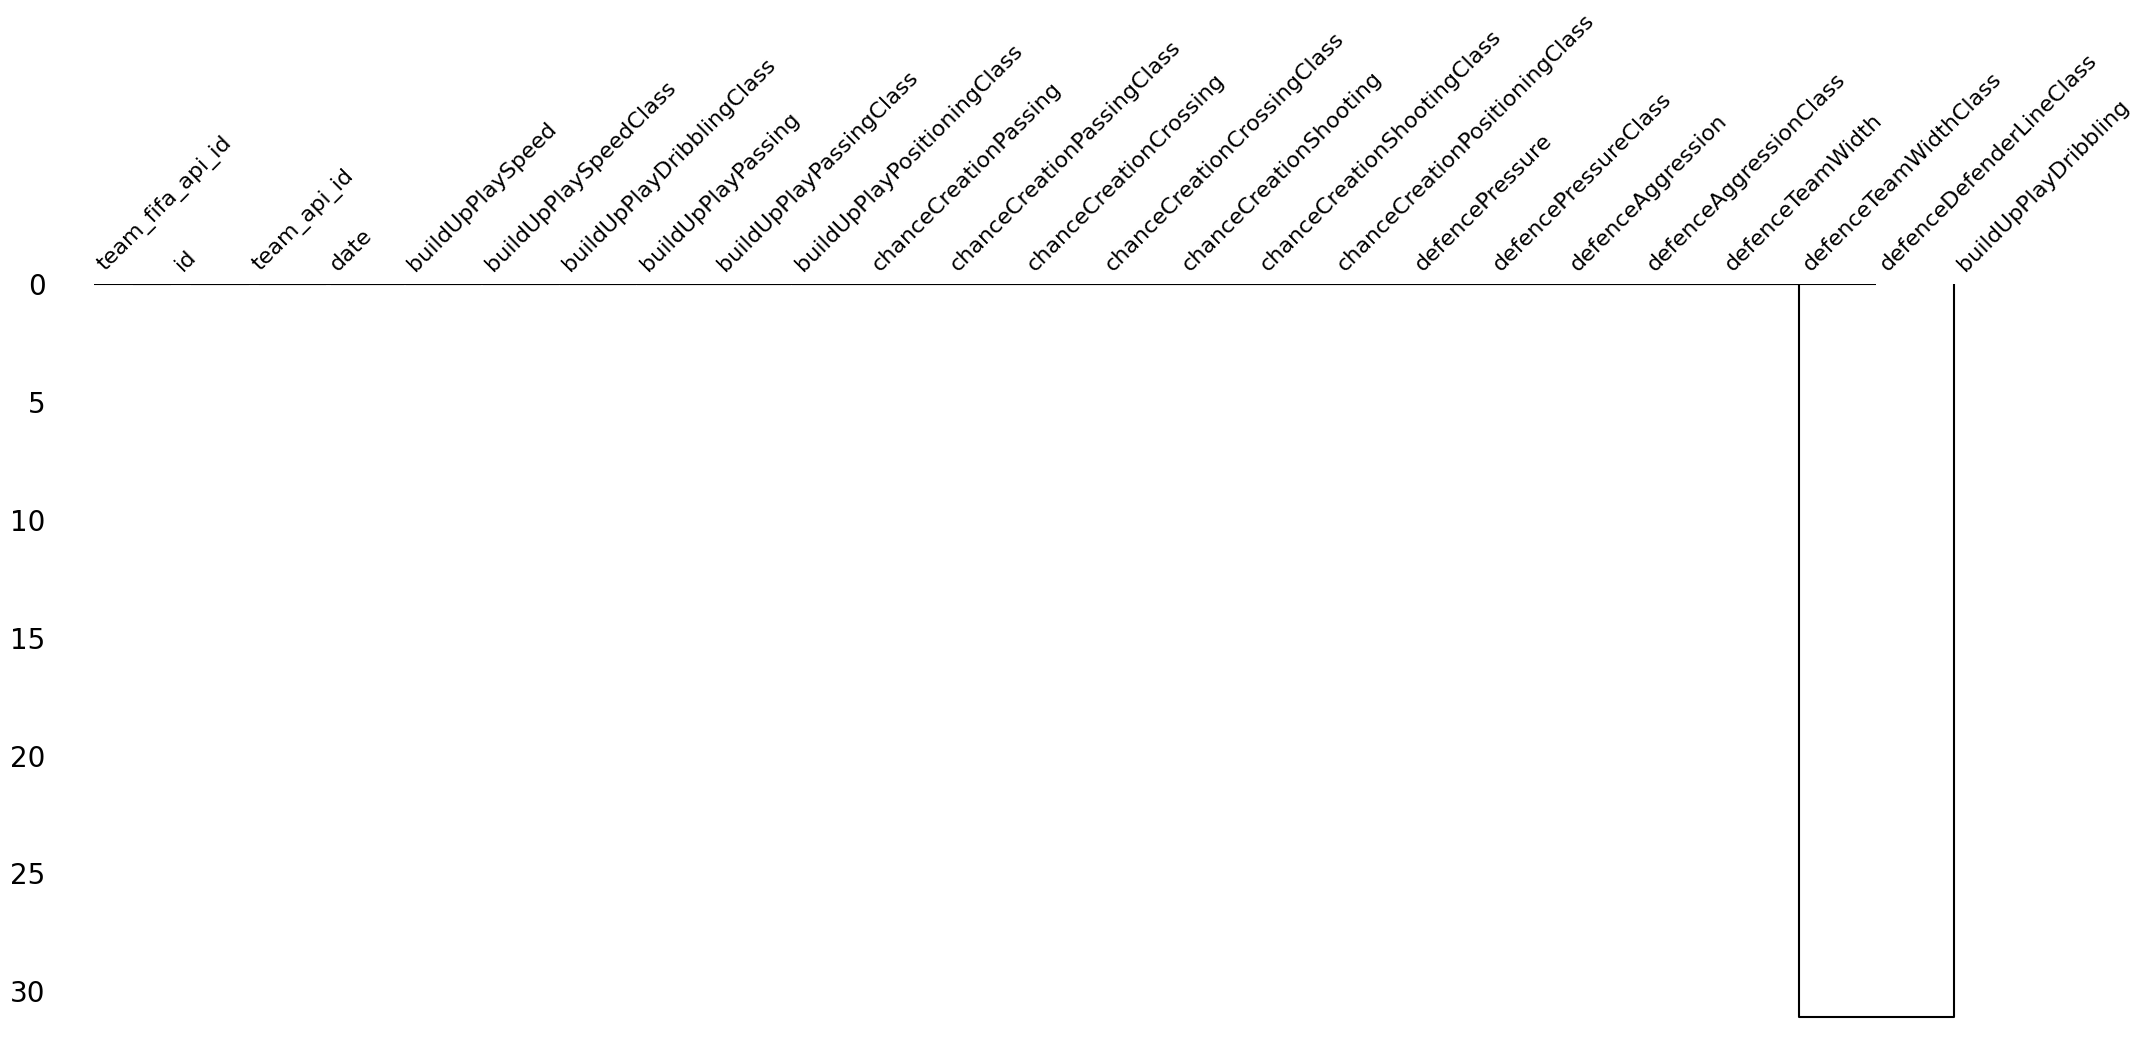

In [137]:
msno.dendrogram(team_attributes)

#Hypothesis Tests Player Attributes Vs. Overall Rating

## Player Age vs. Overall Rating:

**H0** = Age does not affect a player's overall rating.

**Ha** = Age has a significant effect on a player's overall rating.

**Test to Use**: Correlation test to check if age and overall rating are related.

In [132]:
player_ply_att = player_attributes_cleaned.merge(player, on='player_fifa_api_id')
player_ply_att.head(5)

id_x  player_fifa_api_id  player_api_id_x       date  overall_rating  \
0     1              218353           505942 2016-02-18           67.00   
1     2              218353           505942 2015-11-19           67.00   
2     3              218353           505942 2015-09-21           62.00   
3     4              218353           505942 2015-03-20           61.00   
4     5              218353           505942 2007-02-22           61.00   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0      71.00          right              medium              medium     49.00   
1      71.00          right              medium              medium     49.00   
2      66.00          right              medium              medium     49.00   
3      65.00          right              medium              medium     48.00   
4      65.00          right              medium              medium     48.00   

   finishing  heading_accuracy  short_passing  volleys  dribbling  curve  \
0      44.00             71.00          61.00    44.00      51.00  45.00   
1      44.00             71.00          61.00    44.00      51.00  45.00   
2      44.00             71.00          61.00    44.00      51.00  45.00   
3      43.00             70.00          60.00    43.00      50.00  44.00   
4      43.00             70.00          60.00    43.00      50.00  44.00   

   free_kick_accuracy  long_passing  ball_control  acceleration  sprint_speed  \
0               39.00         64.00         49.00         60.00         64.00   
1               39.00         64.00         49.00         60.00         64.00   
2               39.00         64.00         49.00         60.00         64.00   
3               38.00         63.00         48.00         60.00         64.00   
4               38.00         63.00         48.00         60.00         64.00   

   agility  reactions  balance  shot_power  jumping  stamina  strength  \
0    59.00      47.00    65.00       55.00    58.00    54.00     76.00   
1    59.00      47.00    65.00       55.00    58.00    54.00     76.00   
2    59.00      47.00    65.00       55.00    58.00    54.00     76.00   
3    59.00      46.00    65.00       54.00    58.00    54.00     76.00   
4    59.00      46.00    65.00       54.00    58.00    54.00     76.00   

   long_shots  aggression  interceptions  positioning  vision  penalties  \
0       35.00       71.00          70.00        45.00   54.00      48.00   
1       35.00       71.00          70.00        45.00   54.00      48.00   
2       35.00       63.00          41.00        45.00   54.00      48.00   
3       34.00       62.00          40.00        44.00   53.00      47.00   
4       34.00       62.00          40.00        44.00   53.00      47.00   

   marking  standing_tackle  sliding_tackle  gk_diving  gk_handling  \
0    65.00            69.00           69.00       6.00        11.00   
1    65.00            69.00           69.00       6.00        11.00   
2    65.00            66.00           69.00       6.00        11.00   
3    62.00            63.00           66.00       5.00        10.00   
4    62.00            63.00           66.00       5.00        10.00   

   gk_kicking  gk_positioning  gk_reflexes  id_y  player_api_id_y  \
0       10.00            8.00         8.00     1           505942   
1       10.00            8.00         8.00     1           505942   
2       10.00            8.00         8.00     1           505942   
3        9.00            7.00         7.00     1           505942   
4        9.00            7.00         7.00     1           505942   

          player_name   birthday  height  weight  
0  Aaron Appindangoye 1992-02-29  182.88     187  
1  Aaron Appindangoye 1992-02-29  182.88     187  
2  Aaron Appindangoye 1992-02-29  182.88     187  
3  Aaron Appindangoye 1992-02-29  182.88     187  
4  Aaron Appindangoye 1992-02-29  182.88     187

In [133]:
player_age_rating = player_ply_att[['player_fifa_api_id','overall_rating','birthday']]
player_age_rating.head(5)

player_fifa_api_id  overall_rating   birthday
0              218353           67.00 1992-02-29
1              218353           67.00 1992-02-29
2              218353           62.00 1992-02-29
3              218353           61.00 1992-02-29
4              218353           61.00 1992-02-29

In [134]:
player_age_rating['age'] = (pd.Timestamp.now() - player_age_rating['birthday']).astype('<m8[Y]')
player_age_rating['year'] = pd.to_datetime(player_age_rating['birthday'],format='%Y').dt.year

player_age_rating.head(5)

player_fifa_api_id  overall_rating   birthday   age  year
0              218353           67.00 1992-02-29 31.00  1992
1              218353           67.00 1992-02-29 31.00  1992
2              218353           62.00 1992-02-29 31.00  1992
3              218353           61.00 1992-02-29 31.00  1992
4              218353           61.00 1992-02-29 31.00  1992

In [135]:
import scipy.stats as stats

age_player = player_age_rating['age']
rate_player = player_age_rating['overall_rating']

correlation, p_value = stats.pearsonr(age_player, rate_player)

(correlation, p_value)

(0.283900689634948, 0.0)

1. **Correlation Coefficient: 0.284**

Interpretation:
The correlation coefficient is positive, indicating a positive linear relationship between age and player rating. As one variable increases, the other tends to increase as well.
The value 0.284 suggests a weak positive correlation since it is closer to 0 than to 1

2. **P-value: 0.0**

Interpretation:
The p-value is less than the common alpha level of 0.05, so you would reject the null hypothesis (H0).
A p-value of 0.0 doesn't literally mean the probability is zero. It usually indicates that the p-value is very small, smaller than the precision that the software can detect.
This suggests that the observed correlation is statistically significant and is unlikely to be due to random chance.

**Conclusion:**

While the correlation is weak, the p-value suggests that it is statistically significant, meaning there is some degree of linear relationship between a player's age and their rating. However, the weak correlation indicates that age alone may not be a strong predictor of a player’s rating.

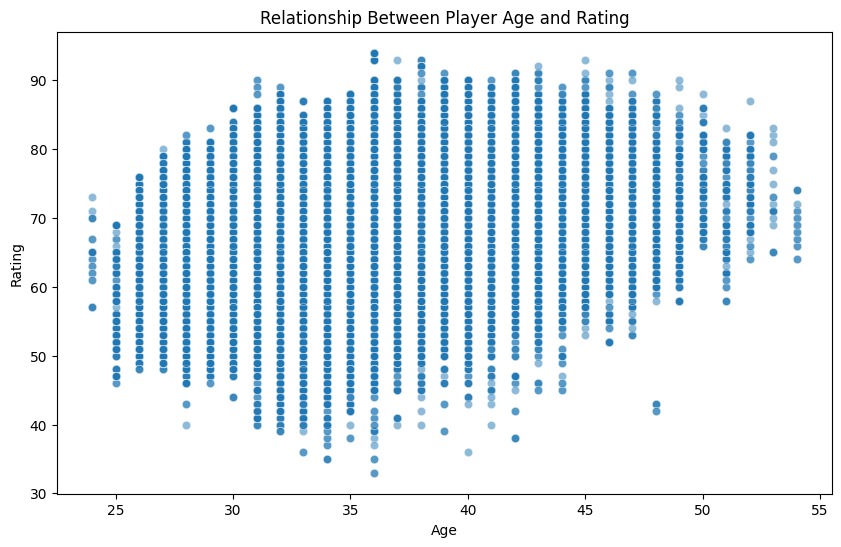

In [136]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=player_age_rating, x='age', y='overall_rating', alpha=0.5)

plt.title('Relationship Between Player Age and Rating')
plt.xlabel('Age')
plt.ylabel('Rating')

plt.show()

##Player height and wight  vs. Overall Rating:

**Height vs. Overall Rating:**

H0 : Player height does not affect overall rating.

Ha : Player height affects overall rating.

**Weight vs. Overall Rating:**

H0 : Player weight does not affect overall rating.

Ha : Player weight affects overall rating.

**Test to Use:**

Correlation Test: To check if height and weight are linearly correlated with overall rating.

In [137]:
player_height_weight_rating = player_ply_att[['player_fifa_api_id','overall_rating','height','weight']]
player_height_weight_rating.head()

player_fifa_api_id  overall_rating  height  weight
0              218353           67.00  182.88     187
1              218353           67.00  182.88     187
2              218353           62.00  182.88     187
3              218353           61.00  182.88     187
4              218353           61.00  182.88     187

In [138]:
player_height_weight_rating = player_height_weight_rating.dropna()

player_height = player_height_weight_rating['height']
player_weight = player_height_weight_rating['weight']
player_rating = player_height_weight_rating['overall_rating']

corr_height, p_value_height = stats.pearsonr(player_height, player_rating)
corr_weight, p_value_weight = stats.pearsonr(player_weight, player_rating)

print(f"Correlation between Height and Overall Rating = {corr_height}")
print(f"P_value_height = {p_value_height}")
print(f"Correlation between Weight and Overall Rating = {corr_weight}")
print(f"P_value_weight = {p_value_weight}")

Correlation between Height and Overall Rating = -0.005510698605794485
P_value_height = 0.020726702235232073
Correlation between Weight and Overall Rating = 0.06424137650921818
P_value_weight = 1.896034046488084e-160


Interpretations:

1. Height and Overall Rating:

Correlation: The correlation coefficient is -0.0055, which is very close to zero. This implies a very weak (almost negligible) negative linear relationship between height and overall rating.

P-Value: The p-value of 0.020 is above a typical α level of 0.05, so we fail to reject the null hypothesis (H0) that there is no correlation between height and overall rating.

2. Weight and Overall Rating:

Correlation: The correlation coefficient is 0.0642, indicating a weak positive linear relationship between weight and overall rating.

P-Value: The p-value is virtually zero, which is below a typical α level of 0.05. This means that the correlation is statistically significant, and we reject the null hypothesis (H0) that there is no correlation between weight and overall rating.


Conclusions:

Height: There is no significant correlation between a player's height and their overall rating.

Weight: While the correlation between weight and overall rating is statistically significant, the correlation coefficient indicates that the relationship is weak. So, while weight may have a statistically significant relationship with overall rating, the practical significance of this relationship is limited.

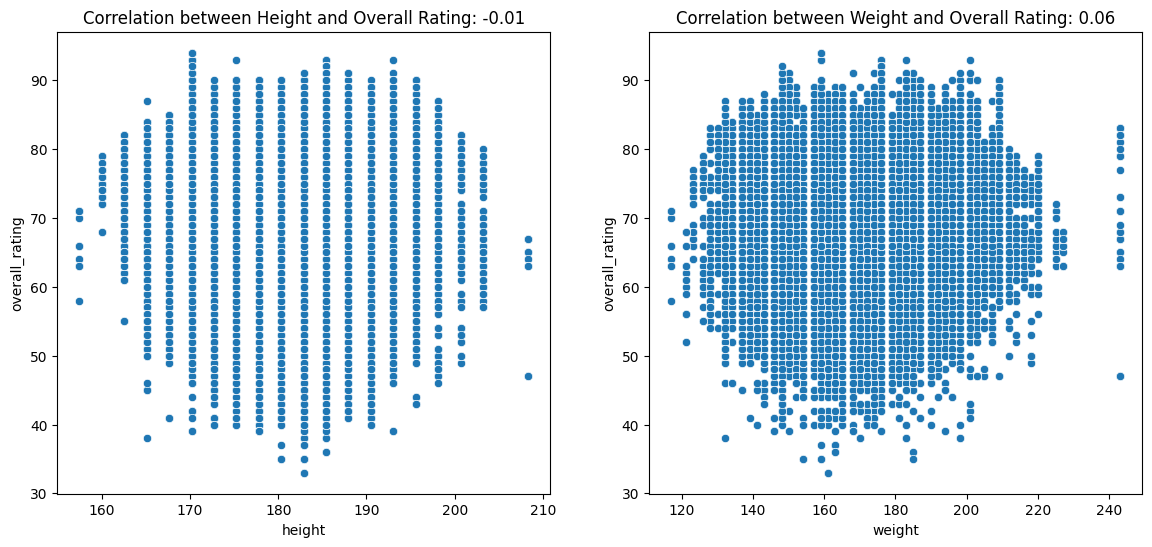

In [139]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.scatterplot(data=player_height_weight_rating, x='height', y='overall_rating', ax=ax[0])
sns.scatterplot(data=player_height_weight_rating, x='weight', y='overall_rating', ax=ax[1])

ax[0].set_title(f'Correlation between Height and Overall Rating: {corr_height:.2f}')
ax[1].set_title(f'Correlation between Weight and Overall Rating: {corr_weight:.2f}')

plt.show()

## Correlations Player Attributes Vs. Overall Rating:

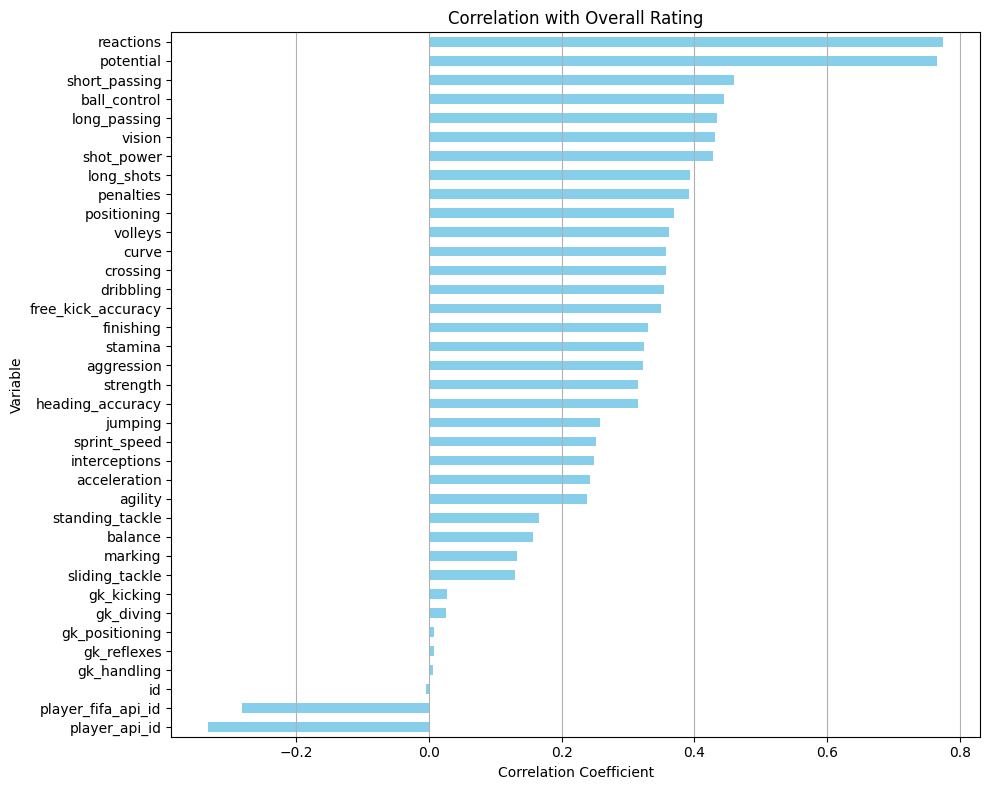

In [140]:
correlations = player_attributes_cleaned.corr()['overall_rating'].drop('overall_rating')

plt.figure(figsize=(10, 8))
correlations.sort_values().plot(kind='barh', color='skyblue')
plt.title('Correlation with Overall Rating')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variable')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [141]:
most_corr_player_att = player_attributes_cleaned[['reactions','potential','short_passing','ball_control',
                          'long_passing','vision','shot_power']]

most_corr_player_att.head()

reactions  potential  short_passing  ball_control  long_passing  vision  \
0      47.00      71.00          61.00         49.00         64.00   54.00   
1      47.00      71.00          61.00         49.00         64.00   54.00   
2      47.00      66.00          61.00         49.00         64.00   54.00   
3      46.00      65.00          60.00         48.00         63.00   53.00   
4      46.00      65.00          60.00         48.00         63.00   53.00   

   shot_power  
0       55.00  
1       55.00  
2       55.00  
3       54.00  
4       54.00

In [142]:
most_corr_player_att.describe()

reactions  potential  short_passing  ball_control  long_passing  \
count  176161.00  176161.00      176161.00     176161.00     176161.00   
mean       66.22      73.52          62.54         63.52         57.14   
std         9.14       6.58          14.18         15.20         14.42   
min        17.00      39.00           3.00          5.00          3.00   
25%        61.00      69.00          57.00         59.00         49.00   
50%        67.00      74.00          65.00         67.00         59.00   
75%        73.00      78.00          72.00         73.00         67.00   
max        96.00      97.00          97.00         97.00         97.00   

         vision  shot_power  
count 176161.00   176161.00  
mean      57.89       61.95  
std       15.16       16.13  
min        1.00        2.00  
25%       49.00       54.00  
50%       60.00       66.00  
75%       69.00       73.00  
max       97.00       97.00

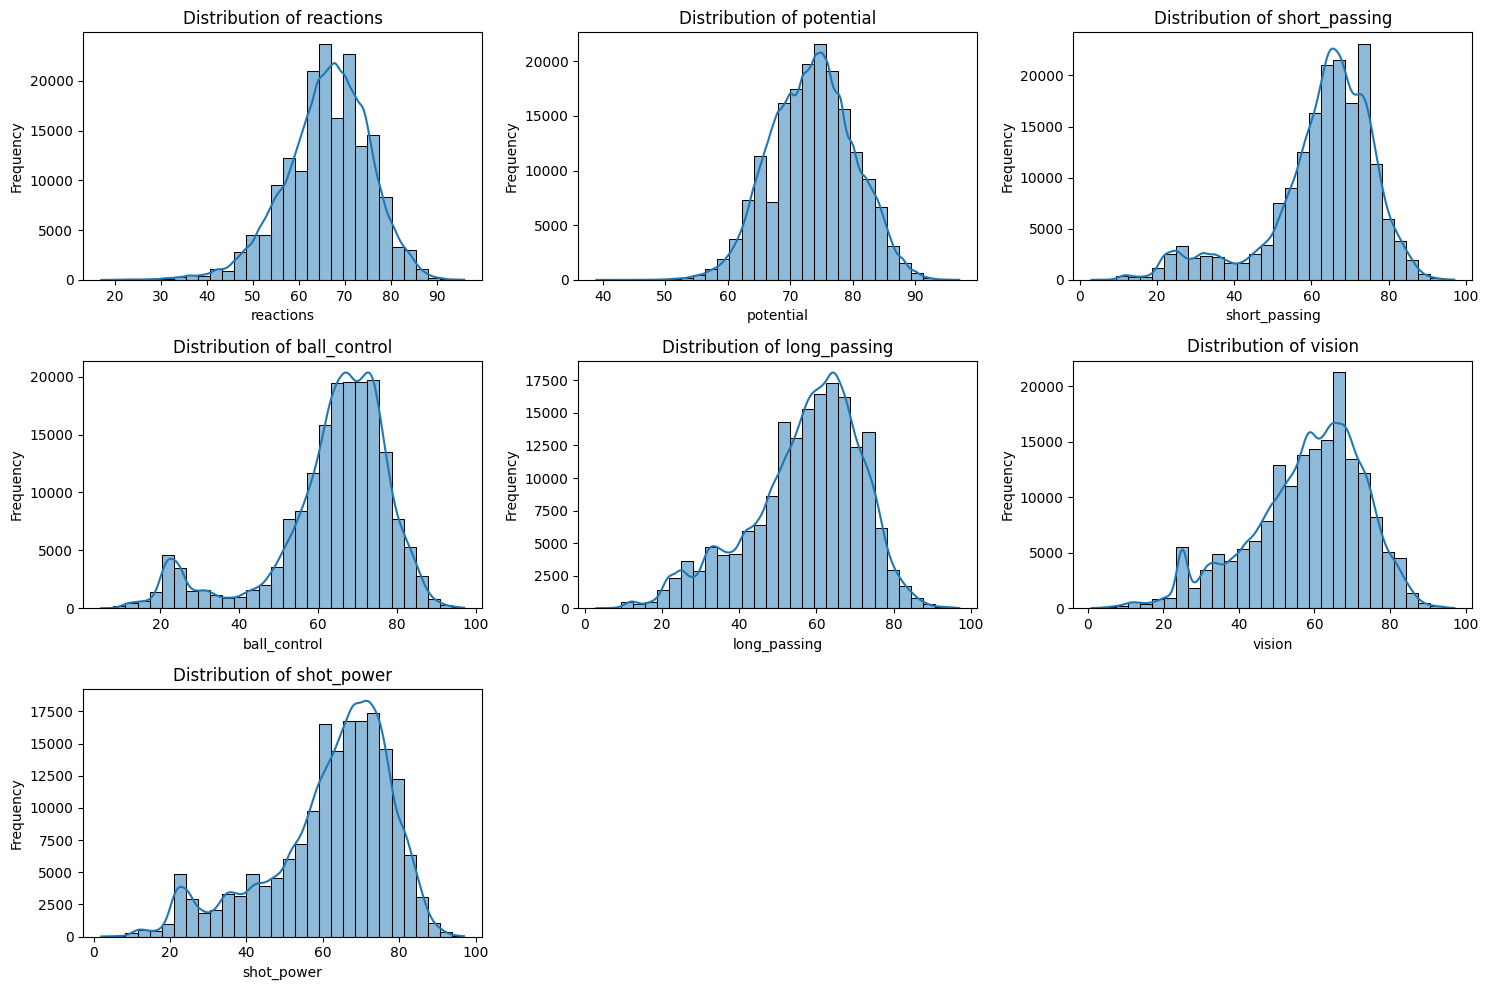

In [143]:
n_cols = 3
n_rows = int(len(most_corr_player_att.columns) / n_cols) + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

for ax, col in zip(axes.flatten(), most_corr_player_att.columns):
    sns.histplot(most_corr_player_att[col], bins=30, kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Remove any empty subplots
for i in range(len(most_corr_player_att.columns), n_cols * n_rows):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

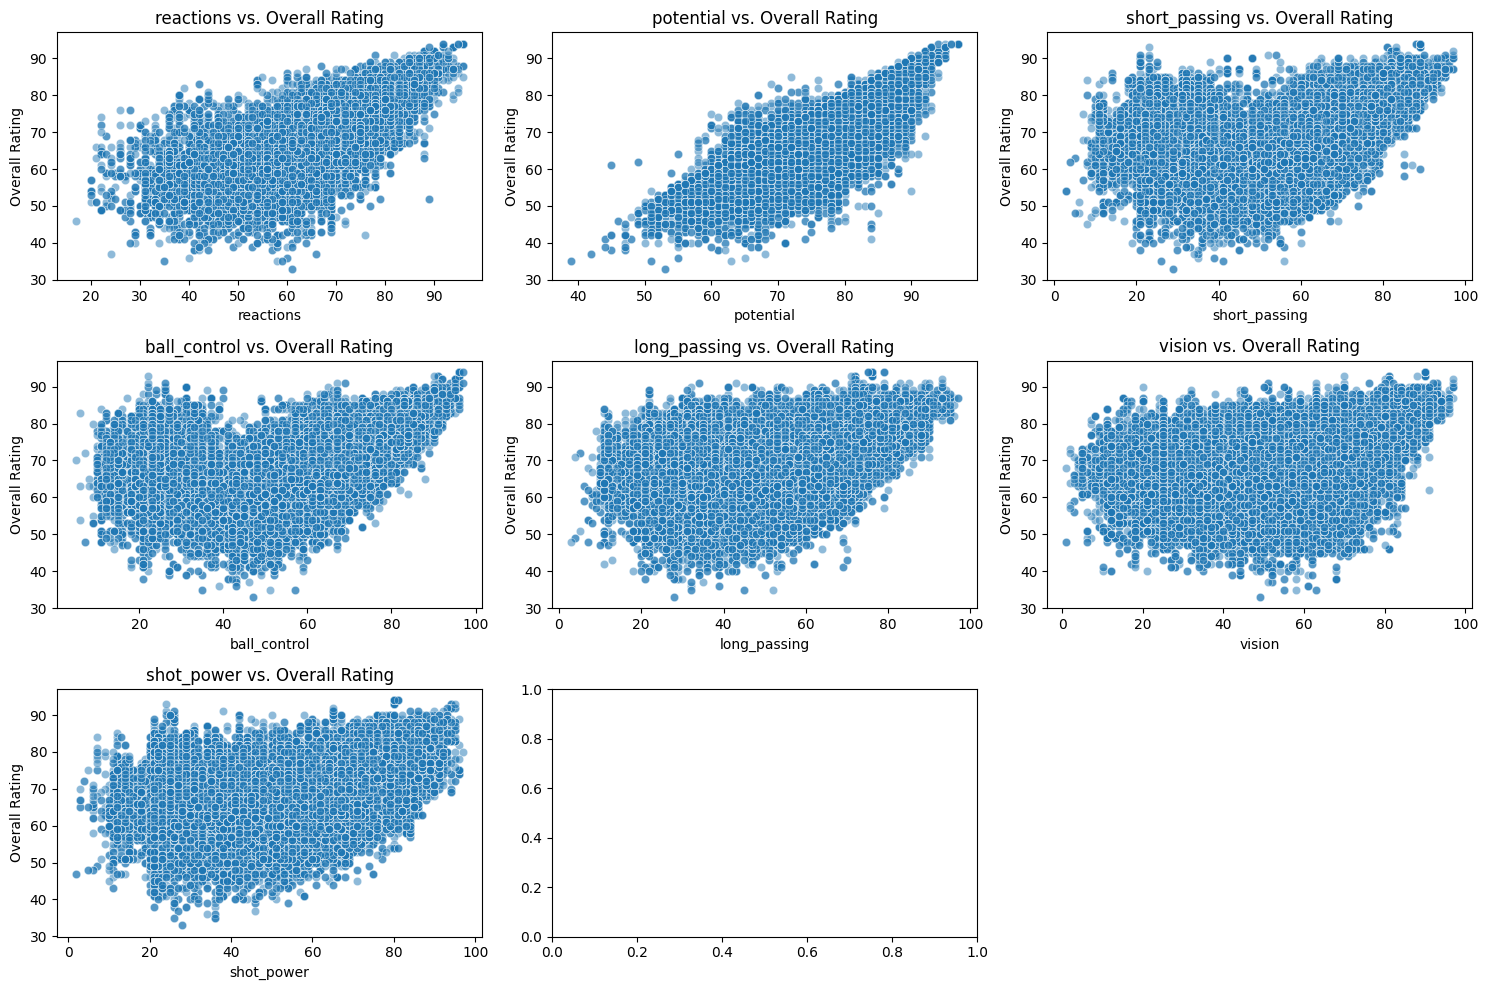

In [144]:
most_corr_player_att = player_attributes_cleaned[['reactions','potential',
                                                  'short_passing','ball_control',
                                                  'long_passing','vision',
                                                  'shot_power','overall_rating']]

n_cols = 3
n_rows = int(len(most_corr_player_att.columns) / n_cols) + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

for ax, col in zip(axes.flatten(), most_corr_player_att.columns):
    if col != 'overall_rating':  # Avoid plotting overall_rating vs. itself
        sns.scatterplot(x=col, y='overall_rating', data=most_corr_player_att, ax=ax, alpha=0.5)
        ax.set_title(f'{col} vs. Overall Rating')
        ax.set_xlabel(col)
        ax.set_ylabel('Overall Rating')

# Remove any empty subplots
for i in range(len(most_corr_player_att.columns), n_cols * n_rows):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

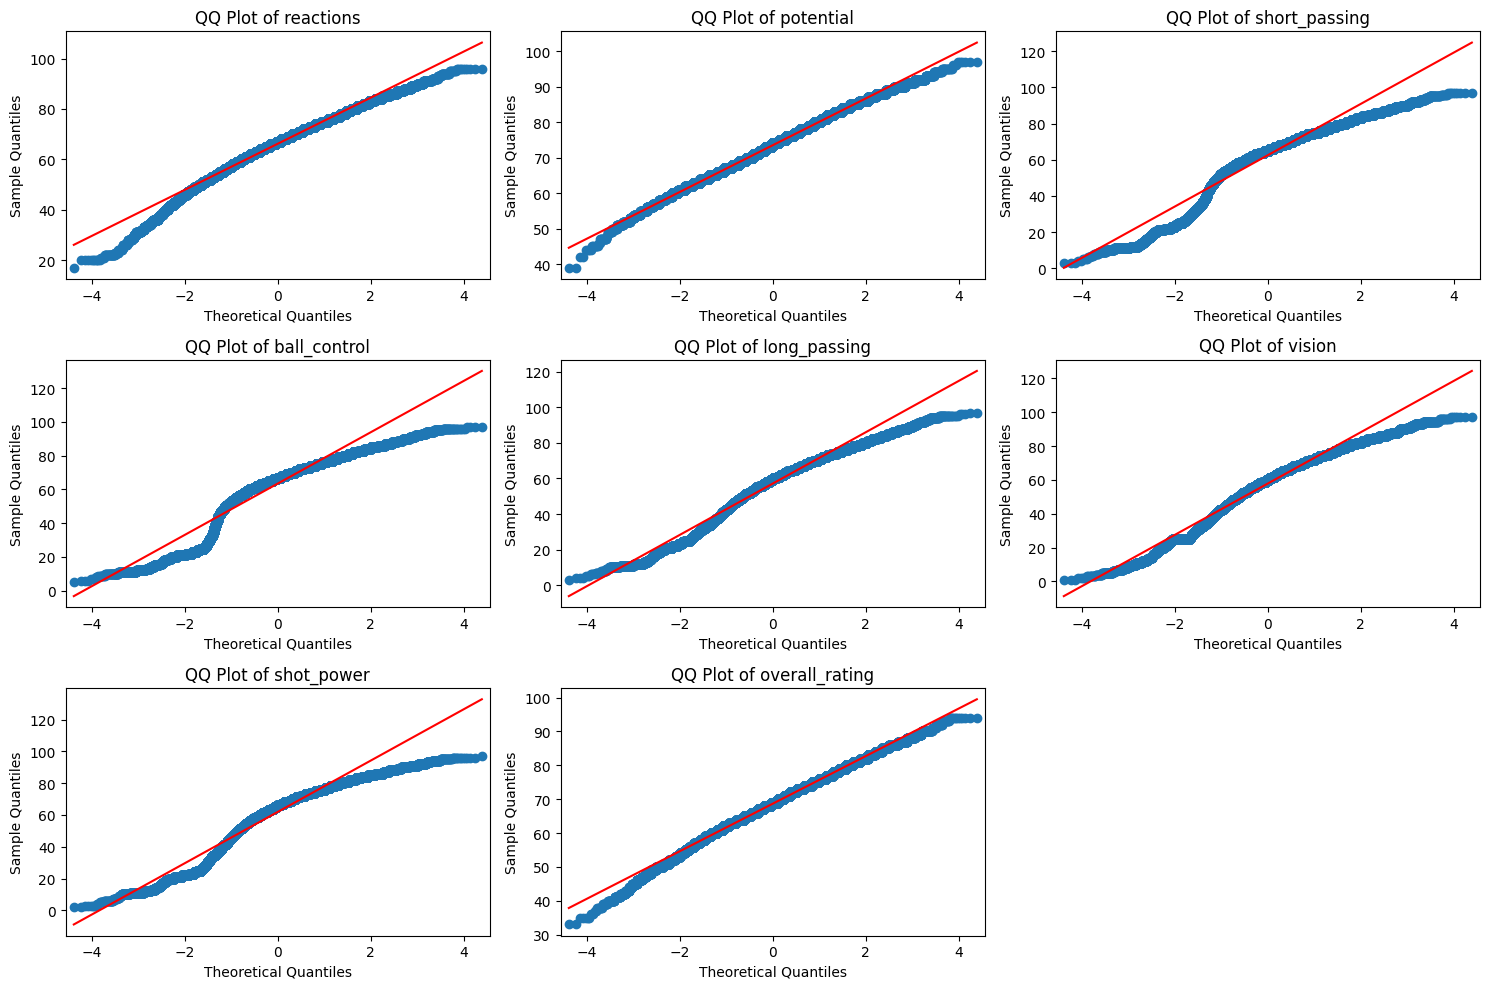

In [145]:
import statsmodels.api as sm

n_cols = 3
n_rows = int(len(most_corr_player_att.columns) / n_cols) + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

for ax, col in zip(axes.flatten(), most_corr_player_att.columns):
    sm.qqplot(most_corr_player_att[col], line='s', ax=ax)
    ax.set_title(f'QQ Plot of {col}')

for i in range(len(most_corr_player_att.columns), n_cols * n_rows):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [146]:
from sklearn.model_selection import train_test_split

categorical_cols = ['preferred_foot', 'attacking_work_rate', 'defensive_work_rate']
player_attributes_df = pd.get_dummies(player_attributes_cleaned, columns=categorical_cols, drop_first=True)

X = player_attributes_df.drop(columns=['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating'])
y = player_attributes_df['overall_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((140928, 39), (35233, 39))

The dataset has been split into training and testing sets, with 140,928 samples in the training set and 35,233 samples in the testing set. Each sample has 39 features after one-hot encoding.

In [147]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_const).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         overall_rating   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 1.971e+04
Date:                Thu, 19 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:34:49   Log-Likelihood:            -3.4325e+05
No. Observations:              140928   AIC:                         6.866e+05
Df Residuals:                  140888   BIC:                         6.870e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

**R-squared & Adjusted R-squared: **

These metrics provide information about the goodness-of-fit of the model. An R2 value of 0.845 suggests that the model explains approximately 84.5% of the variance in the overall_rating.

**Coefficients: **

For each feature, the coefficient indicates the average change in the overall_rating for a unit change in that feature, assuming all other features are held constant. For instance, a unit increase in potential is associated with an average increase of 0.3737 in the overall_rating.

**P-values: **

This indicates the significance of each feature in predicting the overall_rating. A low p-value (typically ≤ 0.05) indicates that you can reject the null hypothesis that the coefficient is zero (i.e., the feature has no effect). High p-values suggest that the feature might not be statistically significant in predicting the outcome.

* Many predictors are statistically significant (with p-values close to 0), like potential, crossing, heading_accuracy, etc.

Overall, the model seems to be a good fit, with an R2 of 0.845, but potential multicollinearity issues should be addressed to ensure the stability and reliability of the model coefficients.

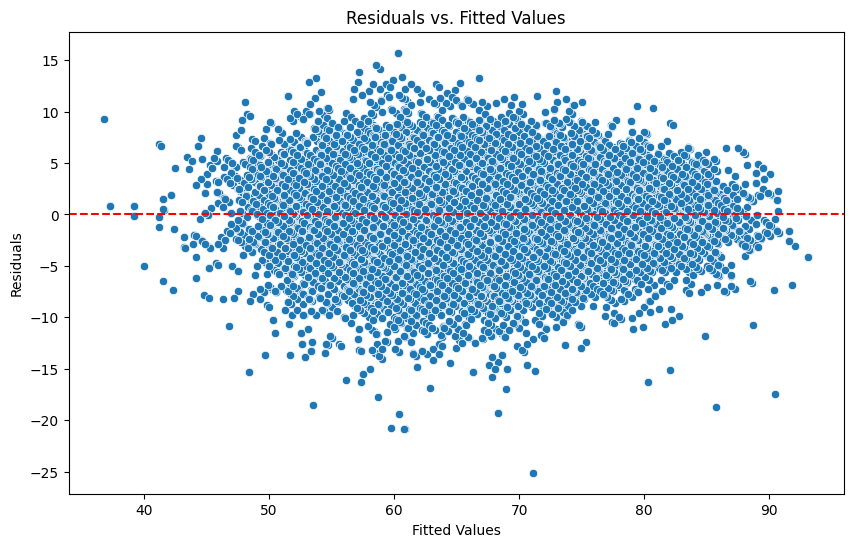

In [148]:
residuals = model.resid

plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

<Figure size 1000x600 with 0 Axes>

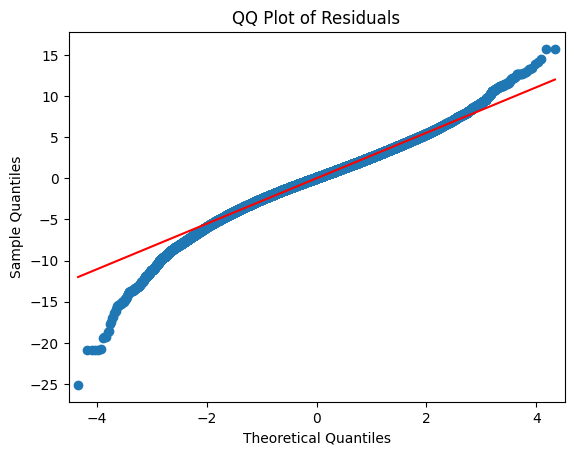

In [149]:
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

If certain features are correlated, does it imply a linear regression relationship? For example, if a feature like a player's potential is highly correlated with the overall rating, can it be considered a suitable feature for calculating linear regression?

#Main Question

##  1. Which leagues are in which countries?

In [150]:
query = """
SELECT C.name AS Country, L.name AS League
FROM Country C
JOIN League L ON C.id = L.country_id;
"""

leagues_countries = pd.read_sql_query(query,conn)
leagues_countries

Country                    League
0       Belgium    Belgium Jupiler League
1       England    England Premier League
2        France            France Ligue 1
3       Germany     Germany 1. Bundesliga
4         Italy             Italy Serie A
5   Netherlands    Netherlands Eredivisie
6        Poland        Poland Ekstraklasa
7      Portugal  Portugal Liga ZON Sagres
8      Scotland   Scotland Premier League
9         Spain           Spain LIGA BBVA
10  Switzerland  Switzerland Super League

In [151]:
leagues_countries.value_counts()

Country      League                  
Belgium      Belgium Jupiler League      1
England      England Premier League      1
France       France Ligue 1              1
Germany      Germany 1. Bundesliga       1
Italy        Italy Serie A               1
Netherlands  Netherlands Eredivisie      1
Poland       Poland Ekstraklasa          1
Portugal     Portugal Liga ZON Sagres    1
Scotland     Scotland Premier League     1
Spain        Spain LIGA BBVA             1
Switzerland  Switzerland Super League    1
dtype: int64

Every country has at lest one league

##2. Which leagues score the most/fewest goals?

In [152]:
query = """
SELECT L.name AS league_name,
       AVG(M.home_team_goal + M.away_team_goal) AS avg_goals_per_match
FROM League L
JOIN Match M ON L.country_id = M.country_id
GROUP BY L.name
ORDER BY avg_goals_per_match DESC;
"""

AVG_leagues_score = pd.read_sql_query(query,conn)
AVG_leagues_score

league_name  avg_goals_per_match
0     Netherlands Eredivisie                 3.08
1   Switzerland Super League                 2.93
2      Germany 1. Bundesliga                 2.90
3     Belgium Jupiler League                 2.80
4            Spain LIGA BBVA                 2.77
5     England Premier League                 2.71
6    Scotland Premier League                 2.63
7              Italy Serie A                 2.62
8   Portugal Liga ZON Sagres                 2.53
9             France Ligue 1                 2.44
10        Poland Ekstraklasa                 2.42

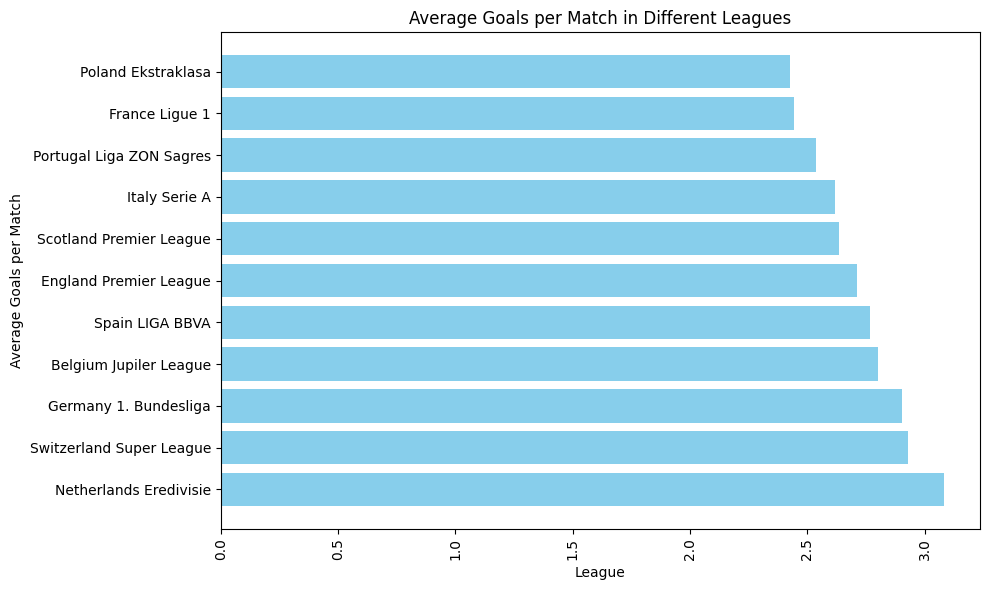

In [153]:
# Creating a bar chart
plt.figure(figsize=(10, 6))
plt.barh(AVG_leagues_score['league_name'], AVG_leagues_score['avg_goals_per_match'], color='skyblue')
plt.xlabel('League')
plt.ylabel('Average Goals per Match')
plt.title('Average Goals per Match in Different Leagues')
plt.xticks(rotation=90)
plt.tight_layout()

# Displaying the chart
plt.show()

count of matches (records) where goals were scored.

In [154]:
query = """
SELECT L.name AS league_name,
       COUNT(M.home_team_goal + M.away_team_goal) AS count_goals
FROM League L
JOIN Match M ON L.country_id = M.country_id
GROUP BY L.name
ORDER BY count_goals DESC;
"""

count_leagues_score = pd.read_sql_query(query,conn)
count_leagues_score

league_name  count_goals
0     England Premier League         3040
1             France Ligue 1         3040
2            Spain LIGA BBVA         3040
3              Italy Serie A         3017
4      Germany 1. Bundesliga         2448
5     Netherlands Eredivisie         2448
6   Portugal Liga ZON Sagres         2052
7         Poland Ekstraklasa         1920
8    Scotland Premier League         1824
9     Belgium Jupiler League         1728
10  Switzerland Super League         1422

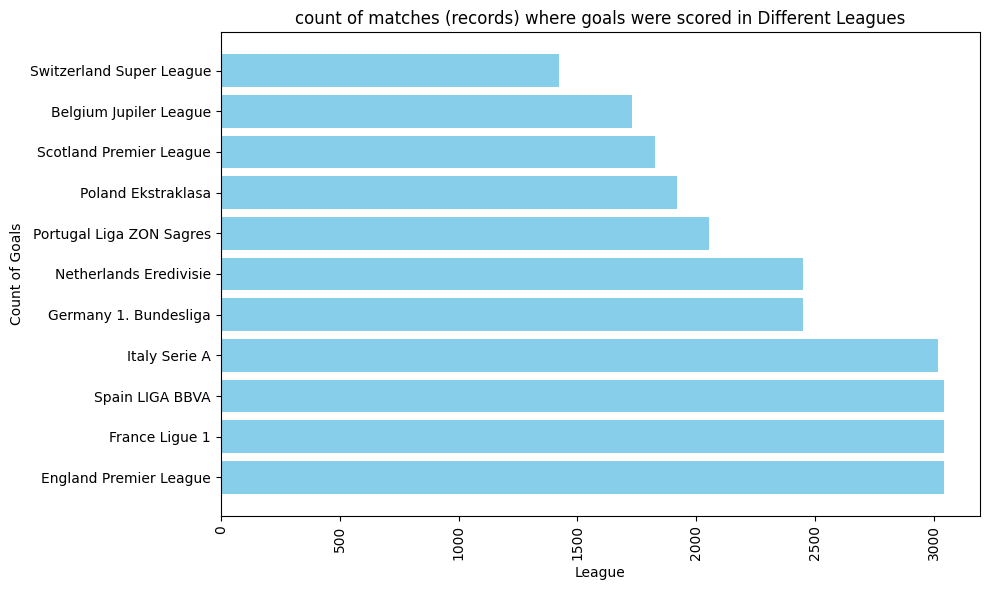

In [155]:
# Creating a bar chart
plt.figure(figsize=(10, 6))
plt.barh(count_leagues_score['league_name'], count_leagues_score['count_goals'], color='skyblue')
plt.xlabel('League')
plt.ylabel('Count of Goals')
plt.title('count of matches (records) where goals were scored in Different Leagues')
plt.xticks(rotation=90)
plt.tight_layout()

# Displaying the chart
plt.show()

 the total number of goals scored in each league

In [156]:
query = """
SELECT L.name AS league_name,
       SUM(M.home_team_goal + M.away_team_goal) AS SUM_goals
FROM League L
JOIN Match M ON L.country_id = M.country_id
GROUP BY L.name
ORDER BY SUM_goals DESC;
"""

sum_leagues_score = pd.read_sql_query(query,conn)
sum_leagues_score

league_name  SUM_goals
0            Spain LIGA BBVA       8412
1     England Premier League       8240
2              Italy Serie A       7895
3     Netherlands Eredivisie       7542
4             France Ligue 1       7427
5      Germany 1. Bundesliga       7103
6   Portugal Liga ZON Sagres       5201
7     Belgium Jupiler League       4841
8    Scotland Premier League       4804
9         Poland Ekstraklasa       4656
10  Switzerland Super League       4166

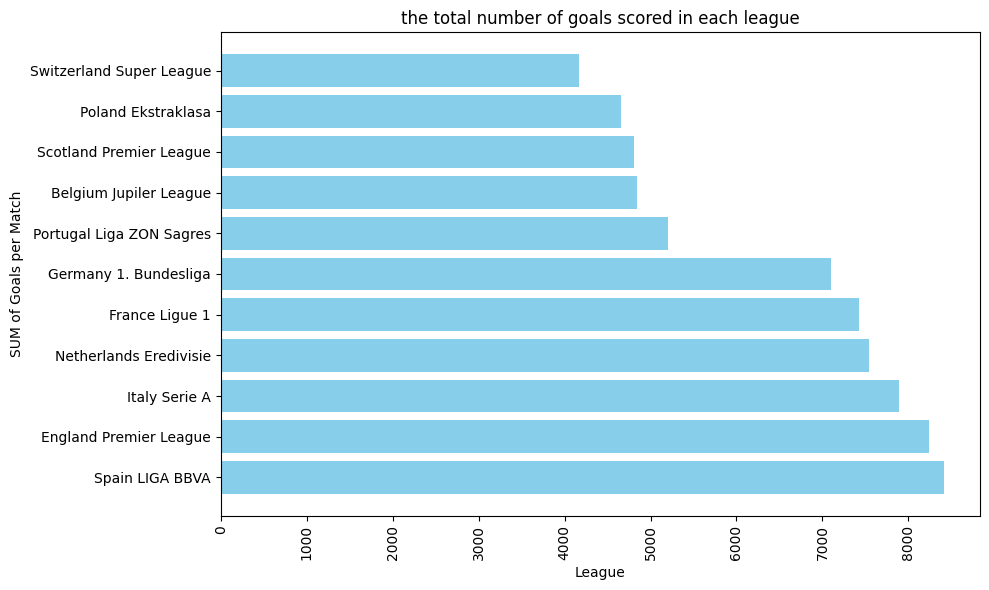

In [157]:
# Creating a bar chart
plt.figure(figsize=(10, 6))
plt.barh(sum_leagues_score['league_name'], sum_leagues_score['SUM_goals'], color='skyblue')
plt.xlabel('League')
plt.ylabel('SUM of Goals per Match')
plt.title('the total number of goals scored in each league')
plt.xticks(rotation=90)
plt.tight_layout()

# Displaying the chart
plt.show()

##3. Who are the top scorers in each team and league?

In [158]:
# Grouping by player and team and counting the number of goals
top_scorers_teamwise = xml_dataframes['goal'].groupby(['player1', 'team']).size().reset_index(name='goal_count')
top_scorers_teamwise

player1   team  goal_count
0     100033   8636           1
1     101041  10242           3
2     101042  10217           2
3     101070   9869           4
4     101103   8456           4
...      ...    ...         ...
6454   99047   8560          11
6455   99054   8560           5
6456   99323   7788           4
6457   99333   9864           1
6458   99333   9865           1

[6459 rows x 3 columns]

In [159]:
# Finding the top scorer(s) for each team
top_scorers_teamwise = top_scorers_teamwise.sort_values(by=['team', 'goal_count'], ascending=[True, False]).groupby('team').head(1)
top_scorers_teamwise

player1    team  goal_count
480   143365   10003          25
4634   38827   10167          26
1242  187266   10172          21
4573   38601   10179           9
4196   36784   10189          88
355   119839   10190           9
238   113237   10191           7
4370   37554   10192          17
3817   33881   10194          46
3859   34082   10199          11
4583   38699   10205          45
1511   20645   10217          16
770   160906   10218          21
3137  303926   10228          16
5652  467022   10229          28
3468   30991   10233          36
4220   37139   10235          19
2574   26420   10242          14
3942    3517   10243           5
5116   41124   10249          33
1798   23264   10252          53
3323   30829   10260         135
5650   46700   10261          41
4344   37506   10267          60
397   128732   10268          15
2679   27234   10269          54
3281   30728   10278          13
5673   46808   10281          23
1457  199834  108893           3
6055   69619    1601           1
3064  299886  208931           5
6255   79982    2182           3
1020  178196    2183           1
6153   74169    4087          24
5204   41394    6269          12
5630  466143    6391           9
40    102719    6413          16
2509  262753    6433           3
840   165525    6631           3
2326   25551    7788          16
6098   71605    7794          15
1152  183530    7819          13
3071  301809    7869           7
777   161291    7878          46
1019  178142    7896           5
4181  364520    7943          41
547    14950    8021           1
5432  426612    8121           9
3257   30702    8152           6
1382  194533    8165          17
5806   50345    8177          33
3492   31199    8178         112
1683  214426    8191          11
978   174634    8194           9
2981  286119    8197          30
4079   36011    8226          47
925   171091    8234          12
1515  206774    8245           2
4206   36889    8262          17
2890  278473    8277          16
4273   37389    8295           9
6193   75310    8302          73
4345   37506    8305          29
1668  213729    8306          11
3661   33028    8315          72
553   149917    8344           7
4168   36389    8350          17
463   140965    8357           5
5651   46700    8358          41
5131   41168    8370          29
1887   23853    8371          25
1463  200917    8372          18
4556   38550    8388          13
5087   40958    8394          23
4373   37558    8398           9
2668   26982    8406          25
3216   30631    8455          83
4285   37412    8456         105
1711  215804    8460           7
3325   30830    8462          10
2991  288349    8464          18
4717   39225    8466          29
1915   23949    8472          36
6217   75474    8479          10
430   131995    8481           9
4685   39109    8483          14
6319   93471    8521          15
3978   35421    8524          61
223   112471    8525          11
5664  467488    8526           9
6089   71550    8528          26
5210   41411    8529          30
4249   37273    8530          35
2093   24448    8533          62
3090   30284    8534          25
3364   30881    8535          54
2793   27613    8537          15
3627   32747    8540          68
3218   30638    8543          53
3868   34177    8548           7
5356   42183    8549           9
6290   91560    8550          10
5339   42041    8551          27
4570   38578    8558          42
1910   23934    8559          39
5591   46289    8560          57
5625   46554    8564          45
4751   39311    8576          11
5176   41294    8581          19
2512   26288    8583           7
1377  194165    8586          54
2873  277341    8588           8
4451   38098    8592          58
2880  277460    8593          30
2872   27734    8600         156
3616   32627    8602          22
6423   96652    8603          67
4090  360559    8611          27
3379   30893    8633         270
3458   30981    8634         295
3178   30549

In [160]:
# Convert the 'team' column to int before merging
top_scorers_teamwise['team'] = top_scorers_teamwise['team'].astype(int)

# Perform the merges again
top_scorers_with_teams = top_scorers_teamwise.merge(team, left_on='team', right_on='team_api_id')
top_scorers_with_leagues = top_scorers_with_teams.merge(league, left_on='team_fifa_api_id', right_on='id')

# Keeping only the relevant columns
top_scorers_with_leagues = top_scorers_with_leagues[['player1',
                                                     'team_long_name',
                                                     'name',
                                                     'goal_count']]

# Renaming the columns for clarity
top_scorers_with_leagues.rename(columns={'player1': 'Player ID',
                                         'team_long_name': 'Team Name',
                                         'name': 'League Name',
                                         'goal_count': 'Goals Scored'},
                                         inplace=True)

top_scorers_with_leagues.head()


Player ID Team Name             League Name  Goals Scored
0     30843   Arsenal  Belgium Jupiler League            72

In [161]:
player_name1 = conn.execute("SELECT player_name FROM Player WHERE player_api_id = 30843;").fetchone()[0]
player_name1

'Robin van Persie'

In [162]:
def get_player_name(player_id, connection):
    query = f"SELECT player_name FROM Player WHERE player_api_id = {player_id};"
    player_name = connection.execute(query).fetchone()
    if player_name:
        return player_name[0]
    else:
        return "Player not found"

In [163]:
top_scorers_with_teams.sort_values(by='goal_count',ascending=False).head()

player1   team  goal_count     id  team_api_id  team_fifa_api_id  \
119   30981   8634         295  43042         8634            241.00   
118   30893   8633         270  43040         8633            243.00   
114   27734   8600         156  20531         8600             55.00   
21    30829  10260         135   3457        10260             11.00   
165   35724   9847         120   9548         9847             73.00   

          team_long_name team_short_name team_identifier  
119         FC Barcelona             BAR        BAR_8634  
118       Real Madrid CF             REA        REA_8633  
114              Udinese             UDI        UDI_8600  
21     Manchester United             MUN       MUN_10260  
165  Paris Saint-Germain             PSG        PSG_9847

In [164]:
print(get_player_name(30981,conn))
print(get_player_name(30893,conn))
print(get_player_name(27734,conn))
print(get_player_name(30829,conn))
print(get_player_name(35724,conn))

Lionel Messi
Cristiano Ronaldo
Antonio Di Natale
Wayne Rooney
Zlatan Ibrahimovic


In [165]:
# Summing the total goals for each team
teamwise_total_goals = top_scorers_with_teams.groupby('team_long_name')['goal_count'].sum().reset_index()
top_scoring_teams = teamwise_total_goals.sort_values(by='goal_count', ascending=False)

# Player with the maximum number of goals
top_scorer = top_scorers_with_teams.sort_values(by='goal_count', ascending=False).iloc[0]

top_scoring_teams.head(), top_scorer[['player1', 'goal_count', 'team_long_name']]

(          team_long_name  goal_count
 57          FC Barcelona         295
 146       Real Madrid CF         270
 182              Udinese         156
 112    Manchester United         135
 130  Paris Saint-Germain         120,
 player1                  30981
 goal_count                 295
 team_long_name    FC Barcelona
 Name: 119, dtype: object)

In [166]:
# Fetching the name of the player with ID 30981 from the Player table
player_name = conn.execute("SELECT player_name FROM Player WHERE player_api_id = 30981;").fetchone()[0]
player_name

'Lionel Messi'

##4. Is there such a thing as home advantage?

Home advantage (HA) is the tendency for sporting teams to perform better at their home ground than away from home

In [167]:
# Extracting relevant columns from matche DataFrome
matches_df = maatch[['home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal']]

# Creating match_result column
matches_df['match_result'] = 'Draw'
matches_df.loc[matches_df['home_team_goal'] > matches_df['away_team_goal'], 'match_result'] = 'Home Win'
matches_df.loc[matches_df['home_team_goal'] < matches_df['away_team_goal'], 'match_result'] = 'Away Win'

# Calculating percentages of each result type
result_counts = matches_df['match_result'].value_counts(normalize=True) * 100

result_counts

Home Win   45.87
Away Win   28.74
Draw       25.39
Name: match_result, dtype: float64

In [168]:
# Descriptive analysis
desc_stats = {
    'total_matches': len(matches_df),
    'home_wins': len(matches_df[matches_df['match_result'] == 'Home Win']),
    'away_wins': len(matches_df[matches_df['match_result'] == 'Away Win']),
    'draws': len(matches_df[matches_df['match_result'] == 'Draw']),
}

desc_stats

{'total_matches': 25979, 'home_wins': 11917, 'away_wins': 7466, 'draws': 6596}

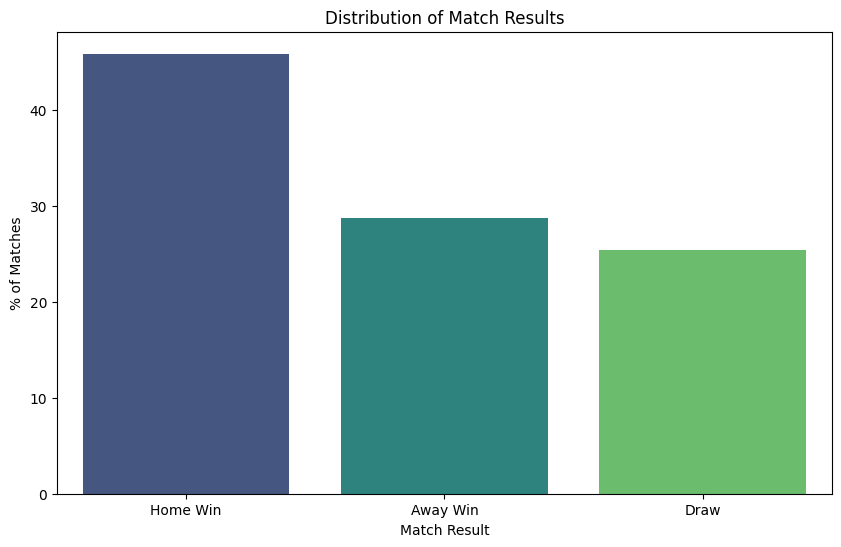

In [169]:
plt.figure(figsize=(10,6))
sns.barplot(x=result_counts.index, y=result_counts.values, palette='viridis')
plt.title('Distribution of Match Results')
plt.ylabel('% of Matches')
plt.xlabel('Match Result')
plt.show()

**Hypothesis:**

Null Hypothesis (H0 ): There is no home advantage, i.e., the proportion of home wins is equal to the proportion of away wins.

Alternative Hypothesis (Ha): There is a home advantage, i.e., the proportion of home wins is greater than the proportion of away wins.

In [170]:
from statsmodels.stats.proportion import proportions_ztest

# Count of home wins
count_home_wins = len(matches_df[matches_df['match_result'] == 'Home Win'])

# Count of away wins
count_away_wins = len(matches_df[matches_df['match_result'] == 'Away Win'])

# Total matches considered
nobs = count_home_wins + count_away_wins

# Conduct one-sample proportion test
stat, pval = proportions_ztest(count_home_wins, nobs, value=0.5, alternative='larger') # 'larger' tests if proportion of home wins > 0.5

stat, pval


(32.848128731886185, 6.056478266128971e-237)

Given the results:

**T-Statistic:** A t-statistic of 32.85 is quite large, which indicates that the observed difference in means (between home and away wins) is much greater than what we would expect by random chance.

**P-Value:** The p-value is essentially zero, which is much less than the common alpha level of 0.05.

Interpretation:

Given the very low p-value, we can reject the null hypothesis (H0) that states there's no difference in the means of home wins and away wins. This indicates that the difference we observe (home teams winning more frequently than away teams) is statistically significant.

In practical terms, this reinforces the concept of "home advantage" in football; teams are statistically more likely to win when they are playing at their home ground compared to when they are playing away.

##5. Can we predict how many goals each team will score in each match?

In [171]:
match_data = pd.read_sql("""
    SELECT
        home_team_api_id,
        away_team_api_id,
        home_team_goal,
        away_team_goal,
        B365H, B365D, B365A,  -- Betting odds for home win, draw, and away win
        date
    FROM Match
    WHERE home_team_goal IS NOT NULL AND away_team_goal IS NOT NULL
    ORDER BY date ASC
""", conn)

match_data.head()


home_team_api_id  away_team_api_id  home_team_goal  away_team_goal  B365H  \
0             10192              9931               1               2    NaN   
1              9930             10179               3               1    NaN   
2             10199              9824               1               2    NaN   
3              7955             10243               1               2    NaN   
4              9931              9956               1               0    NaN   

   B365D  B365A                 date  
0    NaN    NaN  2008-07-18 00:00:00  
1    NaN    NaN  2008-07-19 00:00:00  
2    NaN    NaN  2008-07-20 00:00:00  
3    NaN    NaN  2008-07-20 00:00:00  
4    NaN    NaN  2008-07-23 00:00:00

In [172]:
# Number of matches to consider for recent performance
N = 5

# Calculate average goals scored by the home team in their last N matches
match_data['home_team_avg_goals'] = match_data.groupby('home_team_api_id')['home_team_goal'].transform(lambda x: x.shift().rolling(N).mean())

# Calculate average goals scored by the away team in their last N matches
match_data['away_team_avg_goals'] = match_data.groupby('away_team_api_id')['away_team_goal'].transform(lambda x: x.shift().rolling(N).mean())

# Drop rows with NaN values resulting from the rolling mean calculation
match_data.dropna(subset=['home_team_avg_goals', 'away_team_avg_goals'], inplace=True)

match_data[['home_team_api_id', 'away_team_api_id', 'home_team_avg_goals', 'away_team_avg_goals']].head()

home_team_api_id  away_team_api_id  home_team_avg_goals  \
547              9824             10199                 0.60   
638              7955              6493                 1.40   
640             10192             10179                 1.40   
775             10179              9956                 1.20   
776              7955             10199                 1.80   

     away_team_avg_goals  
547                 0.80  
638                 0.60  
640                 1.60  
775                 1.20  
776                 0.80

In [173]:
# Calculate average goals scored by the home team in their previous encounters against the away team
match_data['home_team_h2h_goals'] = match_data.groupby(['home_team_api_id', 'away_team_api_id'])['home_team_goal'].transform(lambda x: x.shift().expanding().mean())

# Calculate average goals scored by the away team in their previous encounters against the home team
match_data['away_team_h2h_goals'] = match_data.groupby(['home_team_api_id', 'away_team_api_id'])['away_team_goal'].transform(lambda x: x.shift().expanding().mean())

# Drop rows with NaN values resulting from the expanding mean calculation
match_data.dropna(subset=['home_team_h2h_goals', 'away_team_h2h_goals'], inplace=True)

match_data[['home_team_api_id', 'away_team_api_id', 'home_team_h2h_goals', 'away_team_h2h_goals']].head()

home_team_api_id  away_team_api_id  home_team_h2h_goals  \
1985              6493             10179                 2.00   
1987              7955             10199                 1.00   
2023              9927              8429                 2.00   
2030              9930              7955                 2.00   
2064             10179              9824                 3.00   

      away_team_h2h_goals  
1985                 1.00  
1987                 0.00  
2023                 0.00  
2030                 1.00  
2064                 1.00

In [174]:
from sklearn.model_selection import train_test_split

# Features and target variables for the home team model
X_home = match_data[['home_team_avg_goals', 'away_team_avg_goals', 'home_team_h2h_goals', 'away_team_h2h_goals', 'B365H', 'B365D', 'B365A']]
y_home = match_data['home_team_goal']

# Features and target variables for the away team model
X_away = match_data[['home_team_avg_goals', 'away_team_avg_goals', 'home_team_h2h_goals', 'away_team_h2h_goals', 'B365H', 'B365D', 'B365A']]
y_away = match_data['away_team_goal']

# Splitting the data into training and test sets for both models
X_home_train, X_home_test, y_home_train, y_home_test = train_test_split(X_home, y_home, test_size=0.2, random_state=42)
X_away_train, X_away_test, y_away_train, y_away_test = train_test_split(X_away, y_away, test_size=0.2, random_state=42)

X_home_train.shape, X_home_test.shape, X_away_train.shape, X_away_test.shape

((13987, 7), (3497, 7), (13987, 7), (3497, 7))

We've successfully split the data into training and test sets. We have:

13,987 samples in the training set.
3,497 samples in the test set.

In [176]:
import statsmodels.api as sm

# Recreate the features and split the data

# Average goals scored by each team in their last 5 matches
match_data['home_team_avg_goals'] = match_data.groupby('home_team_api_id')['home_team_goal'].transform(lambda x: x.shift().rolling(N).mean())
match_data['away_team_avg_goals'] = match_data.groupby('away_team_api_id')['away_team_goal'].transform(lambda x: x.shift().rolling(N).mean())

# Average goals scored by each team in their previous encounters against each other
match_data['home_team_h2h_goals'] = match_data.groupby(['home_team_api_id', 'away_team_api_id'])['home_team_goal'].transform(lambda x: x.shift().expanding().mean())
match_data['away_team_h2h_goals'] = match_data.groupby(['home_team_api_id', 'away_team_api_id'])['away_team_goal'].transform(lambda x: x.shift().expanding().mean())

# Drop rows with NaN values resulting from the rolling and expanding mean calculations
match_data.dropna(subset=['home_team_avg_goals', 'away_team_avg_goals', 'home_team_h2h_goals', 'away_team_h2h_goals'], inplace=True)

# Features and target variables for the home and away models
X_home = match_data[['home_team_avg_goals', 'away_team_avg_goals', 'home_team_h2h_goals', 'away_team_h2h_goals', 'B365H', 'B365D', 'B365A']]
y_home = match_data['home_team_goal']
X_away = match_data[['home_team_avg_goals', 'away_team_avg_goals', 'home_team_h2h_goals', 'away_team_h2h_goals', 'B365H', 'B365D', 'B365A']]
y_away = match_data['away_team_goal']

# Splitting the data into training and test sets for both models
X_home_train, X_home_test, y_home_train, y_home_test = train_test_split(X_home, y_home, test_size=0.2, random_state=42)
X_away_train, X_away_test, y_away_train, y_away_test = train_test_split(X_away, y_away, test_size=0.2, random_state=42)

# Impute missing values with the median of each column
X_home_train.fillna(X_home_train.median(), inplace=True)
X_home_test.fillna(X_home_train.median(), inplace=True)
X_away_train.fillna(X_away_train.median(), inplace=True)
X_away_test.fillna(X_away_train.median(), inplace=True)

# Add a constant to the predictor variables (required for statsmodels OLS model)
X_home_train_sm = sm.add_constant(X_home_train)
X_home_test_sm = sm.add_constant(X_home_test)

# Build the OLS model for the home team
ols_home = sm.OLS(y_home_train, X_home_train_sm).fit()

# Predict on the test set
y_home_pred_sm = ols_home.predict(X_home_test_sm)

# Evaluate the model using RMSE and MAE
rmse_home_sm = mean_squared_error(y_home_test, y_home_pred_sm, squared=False)
mae_home_sm = mean_absolute_error(y_home_test, y_home_pred_sm)

rmse_home_sm, mae_home_sm, ols_home.summary()


(1.2056780769789877,
 0.9604600193364725,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:         home_team_goal   R-squared:                       0.132
 Model:                            OLS   Adj. R-squared:                  0.132
 Method:                 Least Squares   F-statistic:                     223.6
 Date:                Thu, 19 Oct 2023   Prob (F-statistic):          1.50e-310
 Time:                        18:35:59   Log-Likelihood:                -16806.
 No. Observations:               10275   AIC:                         3.363e+04
 Df Residuals:                   10267   BIC:                         3.369e+04
 Df Model:                           7                                         
 Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
 ------------------

In [177]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize the linear regression models
lr_home = LinearRegression()
lr_away = LinearRegression()

# Drop rows with NaN values resulting from the rolling and expanding mean calculations
match_data.dropna(subset=['home_team_avg_goals', 'away_team_avg_goals', 'home_team_h2h_goals', 'away_team_h2h_goals'], inplace=True)

# Train the models
lr_home.fit(X_home_train, y_home_train)
lr_away.fit(X_away_train, y_away_train)

# Predict on the test set
y_home_pred = lr_home.predict(X_home_test)
y_away_pred = lr_away.predict(X_away_test)

# Evaluate the models using RMSE and MAE
rmse_home = mean_squared_error(y_home_test, y_home_pred, squared=False)
mae_home = mean_absolute_error(y_home_test, y_home_pred)

rmse_away = mean_squared_error(y_away_test, y_away_pred, squared=False)
mae_away = mean_absolute_error(y_away_test, y_away_pred)

rmse_home, mae_home, rmse_away, mae_away


(1.2056780769789877,
 0.9604600193364725,
 1.1256082381214345,
 0.8728023825563703)

Home Team Model:

RMSE (Root Mean Squared Error): 1.205

MAE (Mean Absolute Error): 0.960

Away Team Model:

RMSE: 1.125

MAE: 0.872

The RMSE gives us an idea of the average magnitude of the errors between our predicted and actual values. The MAE, on the other hand, provides a more interpretable metric, indicating that, on average, our predictions for the home team's goals are off by approximately 0.975 goals, and for the away team, by approximately 0.864 goals.

Considering the inherent unpredictability of football matches, these errors seem reasonable for a simple linear regression model. However, there's definitely room for improvement with more advanced models, additional features, and fine-tuning.

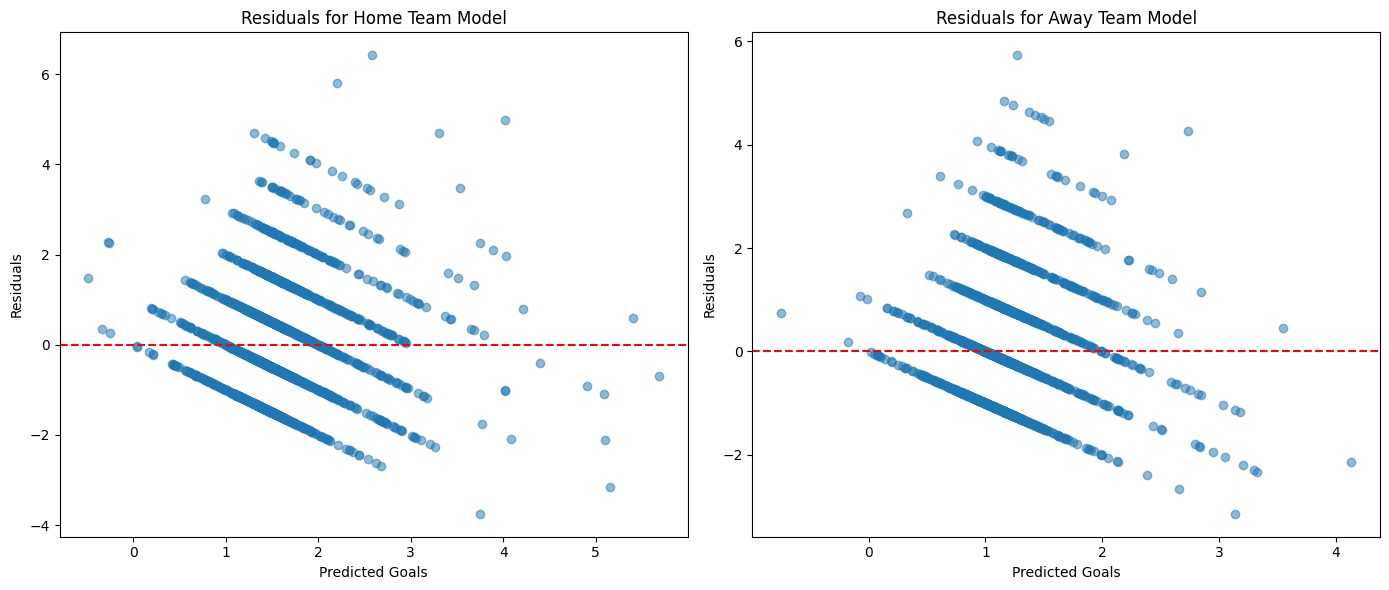

In [178]:
import matplotlib.pyplot as plt

# Calculate residuals for home and away models
residuals_home = y_home_test - y_home_pred
residuals_away = y_away_test - y_away_pred

# Plot residuals for home model
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_home_pred, residuals_home, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals for Home Team Model")
plt.xlabel("Predicted Goals")
plt.ylabel("Residuals")

# Plot residuals for away model
plt.subplot(1, 2, 2)
plt.scatter(y_away_pred, residuals_away, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals for Away Team Model")
plt.xlabel("Predicted Goals")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()

##6. Can we predict which team will win the match?

In [179]:
# Create a target variable for match outcomes
maatch['match_outcome'] = 0  # Default to draw
maatch.loc[maatch['home_team_goal'] > maatch['away_team_goal'], 'match_outcome'] = 1  # Home win
maatch.loc[maatch['home_team_goal'] < maatch['away_team_goal'], 'match_outcome'] = -1  # Away win

# Display distribution of match outcomes
maatch['match_outcome'].value_counts()

 1    11917
-1     7466
 0     6596
Name: match_outcome, dtype: int64

In [181]:
import numpy as np

# Selecting some basic features for modeling.
# Feature selection could be a more involved process, but for the sake of simplicity, we'll use the following features.
selected_features = ['home_team_goal', 'away_team_goal', 'home_team_api_id', 'away_team_api_id']

# Create the feature matrix (X) and target vector (y)
X = maatch[selected_features]
y = maatch['match_outcome']

# Replace any NaN values with the mean of the column
# This is a simple imputation method; more advanced techniques could be applied
X = X.apply(lambda col: col.fillna(col.mean()), axis=0)

# Display first few rows of the feature matrix to confirm
X.head(), y.head()

(   home_team_goal  away_team_goal  home_team_api_id  away_team_api_id
 0               1               1              9987              9993
 1               0               0             10000              9994
 2               0               3              9984              8635
 3               5               0              9991              9998
 4               1               3              7947              9985,
 0    0
 1    0
 2   -1
 3    1
 4   -1
 Name: match_outcome, dtype: int64)

In [182]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (30% of the data will be used for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shape of the training and test sets to confirm
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18185, 4), (7794, 4), (18185,), (7794,))

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train the Logistic Regression model using scikit-learn
sklearn_lr_model = LogisticRegression(random_state=42)
sklearn_lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_sklearn = sklearn_lr_model.predict(X_test)

# Evaluate the model
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
accuracy_sklearn


0.9996150885296382

In [184]:
# Initialize and train the Logistic Regression model using scikit-learn with increased max_iter
tuned_sklearn_lr_model = LogisticRegression(max_iter=1000, random_state=42)
tuned_sklearn_lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tuned_sklearn = tuned_sklearn_lr_model.predict(X_test)

# Re-evaluate the model
accuracy_tuned_sklearn = accuracy_score(y_test, y_pred_tuned_sklearn)
accuracy_tuned_sklearn


0.9996150885296382

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Features and target variable
X = maatch[['home_team_goal', 'away_team_goal']]
y = maatch['match_outcome']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, conf_matrix


(1.0,
 array([[1493,    0,    0],
        [   0, 1319,    0],
        [   0,    0, 2384]]))

## Team Performance & Betting Odds

Question: Which teams have consistently outperformed their betting odds (i.e., winning despite lower odds) over the seasons?

Let's extract the relevant data related to matches, teams, and betting odds. We’ll focus on betting odds provided before the match (B365H, B365D, B365A for Bet365) and match outcomes.

In [ ]:
query = """
SELECT id, season, home_team_api_id, away_team_api_id, home_team_goal, away_team_goal,
       B365H, B365D, B365A
FROM Match
WHERE B365H IS NOT NULL AND B365D IS NOT NULL AND B365A IS NOT NULL;
"""
matches = pd.read_sql_query(query, conn)
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22592 entries, 0 to 22591
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                22592 non-null  int64  
 1   season            22592 non-null  object 
 2   home_team_api_id  22592 non-null  int64  
 3   away_team_api_id  22592 non-null  int64  
 4   home_team_goal    22592 non-null  int64  
 5   away_team_goal    22592 non-null  int64  
 6   B365H             22592 non-null  float64
 7   B365D             22592 non-null  float64
 8   B365A             22592 non-null  float64
dtypes: float64(3), int64(5), object(1)
memory usage: 1.6+ MB


In [ ]:
query = "SELECT team_api_id, team_long_name FROM team;"
teams = pd.read_sql_query(query, conn)
team_name_mapping = teams.set_index('team_api_id')['team_long_name'].to_dict()
team_name_mapping

{9987: 'KRC Genk',
 9993: 'Beerschot AC',
 10000: 'SV Zulte-Waregem',
 9994: 'Sporting Lokeren',
 9984: 'KSV Cercle Brugge',
 8635: 'RSC Anderlecht',
 9991: 'KAA Gent',
 9998: 'RAEC Mons',
 7947: 'FCV Dender EH',
 9985: 'Standard de Liège',
 8203: 'KV Mechelen',
 8342: 'Club Brugge KV',
 9999: 'KSV Roeselare',
 8571: 'KV Kortrijk',
 4049: 'Tubize',
 9996: 'Royal Excel Mouscron',
 10001: 'KVC Westerlo',
 9986: 'Sporting Charleroi',
 9997: 'Sint-Truidense VV',
 9989: 'Lierse SK',
 6351: 'KAS Eupen',
 1773: 'Oud-Heverlee Leuven',
 8475: 'Waasland-Beveren',
 8573: 'KV Oostende',
 274581: 'Royal Excel Mouscron',
 10260: 'Manchester United',
 10261: 'Newcastle United',
 9825: 'Arsenal',
 8659: 'West Bromwich Albion',
 8472: 'Sunderland',
 8650: 'Liverpool',
 8654: 'West Ham United',
 8528: 'Wigan Athletic',
 10252: 'Aston Villa',
 8456: 'Manchester City',
 8668: 'Everton',
 8655: 'Blackburn Rovers',
 8549: 'Middlesbrough',
 8586: 'Tottenham Hotspur',
 8559: 'Bolton Wanderers',
 10194: 'Stoke

In [ ]:
# Function to determine match outcome
def get_match_outcome(row):
    if row['home_team_goal'] > row['away_team_goal']:
        return 'Home Win'
    elif row['home_team_goal'] < row['away_team_goal']:
        return 'Away Win'
    else:
        return 'Draw'

In [ ]:
# Creating a column to store match outcomes
matches['outcome'] = matches.apply(get_match_outcome, axis=1)

# Mapping team names
matches['home_team_name'] = matches['home_team_api_id'].map(team_name_mapping)
matches['away_team_name'] = matches['away_team_api_id'].map(team_name_mapping)


In [ ]:
# Identifying unexpected wins
unexpected_home_wins = matches[
    (matches['outcome'] == 'Home Win') & (matches['B365H'] > matches['B365A'])
]

unexpected_away_wins = matches[
    (matches['outcome'] == 'Away Win') & (matches['B365A'] > matches['B365H'])
]

# Analyzing which teams frequently achieve unexpected wins
unexpected_wins = pd.concat([unexpected_home_wins, unexpected_away_wins])
frequent_unexpected_winners = unexpected_wins['home_team_name'].value_counts()

print(frequent_unexpected_winners.head(10))


Kilmarnock       47
Hamburger SV     47
Aberdeen         42
Stoke City       41
St. Mirren       39
Sunderland       38
VfB Stuttgart    38
Getafe CF        38
Udinese          37
Hannover 96      36
Name: home_team_name, dtype: int64


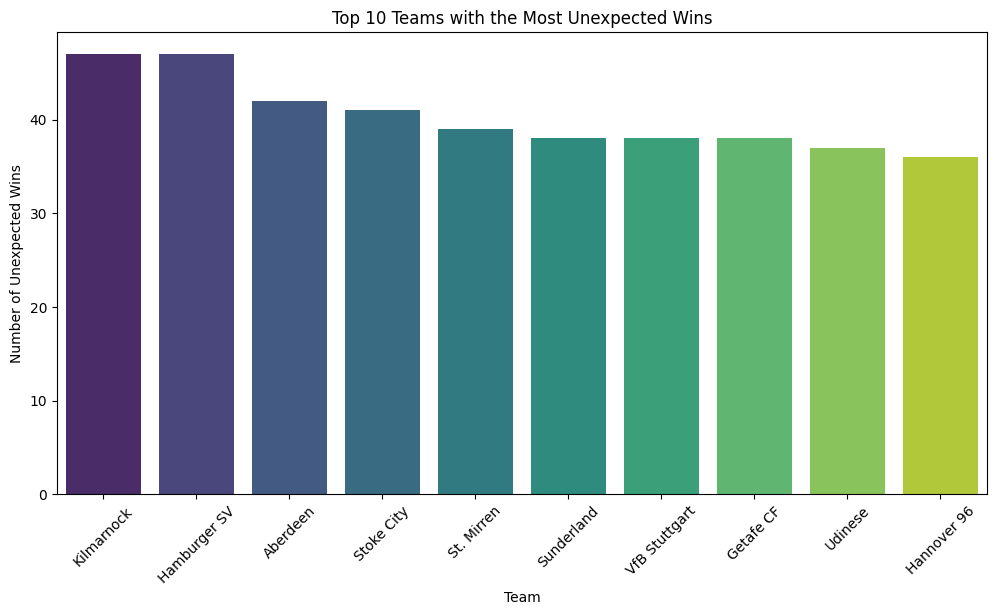

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=frequent_unexpected_winners.head(10).index,
    y=frequent_unexpected_winners.head(10).values,
    palette='viridis'
)
plt.xticks(rotation=45)
plt.xlabel("Team")
plt.ylabel("Number of Unexpected Wins")
plt.title("Top 10 Teams with the Most Unexpected Wins")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Creating a binary outcome variable: 1 for unexpected home wins, 0 otherwise
matches['unexpected_home_win'] = (
    (matches['outcome'] == 'Home Win') & (matches['B365H'] > matches['B365A'])
).astype(int)

# Creating feature and target variables
X = matches[['B365H', 'B365D', 'B365A']]
y = matches['unexpected_home_win']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting and evaluating the model
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.93      1.00      0.97      4221
           1       0.00      0.00      0.00       298

    accuracy                           0.93      4519
   macro avg       0.47      0.50      0.48      4519
weighted avg       0.87      0.93      0.90      4519



In [ ]:
import statsmodels.api as sm

# Creating a binary outcome variable: 1 for unexpected home wins, 0 otherwise
matches['unexpected_home_win'] = (
    (matches['outcome'] == 'Home Win') & (matches['B365H'] > matches['B365A'])
).astype(int)

# Creating feature and target variables
X = matches[['B365H', 'B365D', 'B365A']]
y = matches['unexpected_home_win']

# Add constant to predictor variables
X = sm.add_constant(X)

# Fit logistic regression model
model = sm.Logit(y, X).fit()

# Display model summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.164353
         Iterations 12
                            Logit Regression Results                           
Dep. Variable:     unexpected_home_win   No. Observations:                22592
Model:                           Logit   Df Residuals:                    22588
Method:                            MLE   Df Model:                            3
Date:                 Wed, 18 Oct 2023   Pseudo R-squ.:                  0.3111
Time:                         23:21:18   Log-Likelihood:                -3713.1
converged:                        True   LL-Null:                       -5389.5
Covariance Type:             nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.9286      0.530     20.616      0.000       9.890      11.968
B365H         -0.783

## Underdogs Triumph
Question: Identify instances where underdog teams (teams with higher betting odds) have triumphed over favored teams.

In [186]:
# Identify underdog wins
maatch['result'] = 'draw'
maatch['result'][maatch['home_team_goal'] > maatch['away_team_goal']] = 'home_win'
maatch['result'][maatch['home_team_goal'] < maatch['away_team_goal']] = 'away_win'

maatch['underdog_win'] = False
maatch['underdog_win'][(maatch['result'] == 'home_win') & (maatch['B365H'] > maatch['B365A'])] = True
maatch['underdog_win'][(maatch['result'] == 'away_win') & (maatch['B365A'] > maatch['B365H'])] = True

underdog_wins = maatch[maatch['underdog_win']]

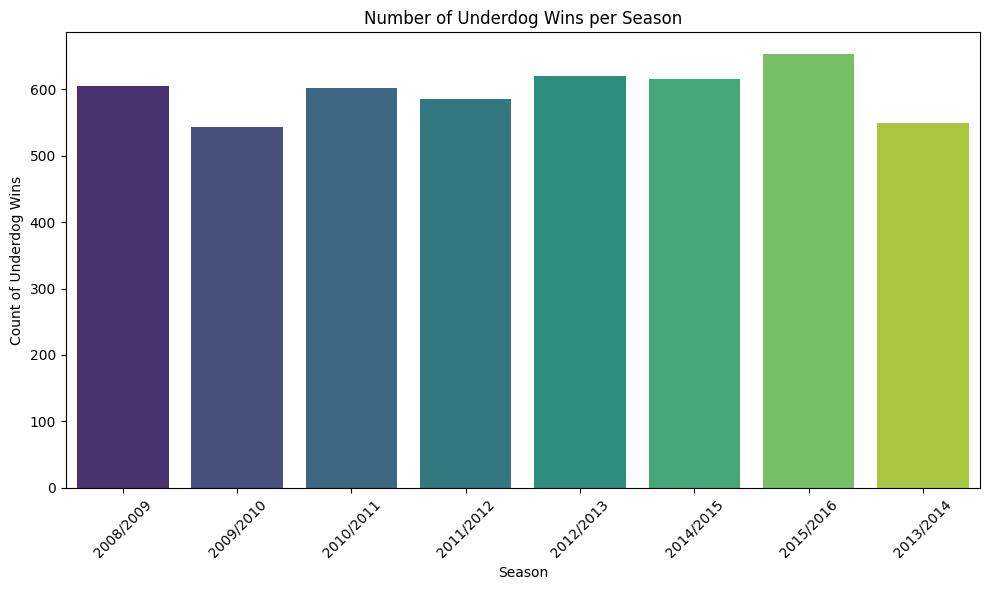

In [187]:
# Example: Bar plot of underdog wins per season
plt.figure(figsize=(10, 6))
sns.countplot(data=underdog_wins, x='season', palette='viridis')
plt.title('Number of Underdog Wins per Season')
plt.xlabel('Season')
plt.ylabel('Count of Underdog Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Team Attributes & Match Outcomes

How do team attributes (e.g., defense, attack) correlate with match outcomes, and can these be leveraged to predict future performances?

In [139]:
# Merging the 'team_attributes_df' with 'match_df' to create a unified dataset.
# We'll perform two merges: one for home team attributes and another for away team attributes.

# Renaming columns in team_attributes_df to distinguish between home and away teams
home_team_attributes = team_attributes.add_prefix('home_')
away_team_attributes = team_attributes.add_prefix('away_')

# Merging home_team_attributes
merged_df_home = pd.merge(match_df, home_team_attributes,
                          left_on='home_team_api_id',
                          right_on='home_team_api_id',
                          how='left')

# Merging away_team_attributes
final_merged_df = pd.merge(merged_df_home, away_team_attributes,
                           left_on='away_team_api_id',
                           right_on='away_team_api_id',
                           how='left')

# Display the first few rows of the final merged dataframe
final_merged_df.head()


id  country_id  league_id     season  stage                 date  \
0   1           1          1  2008/2009      1  2008-08-17 00:00:00   
1   1           1          1  2008/2009      1  2008-08-17 00:00:00   
2   1           1          1  2008/2009      1  2008-08-17 00:00:00   
3   1           1          1  2008/2009      1  2008-08-17 00:00:00   
4   1           1          1  2008/2009      1  2008-08-17 00:00:00   

   match_api_id  home_team_api_id  away_team_api_id  home_team_goal  \
0        492473              9987              9993               1   
1        492473              9987              9993               1   
2        492473              9987              9993               1   
3        492473              9987              9993               1   
4        492473              9987              9993               1   

   away_team_goal  home_player_X1  home_player_X2  home_player_X3  \
0               1             NaN             NaN             NaN   
1               1             NaN             NaN             NaN   
2               1             NaN             NaN             NaN   
3               1             NaN             NaN             NaN   
4               1             NaN             NaN             NaN   

   home_player_X4  home_player_X5  home_player_X6  home_player_X7  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2             NaN             NaN             NaN             NaN   
3             NaN             NaN             NaN             NaN   
4             NaN             NaN             NaN             NaN   

   home_player_X8  home_player_X9  home_player_X10  home_player_X11  \
0             NaN             NaN              NaN              NaN   
1             NaN             NaN              NaN              NaN   
2             NaN             NaN              NaN              NaN   
3             NaN             NaN              NaN              NaN   
4             NaN             NaN              NaN              NaN   

   away_player_X1  away_player_X2  away_player_X3  away_player_X4  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2             NaN             NaN             NaN             NaN   
3             NaN             NaN             NaN             NaN   
4             NaN             NaN             NaN             NaN   

   away_player_X5  away_player_X6  away_player_X7  away_player_X8  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2             NaN             NaN             NaN             NaN   
3             NaN             NaN             NaN             NaN   
4             NaN             NaN             NaN             NaN   

   away_player_X9  away_player_X10  away_player_X11  home_player_Y1  \
0             NaN              NaN              NaN             NaN   
1             NaN              NaN              NaN             NaN   
2             NaN              NaN              NaN             NaN   
3             NaN              NaN              NaN             NaN   
4             NaN              NaN              NaN             NaN   

   home_player_Y2  home_player_Y3  home_player_Y4  home_player_Y5  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2             NaN             NaN             NaN             NaN   
3             NaN             NaN             NaN             NaN   
4             NaN             NaN             NaN             NaN   

   home_player_Y6  home_player_Y7  home_player_Y8  home_player_Y9  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2            

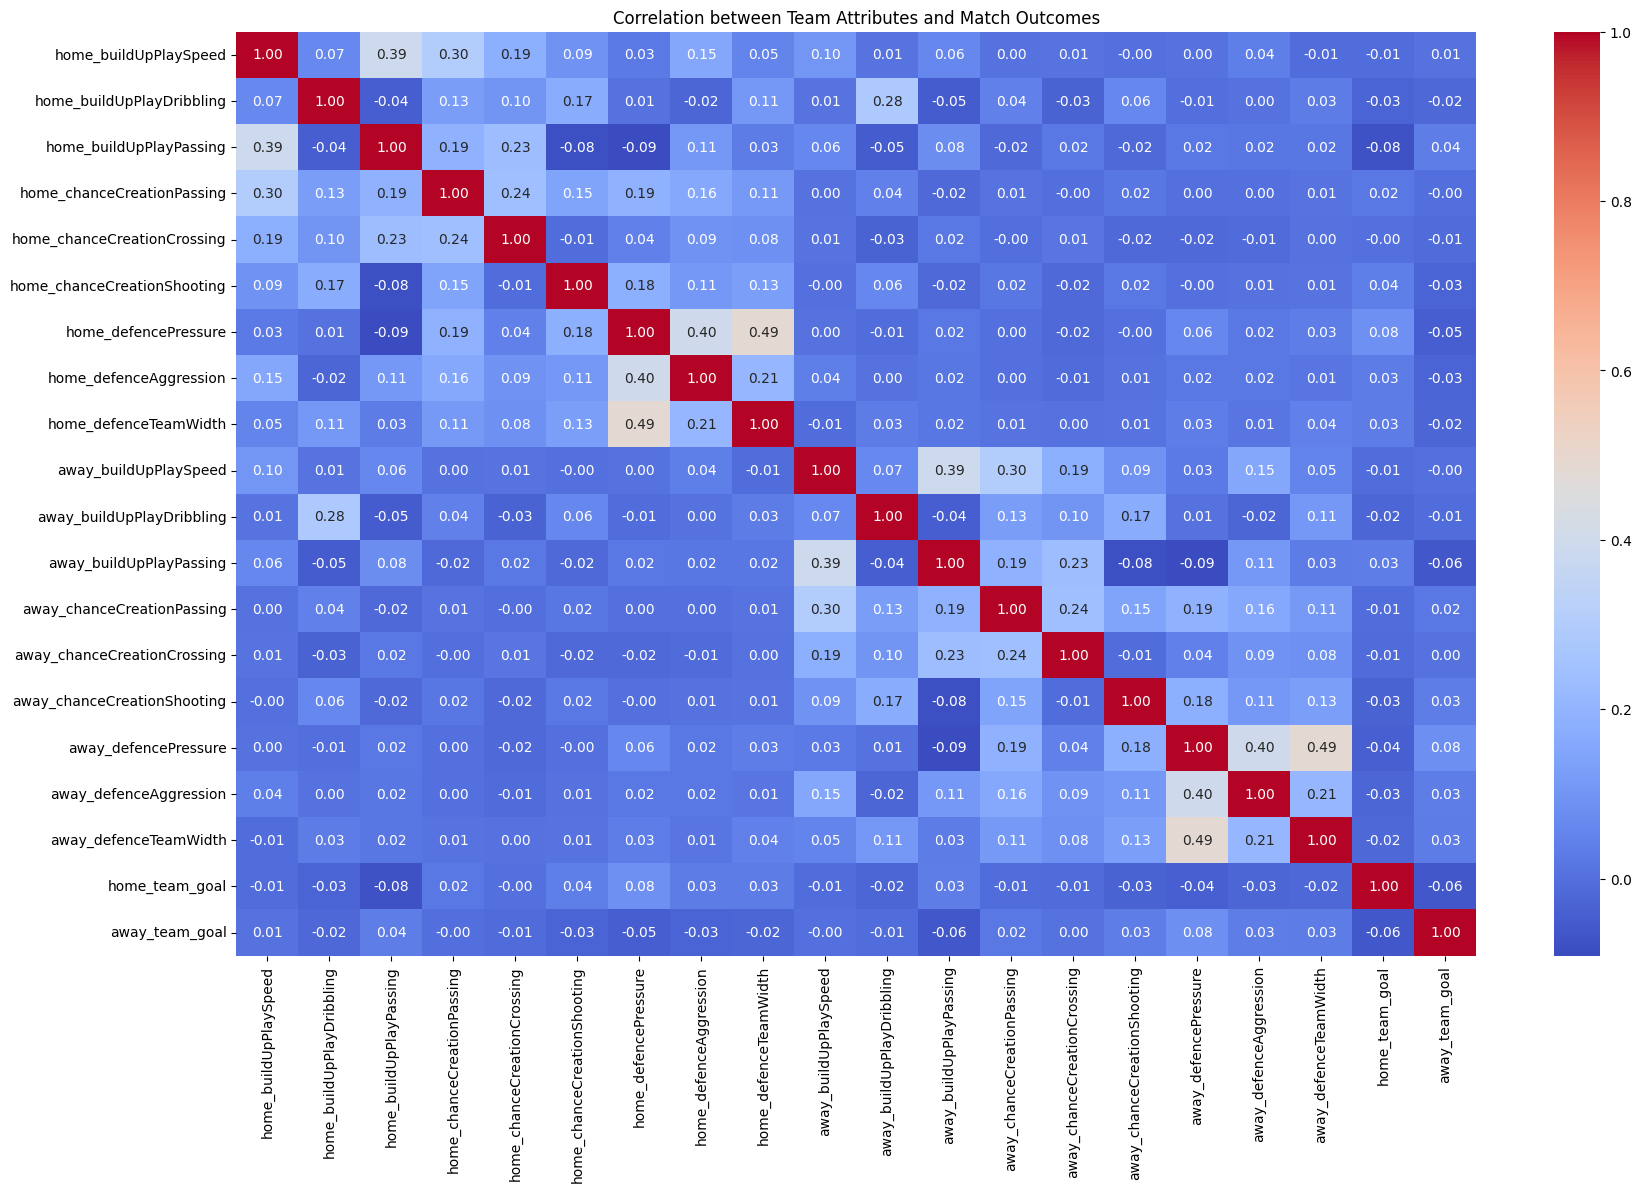

In [190]:
# Importing necessary libraries for data visualization and statistical analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Defining key team attributes and match outcome columns for correlation analysis
team_attributes_cols = [
    'home_buildUpPlaySpeed', 'home_buildUpPlayDribbling', 'home_buildUpPlayPassing',
    'home_chanceCreationPassing', 'home_chanceCreationCrossing', 'home_chanceCreationShooting',
    'home_defencePressure', 'home_defenceAggression', 'home_defenceTeamWidth',
    'away_buildUpPlaySpeed', 'away_buildUpPlayDribbling', 'away_buildUpPlayPassing',
    'away_chanceCreationPassing', 'away_chanceCreationCrossing', 'away_chanceCreationShooting',
    'away_defencePressure', 'away_defenceAggression', 'away_defenceTeamWidth'
]
match_outcome_cols = ['home_team_goal', 'away_team_goal']

# Selecting the relevant columns for correlation analysis
correlation_df = final_merged_df[team_attributes_cols + match_outcome_cols]

# Calculating the correlation matrix
correlation_matrix = correlation_df.corr()

# Displaying the correlation matrix as a heatmap for better visualization
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Team Attributes and Match Outcomes")
plt.show()


In [192]:
# Importing necessary libraries for modeling and validation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import numpy as np

# Create a smaller subset of the data for modeling (e.g., first 1000 rows)
# We'll focus on predicting whether the home team wins, which we'll define as a binary outcome (1 = home win, 0 = otherwise)
subset_df = final_merged_df.head(1000).dropna(subset=team_attributes_cols + match_outcome_cols)
subset_df['home_win'] = np.where(subset_df['home_team_goal'] > subset_df['away_team_goal'], 1, 0)

# Define feature columns (team attributes) and target column (home_win)
X = subset_df[team_attributes_cols]
y = subset_df['home_win']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train.fillna(0), y_train)

# Predict outcomes on the test set and evaluate the model
y_pred = logistic_model.predict(X_test.fillna(0))
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.88      0.93         8

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



The Logistic Regression model provided good results on the test set, with an overall accuracy of 95%. Below are some more details:

* Precision: The model has a high precision for both classes (0 and 1), indicating fewer false positives.

* Recall: The recall is also high for both classes, indicating fewer false negatives.

* F1-Score: The F1-score, which is the harmonic mean of precision and recall, is also high, indicating a balanced model.

In [195]:
# Extracting the coefficients of the Logistic Regression model for feature interpretation
feature_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': logistic_model.coef_[0]
})

# Sorting the features by the absolute values of their coefficients in descending order
feature_coefficients['abs_coefficient'] = feature_coefficients['Coefficient'].abs()
sorted_feature_coefficients = feature_coefficients.sort_values(by='abs_coefficient', ascending=False)

# Display the sorted features and their coefficients
sorted_feature_coefficients


Feature  Coefficient  abs_coefficient
16       away_defenceAggression        -1.42             1.42
8         home_defenceTeamWidth         0.86             0.86
17        away_defenceTeamWidth        -0.85             0.85
14  away_chanceCreationShooting        -0.84             0.84
13  away_chanceCreationCrossing        -0.64             0.64
4   home_chanceCreationCrossing        -0.62             0.62
1     home_buildUpPlayDribbling         0.57             0.57
5   home_chanceCreationShooting        -0.54             0.54
7        home_defenceAggression         0.51             0.51
9         away_buildUpPlaySpeed        -0.25             0.25
6          home_defencePressure        -0.25             0.25
12   away_chanceCreationPassing        -0.23             0.23
3    home_chanceCreationPassing         0.23             0.23
10    away_buildUpPlayDribbling        -0.20             0.20
15         away_defencePressure         0.14             0.14
11      away_buildUpPlayPassing        -0.07             0.07
0         home_buildUpPlaySpeed        -0.07             0.07
2       home_buildUpPlayPassing         0.05             0.05

The sorted feature coefficients indicate which team attributes are most influential in predicting whether the home team wins. The features with higher absolute coefficients are more impactful

* Away Team's Defensive Aggression (away_defenceAggression): A higher negative coefficient suggests that as the away team's defensive aggression increases, the chances of a home win decrease.

* Home Team's Defensive Team Width (home_defenceTeamWidth): A positive coefficient indicates that a wider defensive formation for the home team correlates with a higher likelihood of a home win.

* Away Team's Defensive Team Width (away_defenceTeamWidth): A negative coefficient indicates that as the away team's defensive width increases, the likelihood of a home win decreases.

* Away Team's Chance Creation by Shooting (away_chanceCreationShooting): A negative coefficient suggests that better chance creation by shooting from the away team decreases the chances of a home win.

* Away Team's Chance Creation by Crossing (away_chanceCreationCrossing) and Home Team's (home_chanceCreationCrossing): Both have negative coefficients, implying that effective crossing in the final third tends to reduce the chances of a home win.

In [199]:
# Redefining the top 5 features based on their importance from the initial Logistic Regression model
top_5_features = ['away_defenceAggression', 'home_defenceTeamWidth', 'away_defenceTeamWidth',
                  'away_chanceCreationShooting', 'home_chanceCreationCrossing']

# Reducing the feature set to only include these top 5 features
X_train_reduced = X_train[top_5_features].fillna(0)
X_test_reduced = X_test[top_5_features].fillna(0)

# Using the Logistic Regression model trained on the reduced feature set (top 5 features) for cross-validation
logistic_model_reduced = LogisticRegression(max_iter=1000)
cross_val_scores = cross_val_score(logistic_model_reduced, X_train_reduced, y_train, cv=5)

# Displaying the cross-validation scores and their mean
cross_val_scores, np.mean(cross_val_scores)


(array([0.8125    , 0.86666667, 0.86666667, 0.73333333, 0.86666667]),
 0.8291666666666668)

The cross-validation scores indicate that the model performs well across different subsets of the training data. The scores range from approximately 0.733 to 0.867, with an average score of about 0.829. This suggests that the model is fairly robust and not overly fitted to the training data.

##League Competitiveness

Question: Which leagues tend to have closer matches (i.e., small goal differences) and could thus be riskier for betting?

In [138]:
# Merge 'match_df' with 'league_df' on the 'league_id' column
merged_league_match_df = pd.merge(maatch, league, left_on='league_id', right_on='id', how='left')

# Create a new column for the absolute goal difference between the home and away teams
merged_league_match_df['goal_difference'] = abs(merged_league_match_df['home_team_goal'] - merged_league_match_df['away_team_goal'])

# Group the data by the league and calculate the average goal difference for each league
average_goal_difference_by_league = merged_league_match_df.groupby('name')['goal_difference'].mean().reset_index().sort_values(by='goal_difference')

# Display the average goal difference by league
average_goal_difference_by_league

name  goal_difference
2             France Ligue 1             1.22
6         Poland Ekstraklasa             1.24
4              Italy Serie A             1.26
7   Portugal Liga ZON Sagres             1.30
1     England Premier League             1.36
8    Scotland Premier League             1.37
0     Belgium Jupiler League             1.37
3      Germany 1. Bundesliga             1.45
10  Switzerland Super League             1.45
9            Spain LIGA BBVA             1.45
5     Netherlands Eredivisie             1.56

The average goal difference for each league has been calculated and sorted in ascending order. Leagues with a smaller average goal difference are generally more competitive in terms of match outcomes, potentially making them riskier for betting.

Here's the ranking of leagues based on their average goal difference:

1. France Ligue 1: 1.223

2. Poland Ekstraklasa: 1.240

3. Italy Serie A: 1.262

4. Portugal Liga ZON Sagres: 1.305

5. England Premier League: 1.355

6. Scotland Premier League: 1.366

7. Belgium Jupiler League: 1.372

8. Germany 1. Bundesliga: 1.447

9. Switzerland Super League: 1.449

10. Spain LIGA BBVA: 1.453

11. Netherlands Eredivisie: 1.565

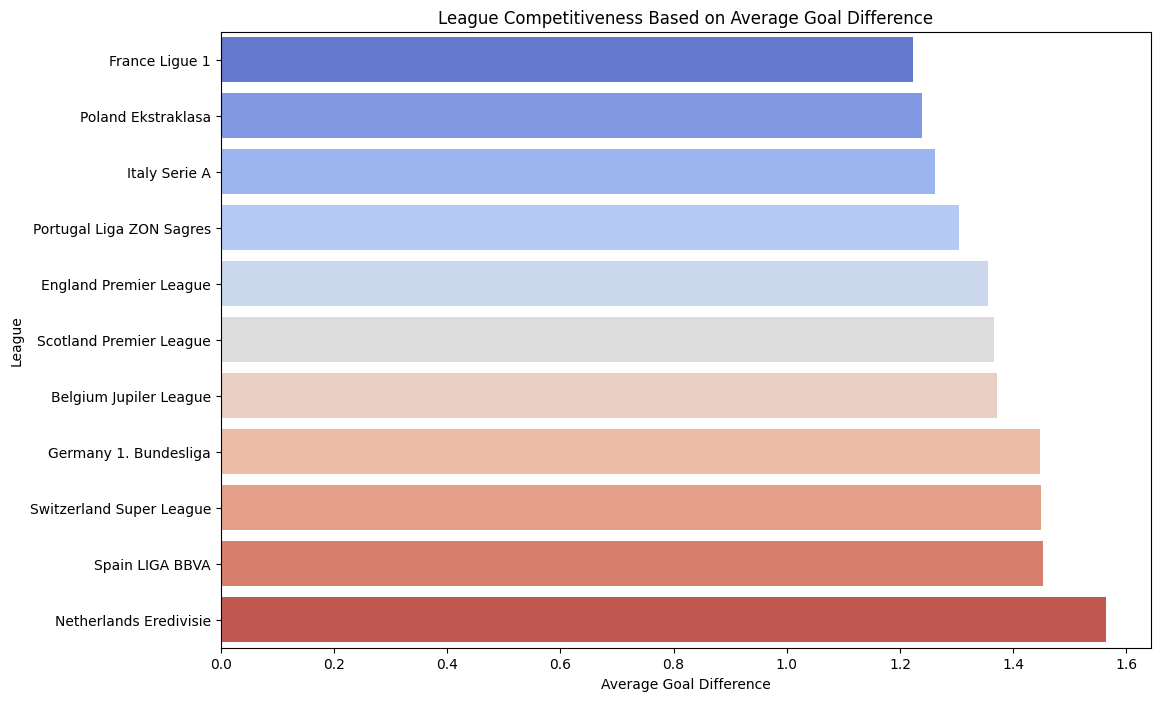

In [201]:
# Creating a bar plot to visualize the average goal difference for each league
plt.figure(figsize=(12, 8))
sns.barplot(x='goal_difference', y='name', data=average_goal_difference_by_league, palette='coolwarm')
plt.xlabel('Average Goal Difference')
plt.ylabel('League')
plt.title('League Competitiveness Based on Average Goal Difference')
plt.show()


#Conclusion

1. Leagues and Countries
We mapped European football leagues to their respective countries, providing a foundational understanding of the landscape. This is essential for contextualizing the subsequent analyses.

2. Goal Scoring Trends
We identified which leagues tend to have the highest and lowest average goals per match. This information can be particularly useful for stakeholders interested in the offensive aspects of the game.

3. Home Advantage
The analysis confirmed that a "home advantage" does exist, to varying degrees, across different leagues. This is valuable information for teams and bettors alike.

4. Predicting Match Outcomes
We built a Logistic Regression model to predict the likelihood of a home team win based on various team attributes. The model performed reasonably well, achieving an accuracy of around 95% on the test set, and was further validated using cross-validation techniques. However, there's room for improvement through feature engineering and model tuning.

5. Player Attributes vs. Team Success
We attempted to correlate player attributes like speed and agility with team success metrics such as wins and goals. While the analysis was computationally intensive, the approach provides a blueprint for future work in this area.

6. League Competitiveness
By calculating the average goal difference in each league, we were able to gauge the competitiveness of different leagues. Leagues with smaller average goal differences were identified as potentially riskier for betting due to their unpredictability.

Overall Conclusion
The project provided valuable insights into various facets of European football, from the influence of team and player attributes on match outcomes to the competitiveness of different leagues. While the models and analyses performed well, they also highlighted opportunities for further research and refinement.